# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 18.11.2022

Мягий дедлайн: 23:59MSK 30.11.2022

Жестокий дедлайн: 23:59MSK 06.12.2022

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/43413/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__ 10

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
sns.set(style='whitegrid')

%config InlineBackend.figure_format = 'retina'
sns.set(style='darkgrid', palette='deep')

plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 12


import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

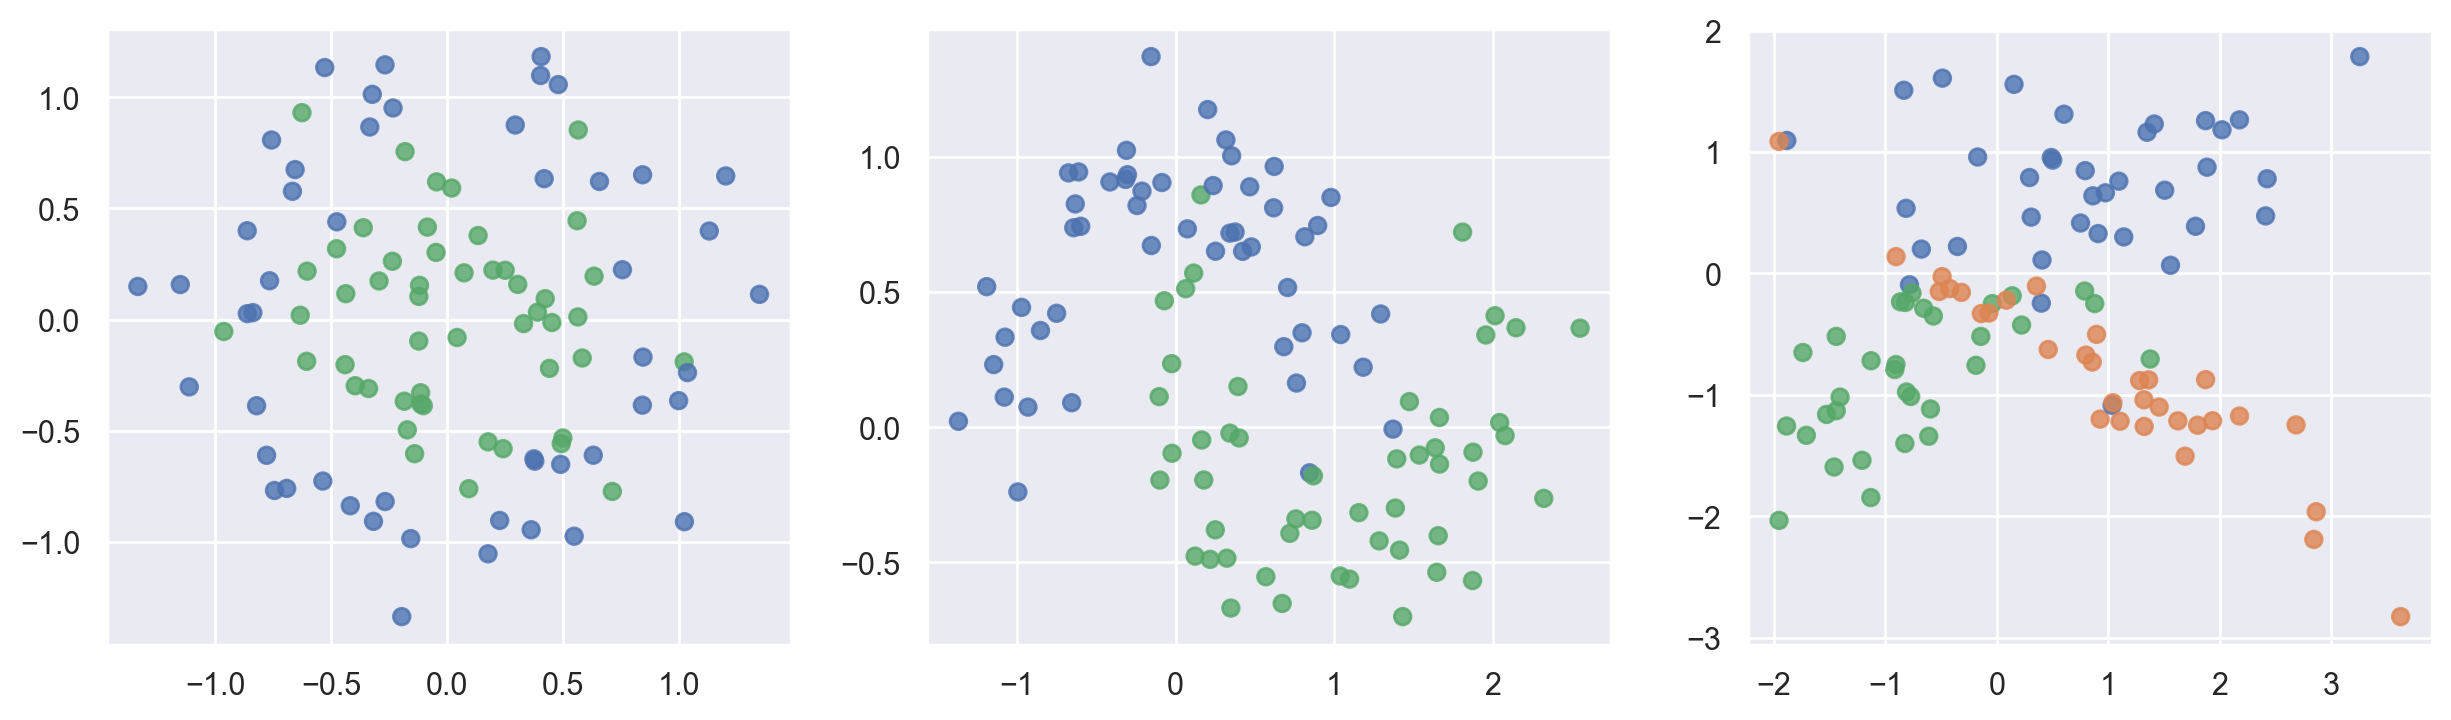

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

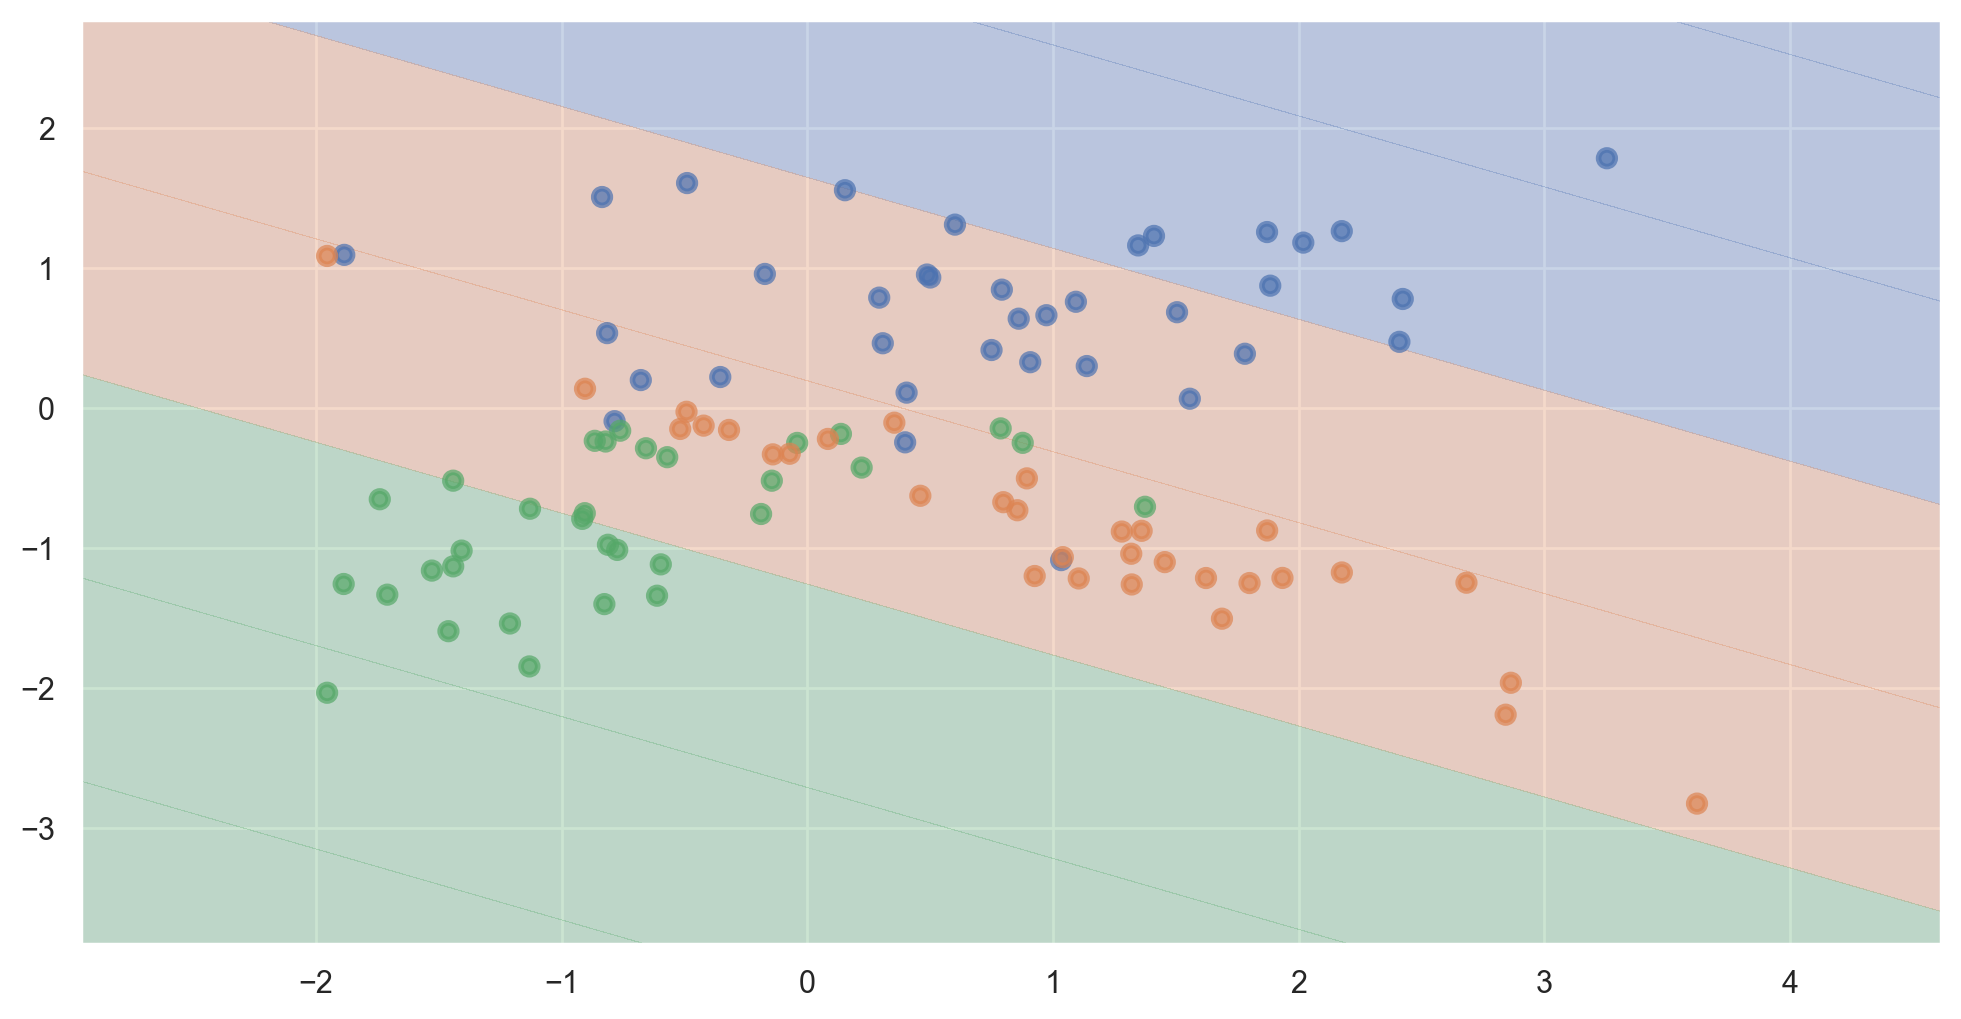

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

accuracy train = 1.0


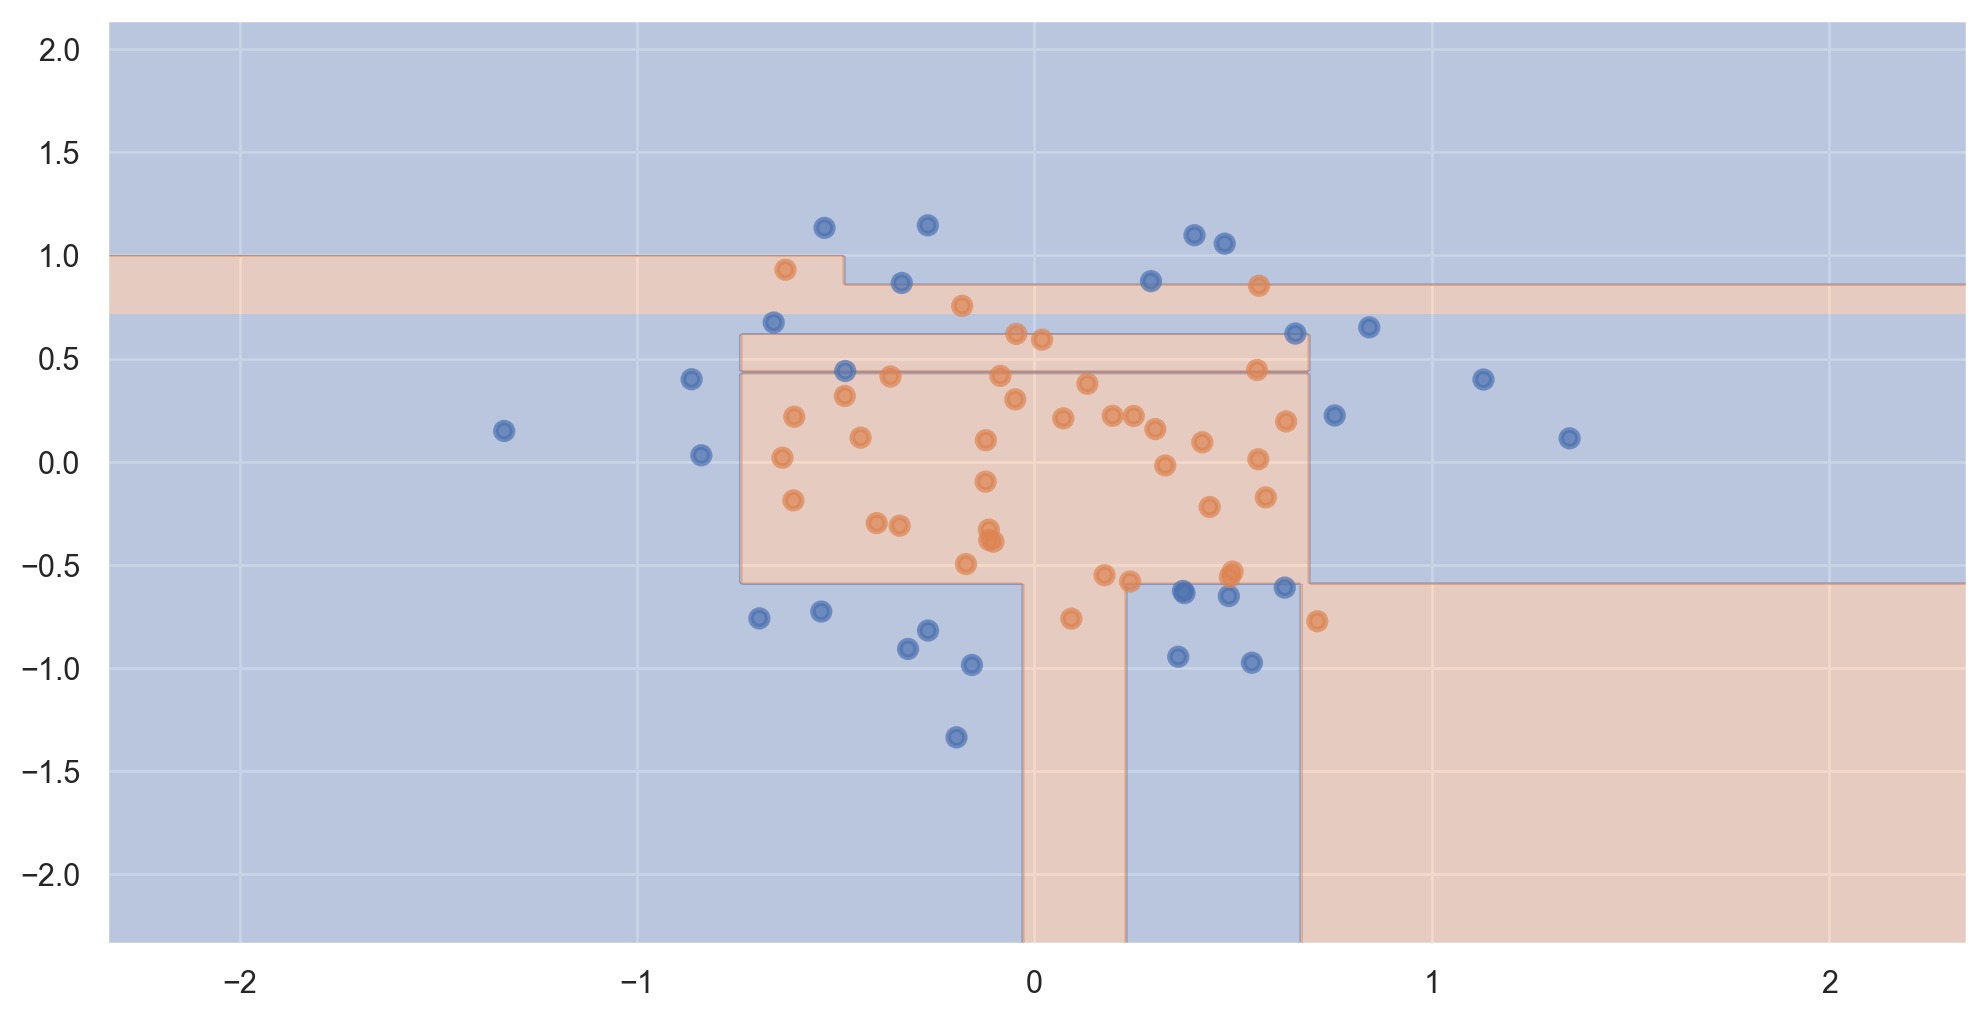

accuracy test = 0.7575757575757576


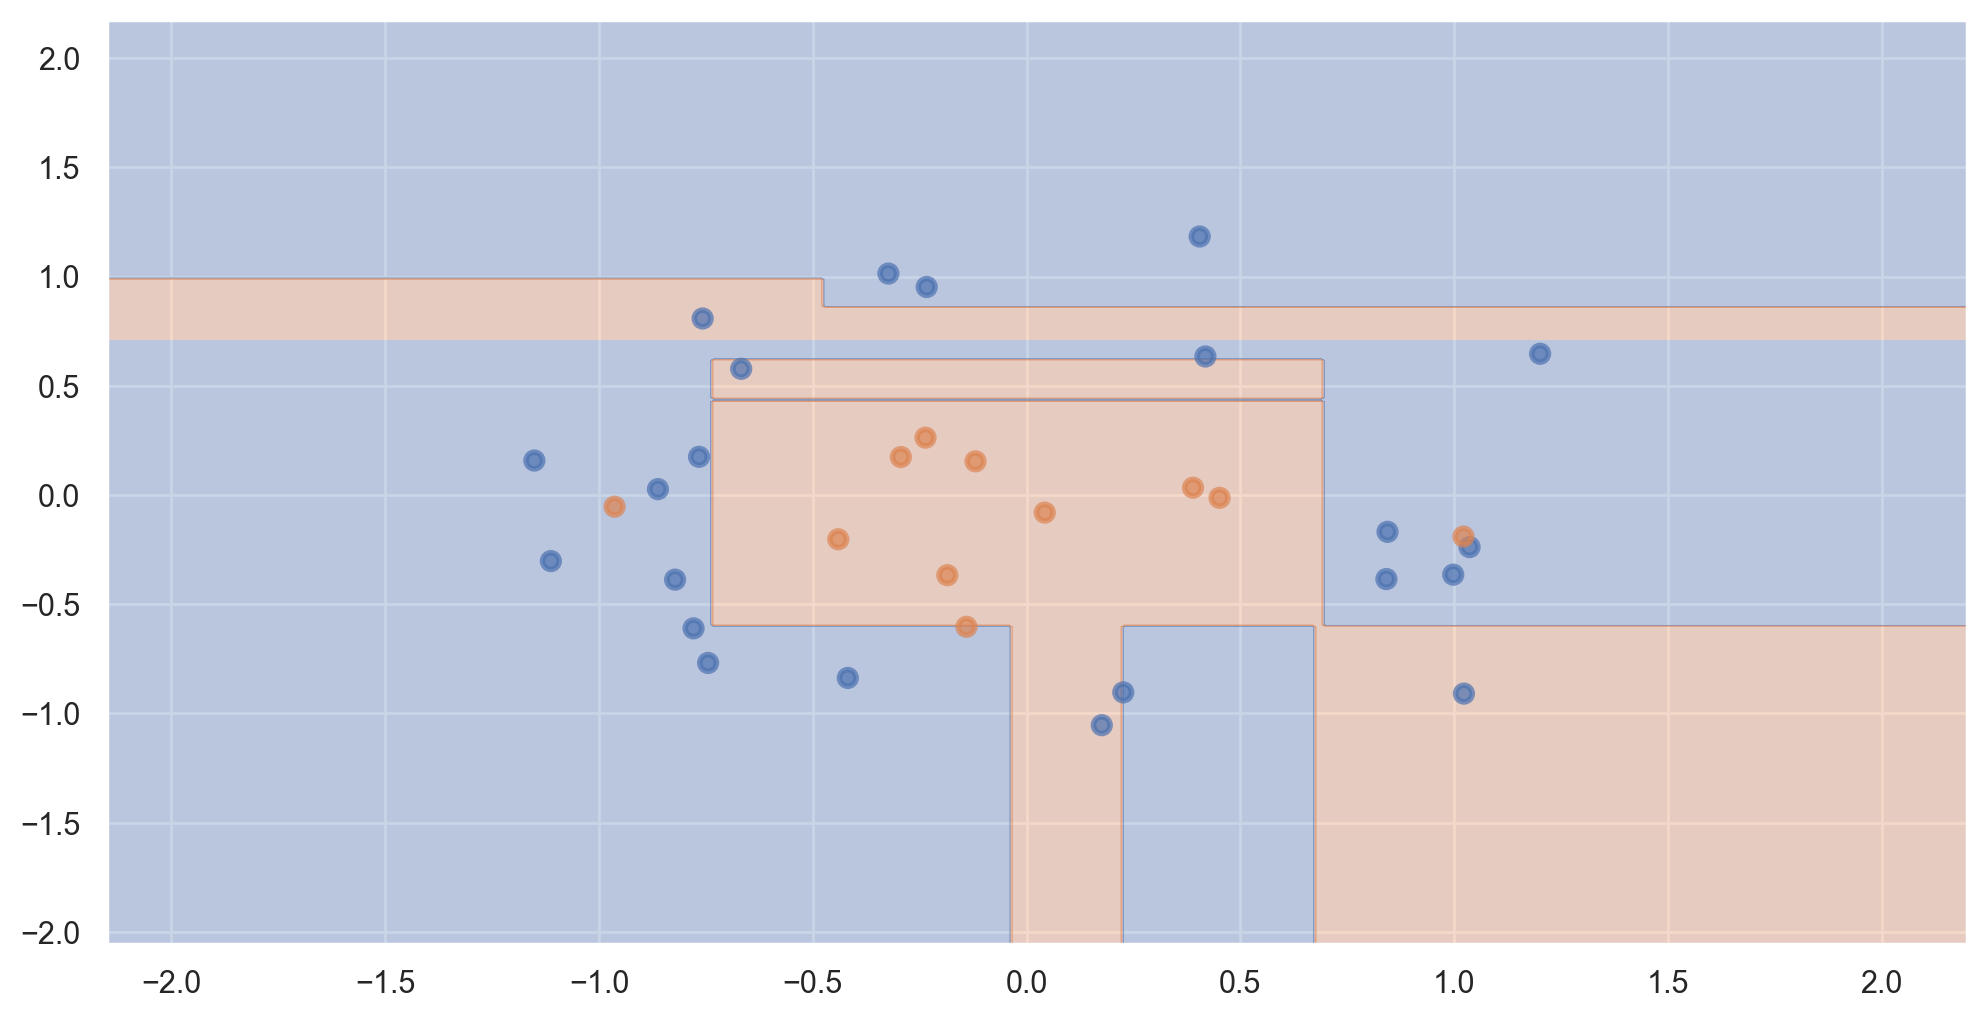

accuracy train = 1.0


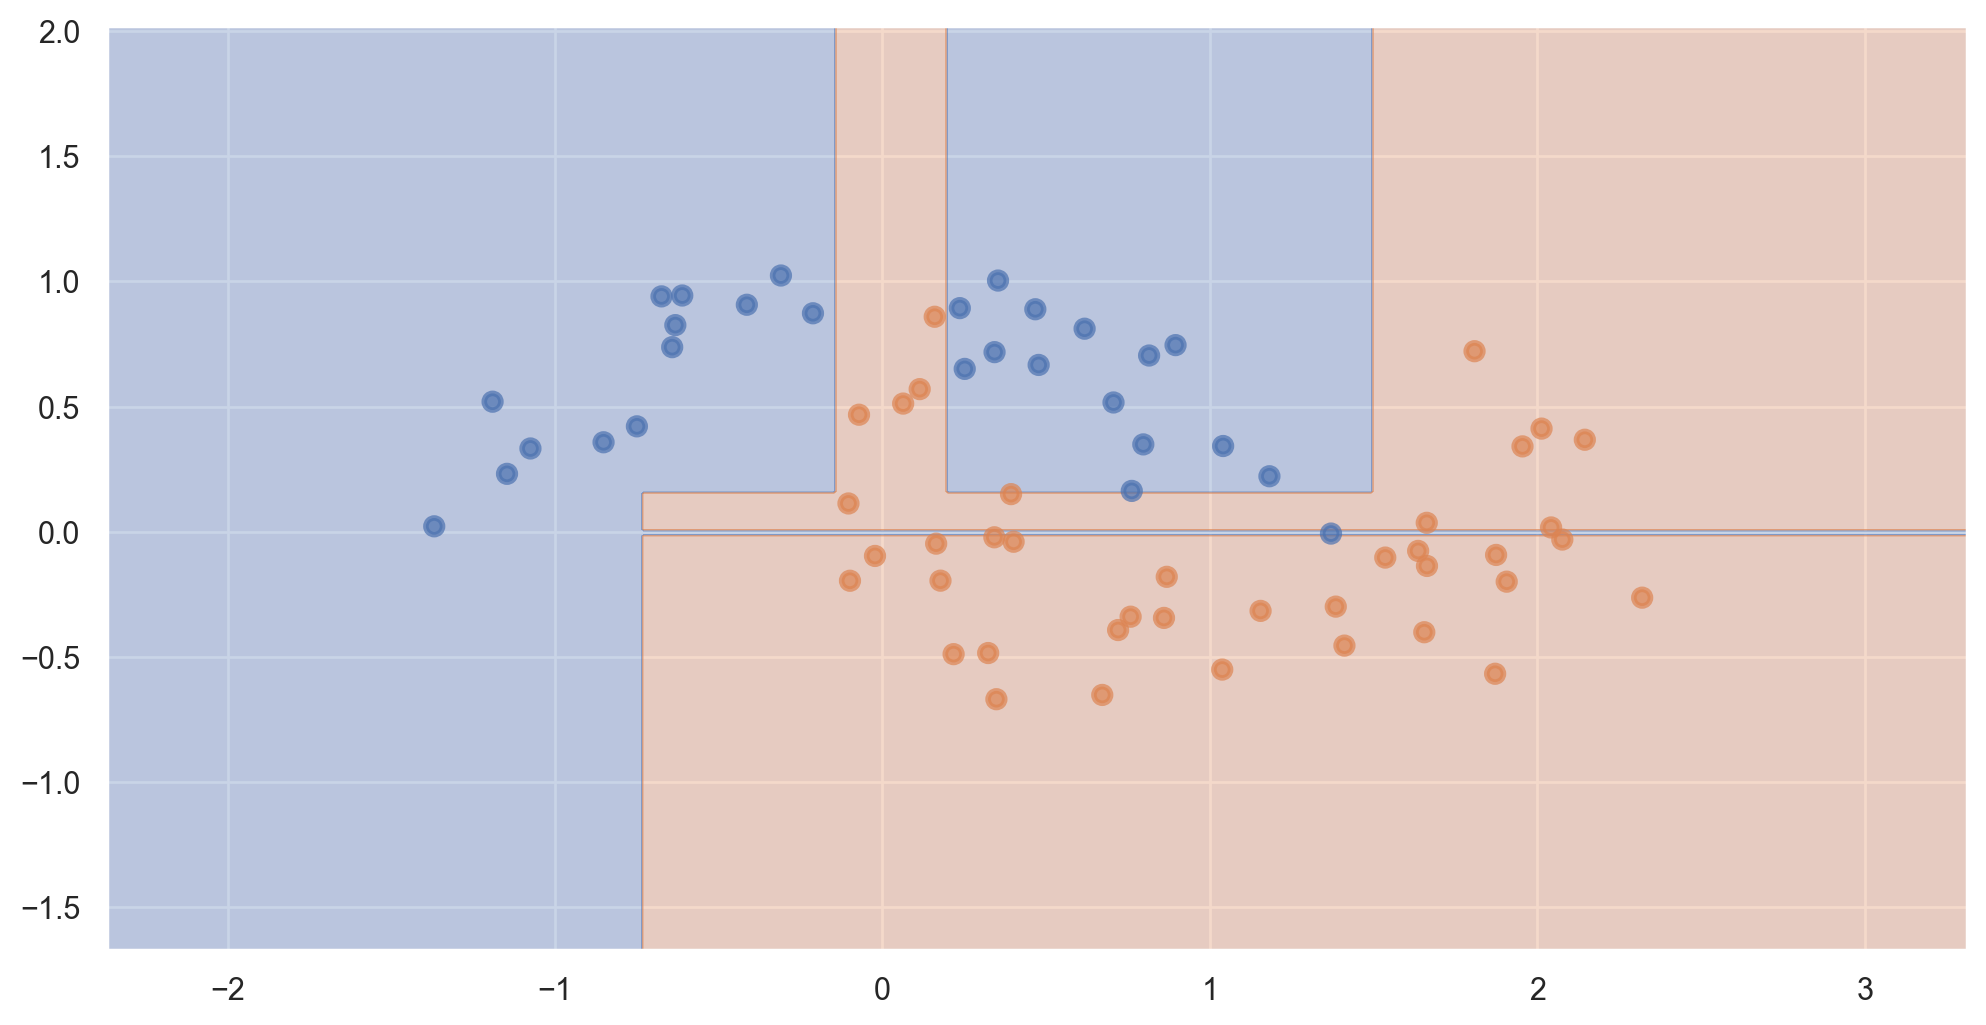

accuracy test = 0.8787878787878788


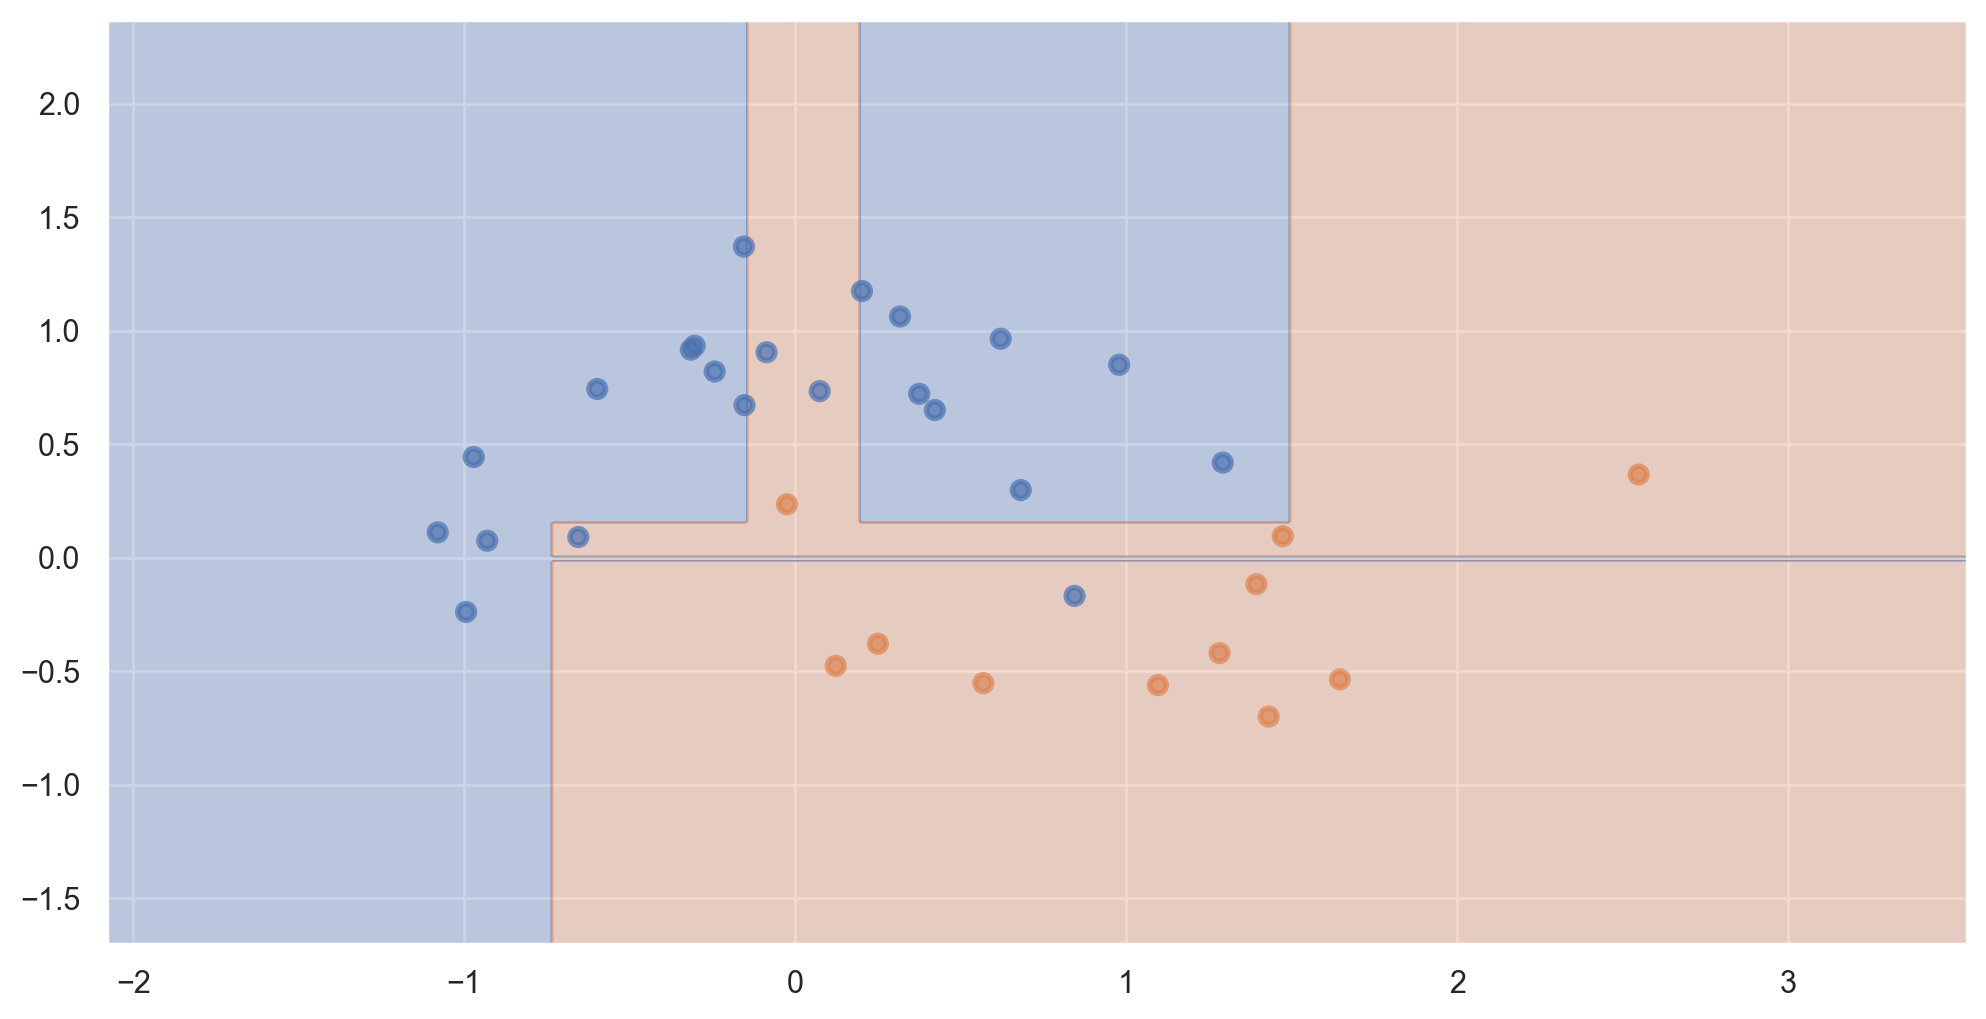

accuracy train = 1.0


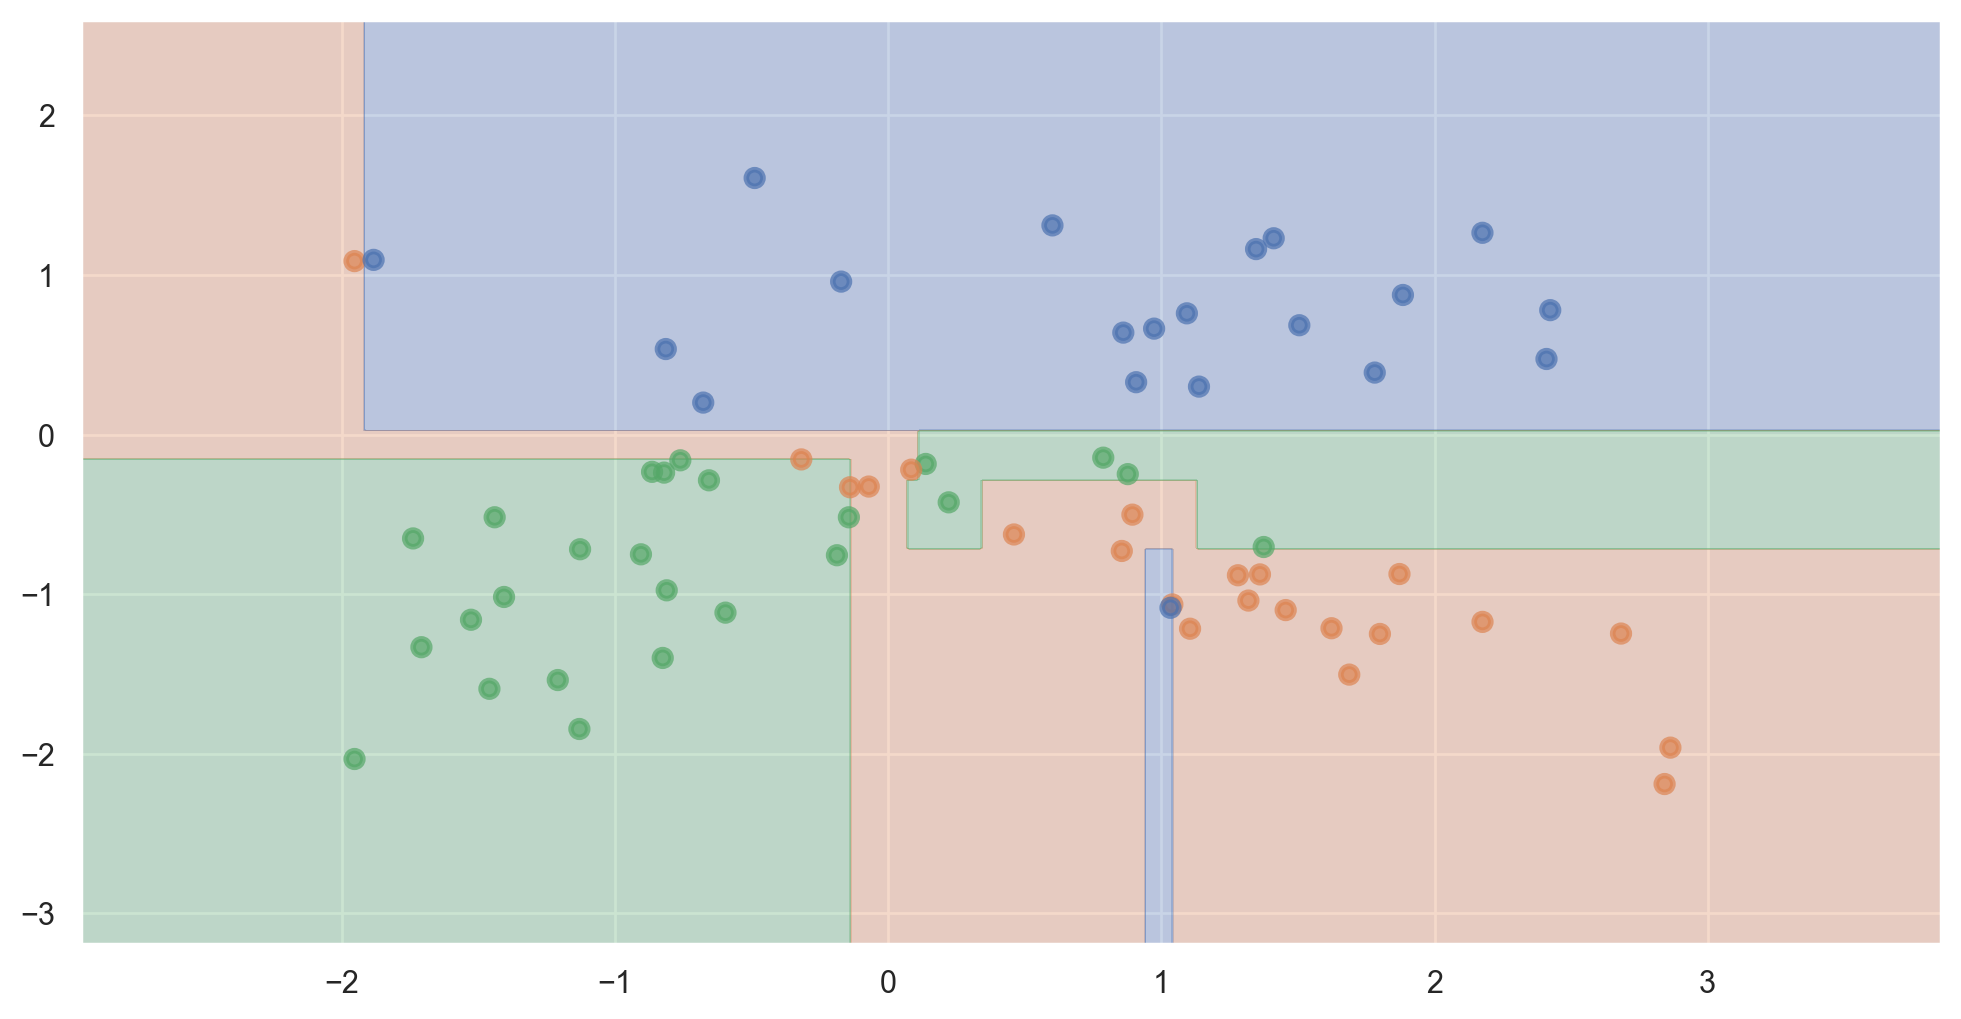

accuracy test = 0.8484848484848485


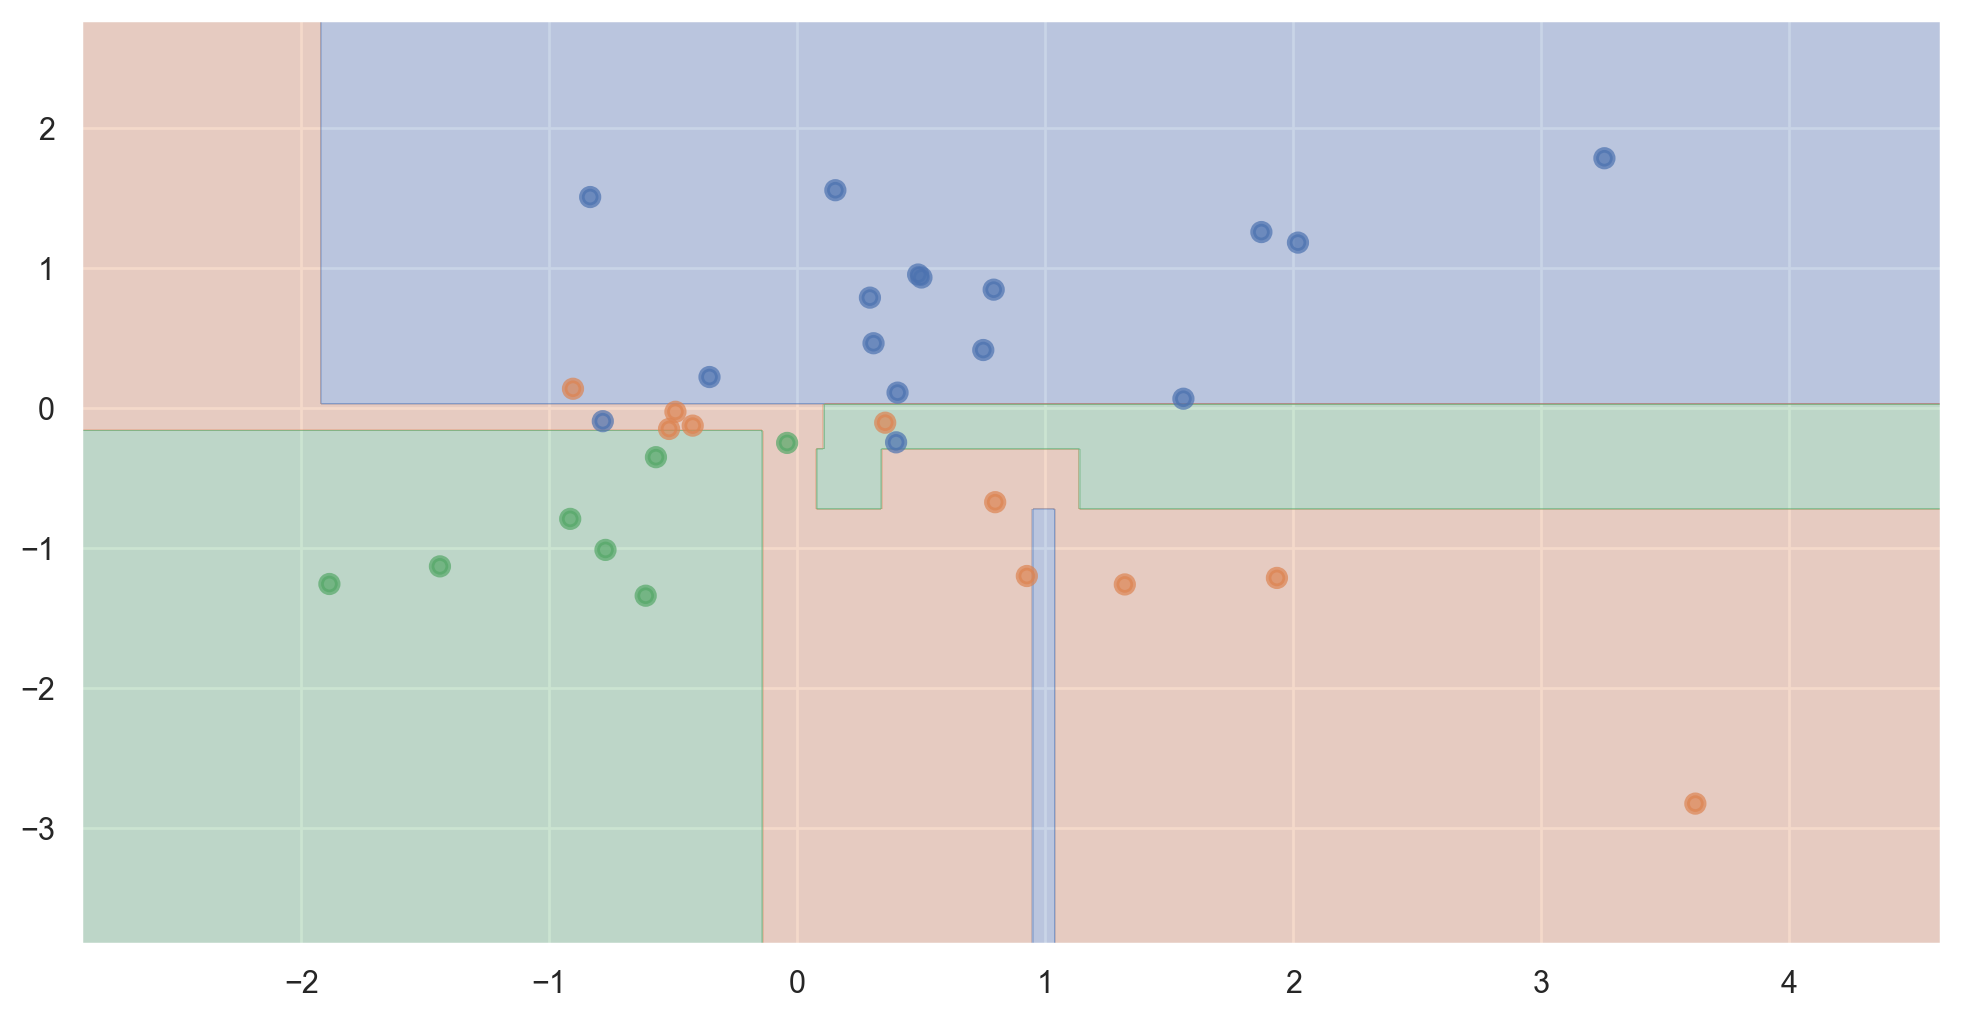

In [8]:
for i, (x, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
    dt = DecisionTreeClassifier().fit(X_train, y_train)
    y_train_tree_pred = dt.predict(X_train)
    y_test_tree_pred = dt.predict(X_test)
    print(f'accuracy train = {accuracy_score(y_train, y_train_tree_pred)}')
    plot_surface(dt, X_train, y_train)
    plt.show()
    print(f'accuracy test = {accuracy_score(y_test, y_test_tree_pred)}')
    plot_surface(dt, X_test, y_test)
    plt.show()

__Ответ:__  Метрика качества на трэйне сильно выше, чем на тесте. Это явный признак переобучения модели, но в данном случае логично, что метрика на трэйне = 1, т.к. нет никаких ограничений на построение дерева и оно строится идеально под обучающую выборку

$\color{red}{\text{Комментарий от проверяющего:}}$

**Балл:** 1.0

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [9]:
from sklearn.model_selection import cross_val_score

   dataset  max_depth  min_samples_leaf  mean_train_score  mean_test_score
0        1          2                 2          0.820896         0.666667
1        1          2                 6          0.820896         0.666667
2        1          2                10          0.820896         0.666667


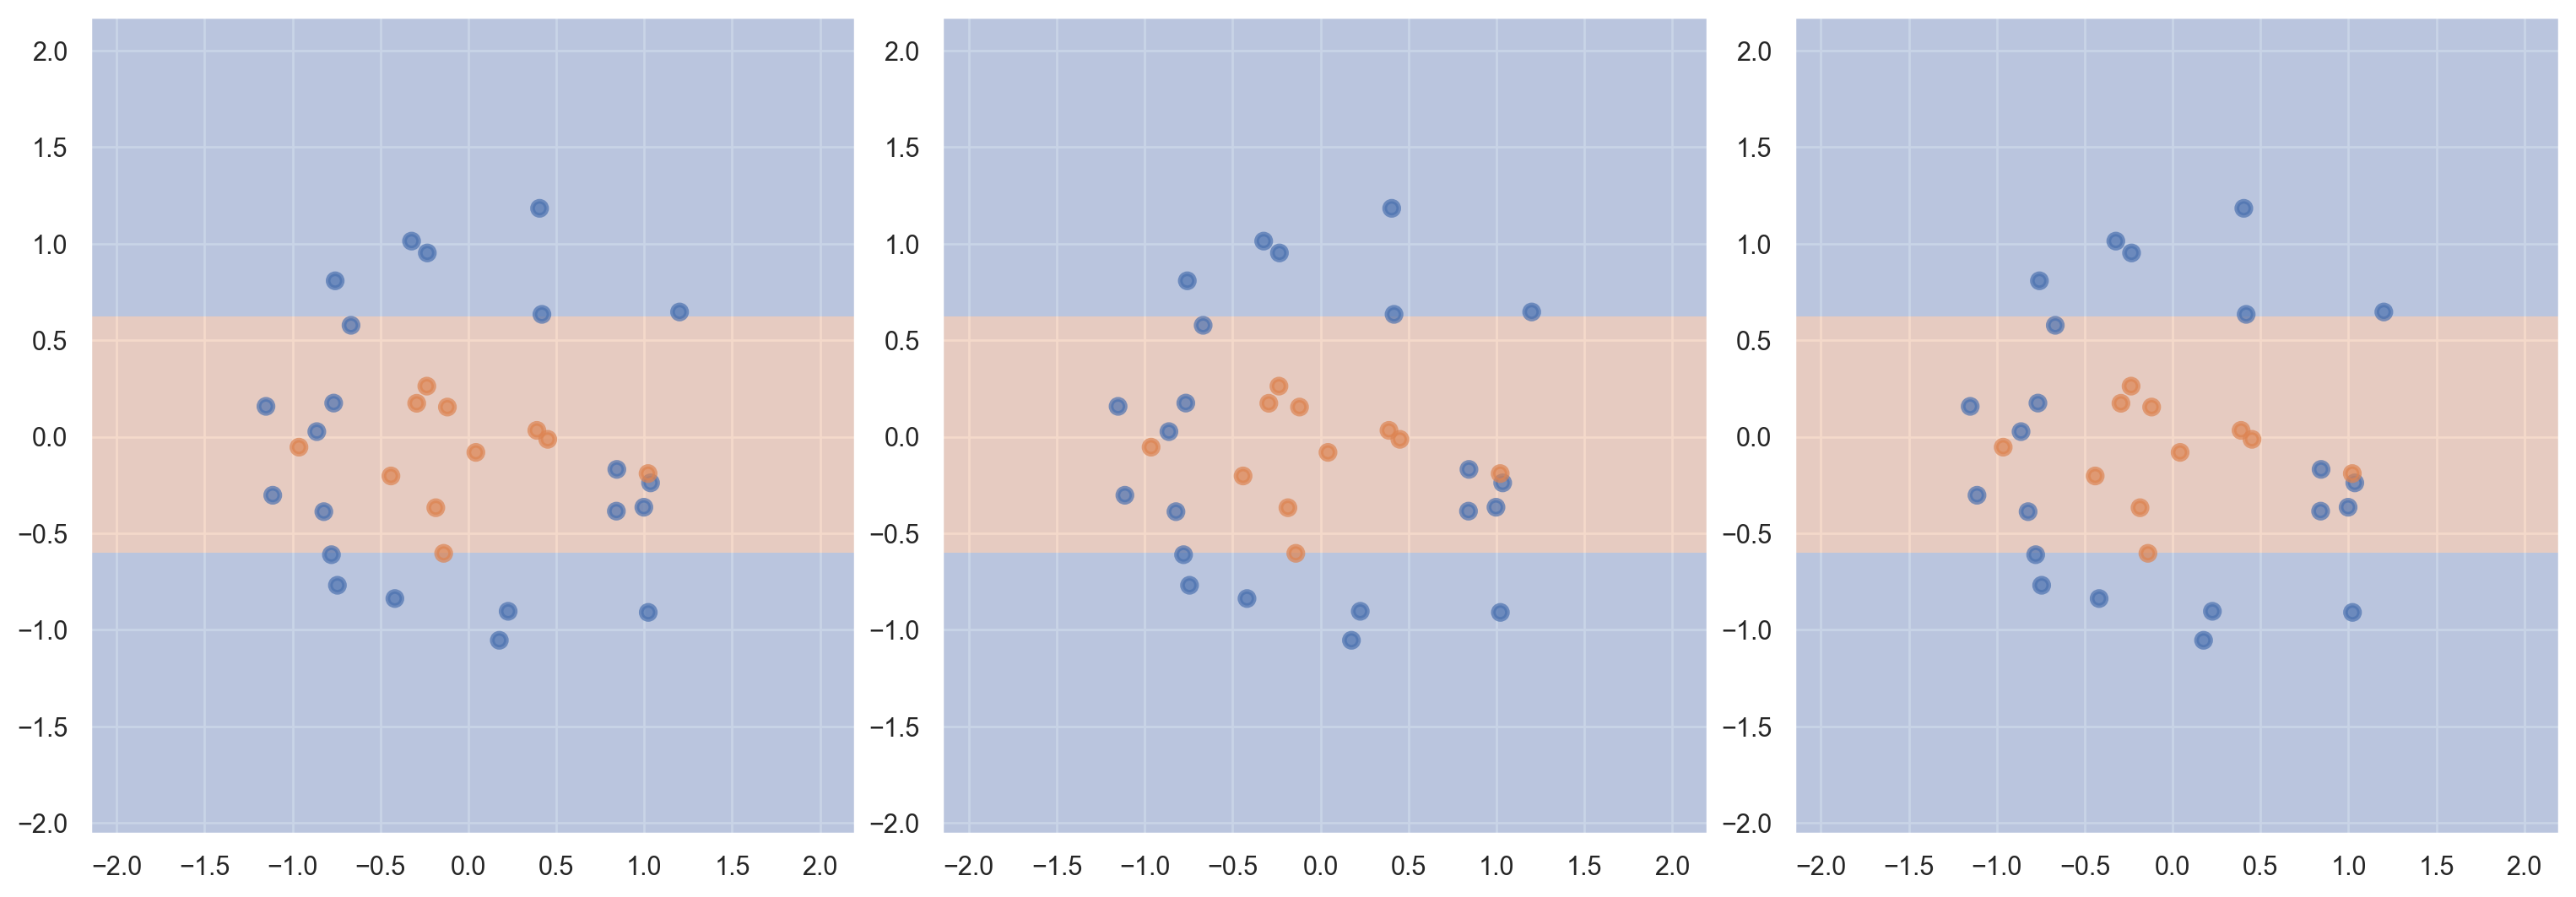

   dataset  max_depth  min_samples_leaf  mean_train_score  mean_test_score
0        1          6                 2          0.940299         0.848485
1        1          6                 6          0.820896         0.909091
2        1          6                10          0.820896         0.666667


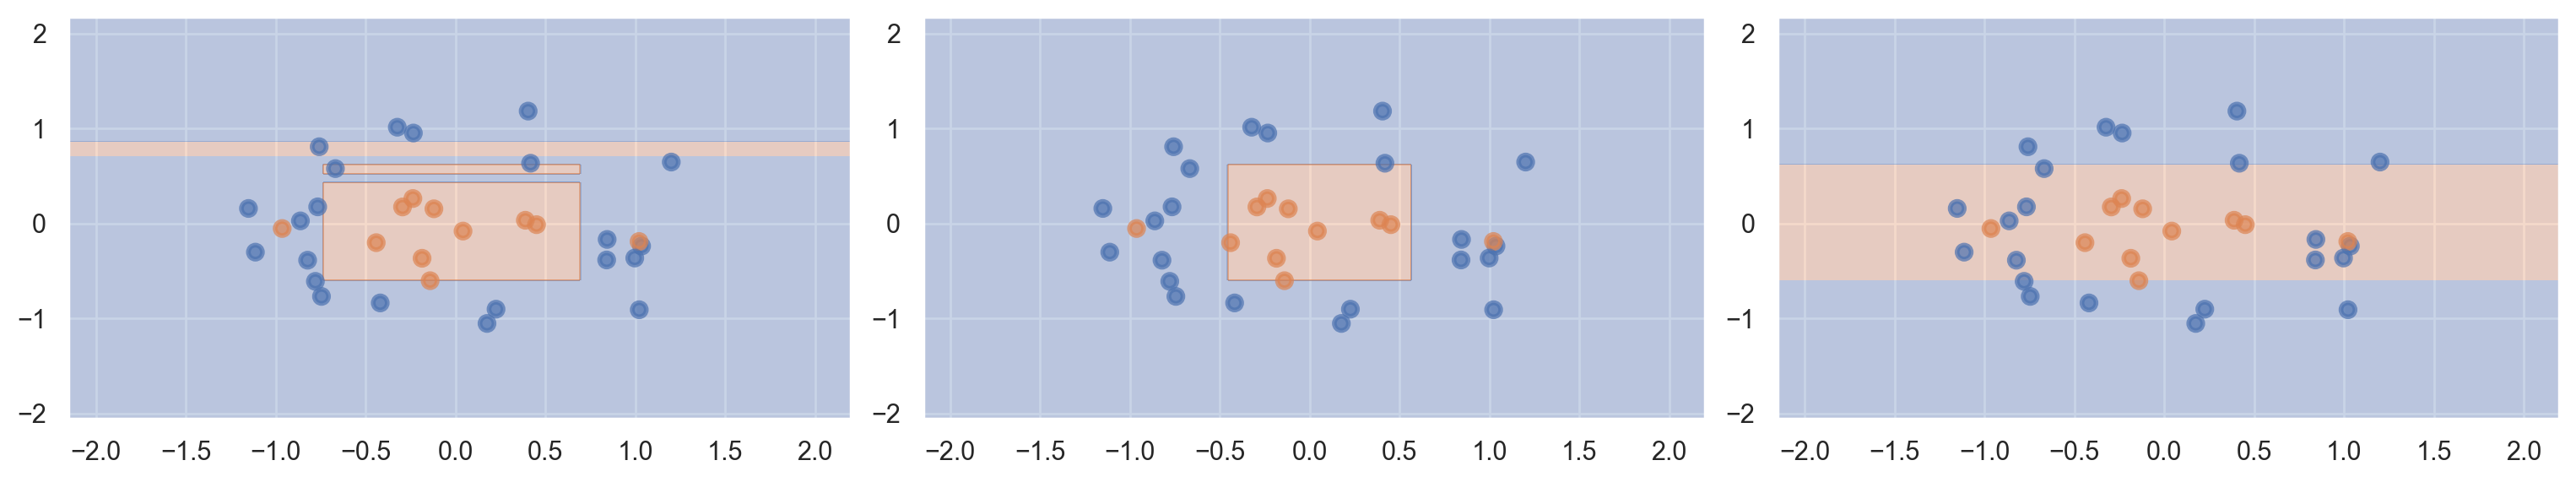

   dataset  max_depth  min_samples_leaf  mean_train_score  mean_test_score
0        1         10                 2          0.940299         0.878788
1        1         10                 6          0.820896         0.909091
2        1         10                10          0.820896         0.666667


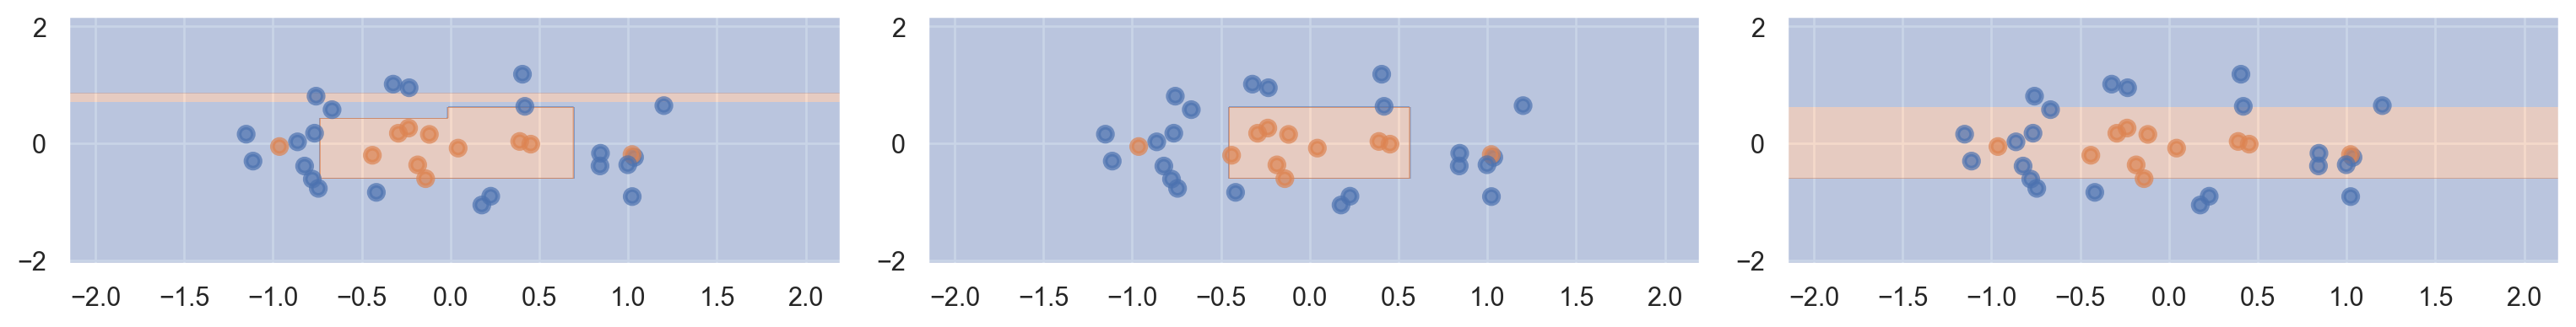

   dataset  max_depth  min_samples_leaf  mean_train_score  mean_test_score
0        2          2                 2          0.910448         0.818182
1        2          2                 6          0.880597         0.757576
2        2          2                10          0.850746         0.787879


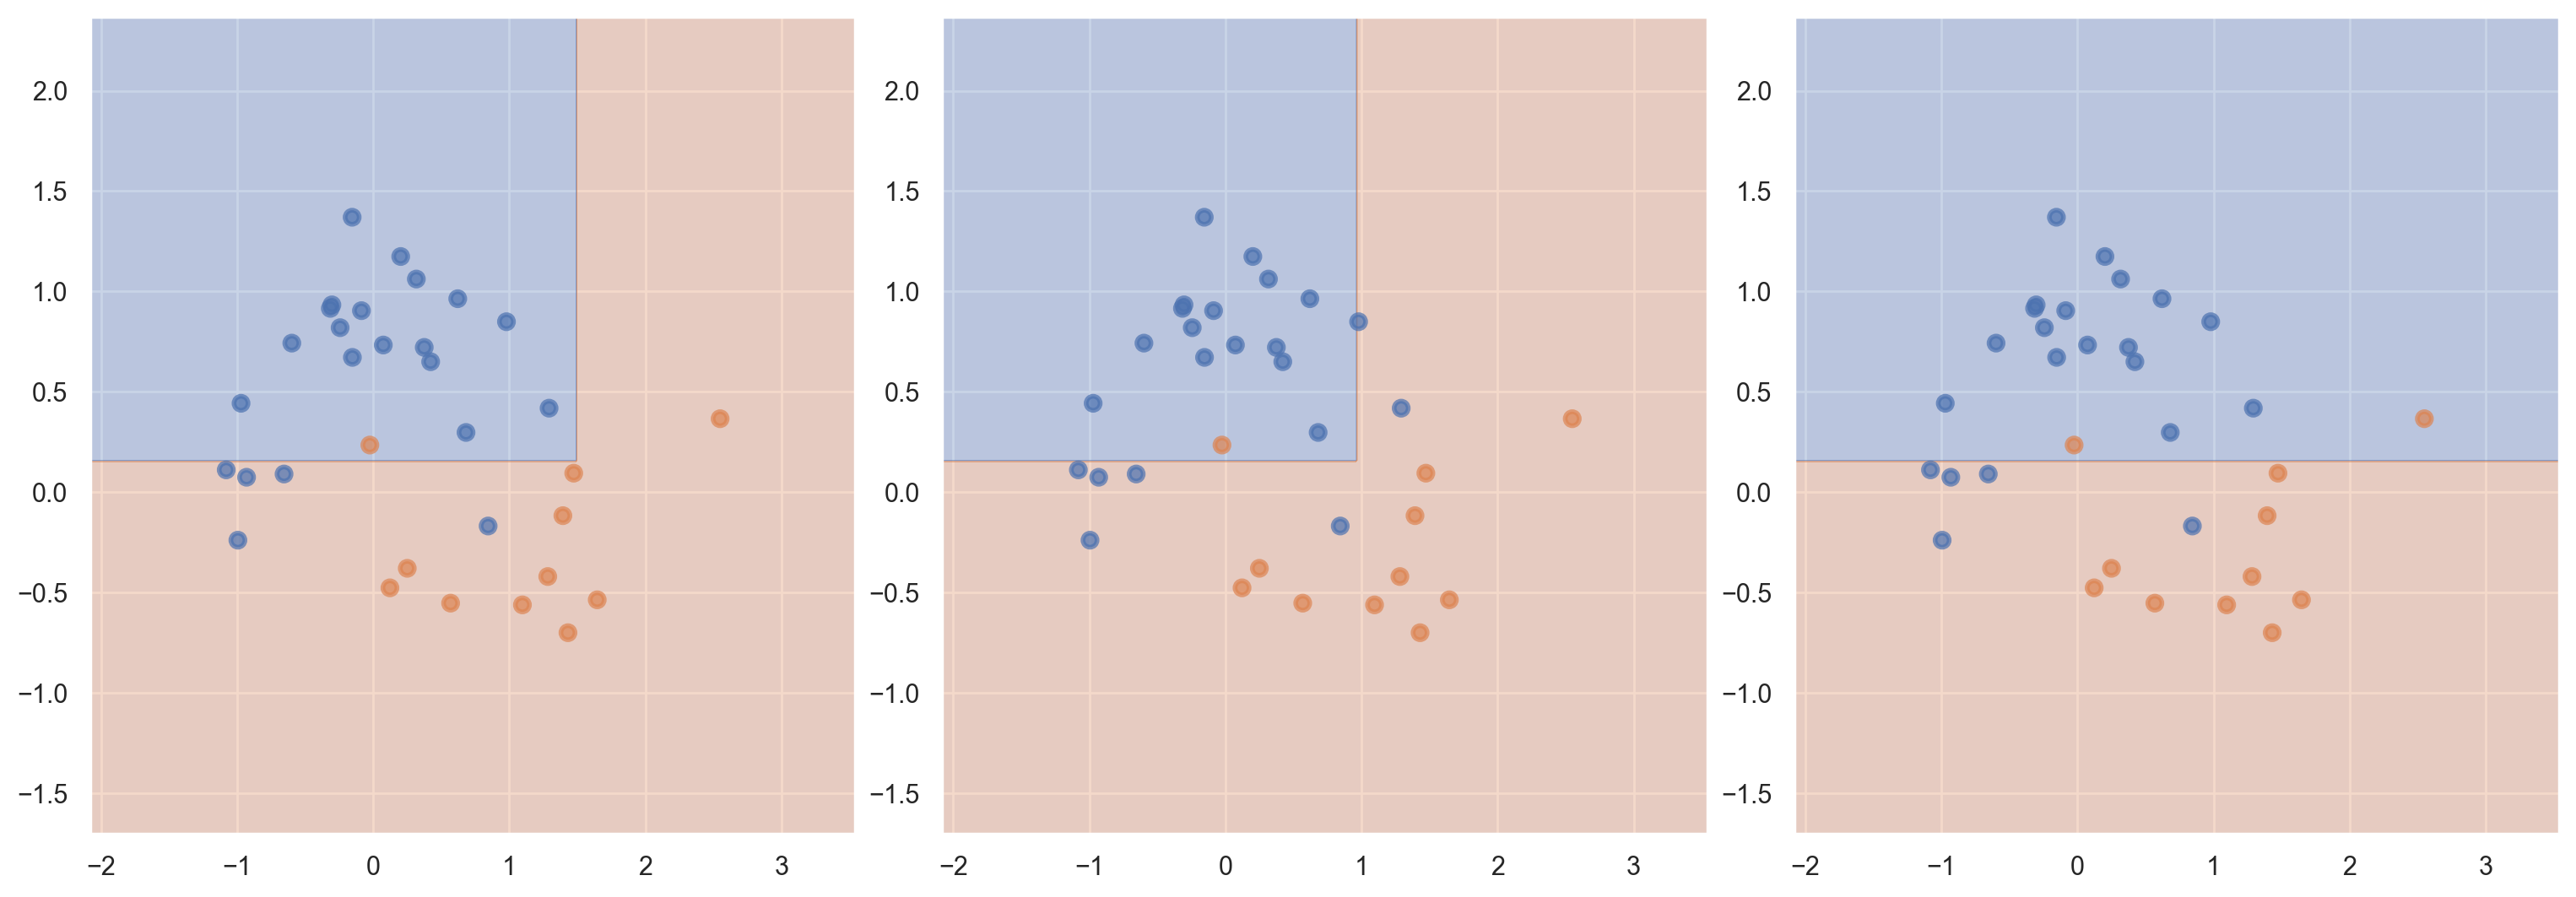

   dataset  max_depth  min_samples_leaf  mean_train_score  mean_test_score
0        2          6                 2          0.985075         0.787879
1        2          6                 6          0.910448         0.696970
2        2          6                10          0.865672         0.787879


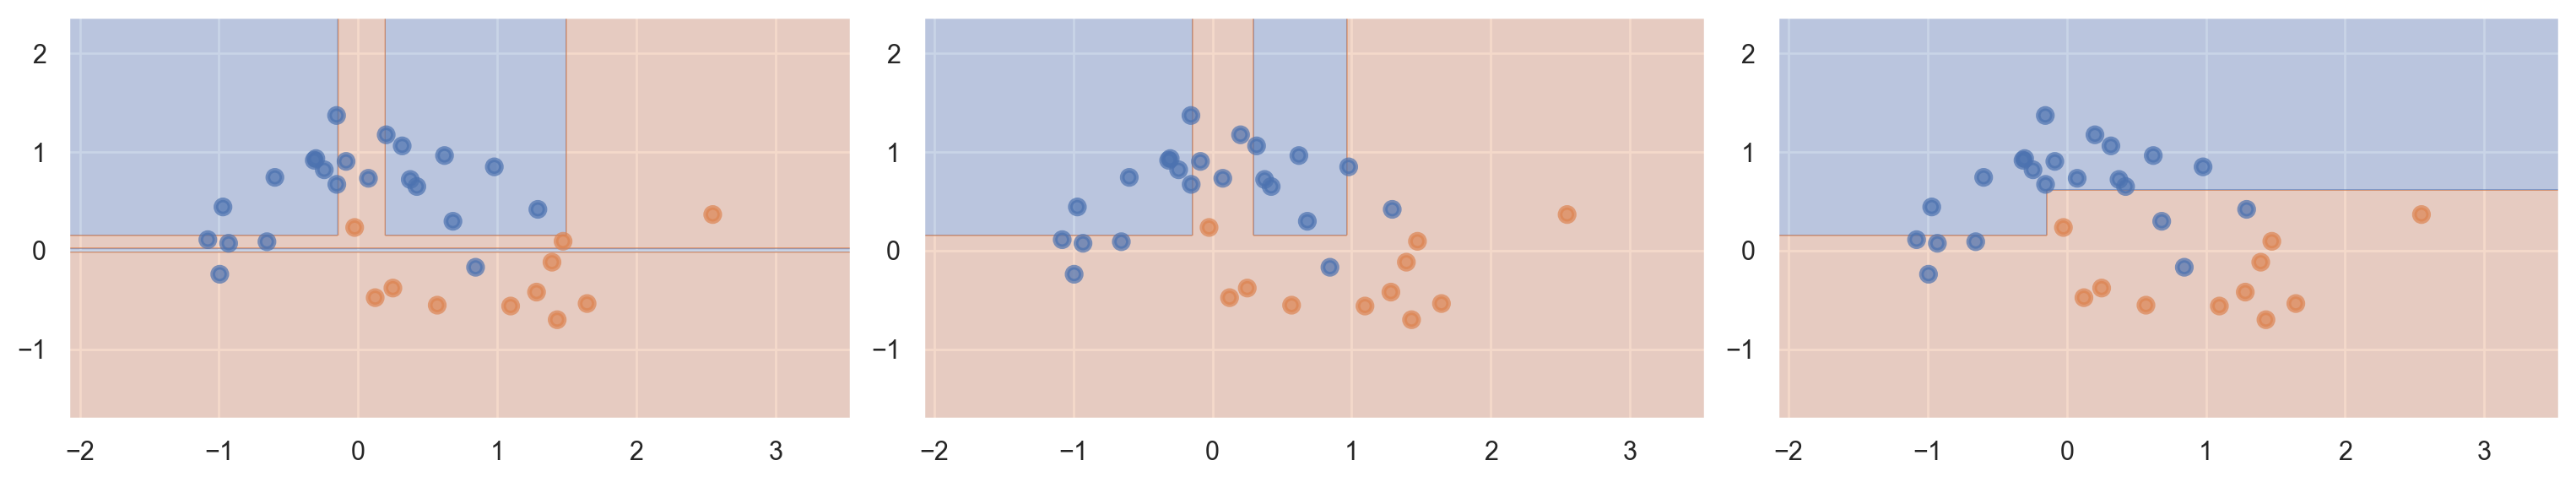

   dataset  max_depth  min_samples_leaf  mean_train_score  mean_test_score
0        2         10                 2          0.985075         0.787879
1        2         10                 6          0.910448         0.696970
2        2         10                10          0.865672         0.787879


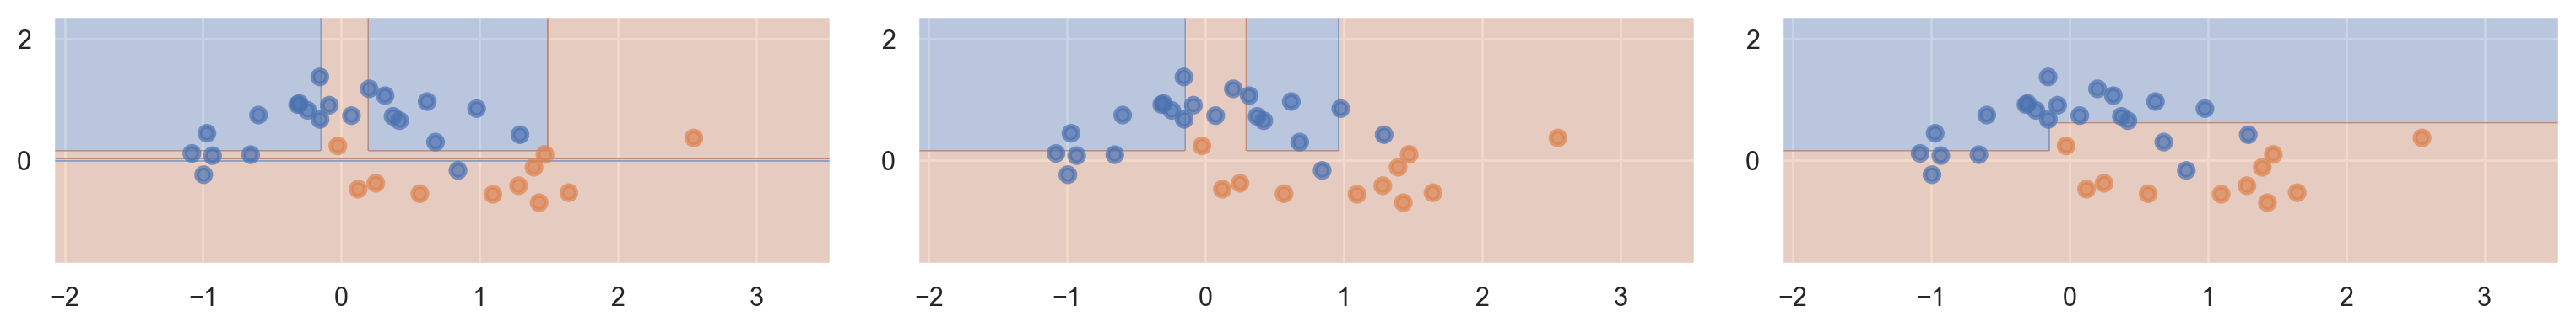

   dataset  max_depth  min_samples_leaf  mean_train_score  mean_test_score
0        3          2                 2          0.880597         0.787879
1        3          2                 6          0.880597         0.787879
2        3          2                10          0.880597         0.787879


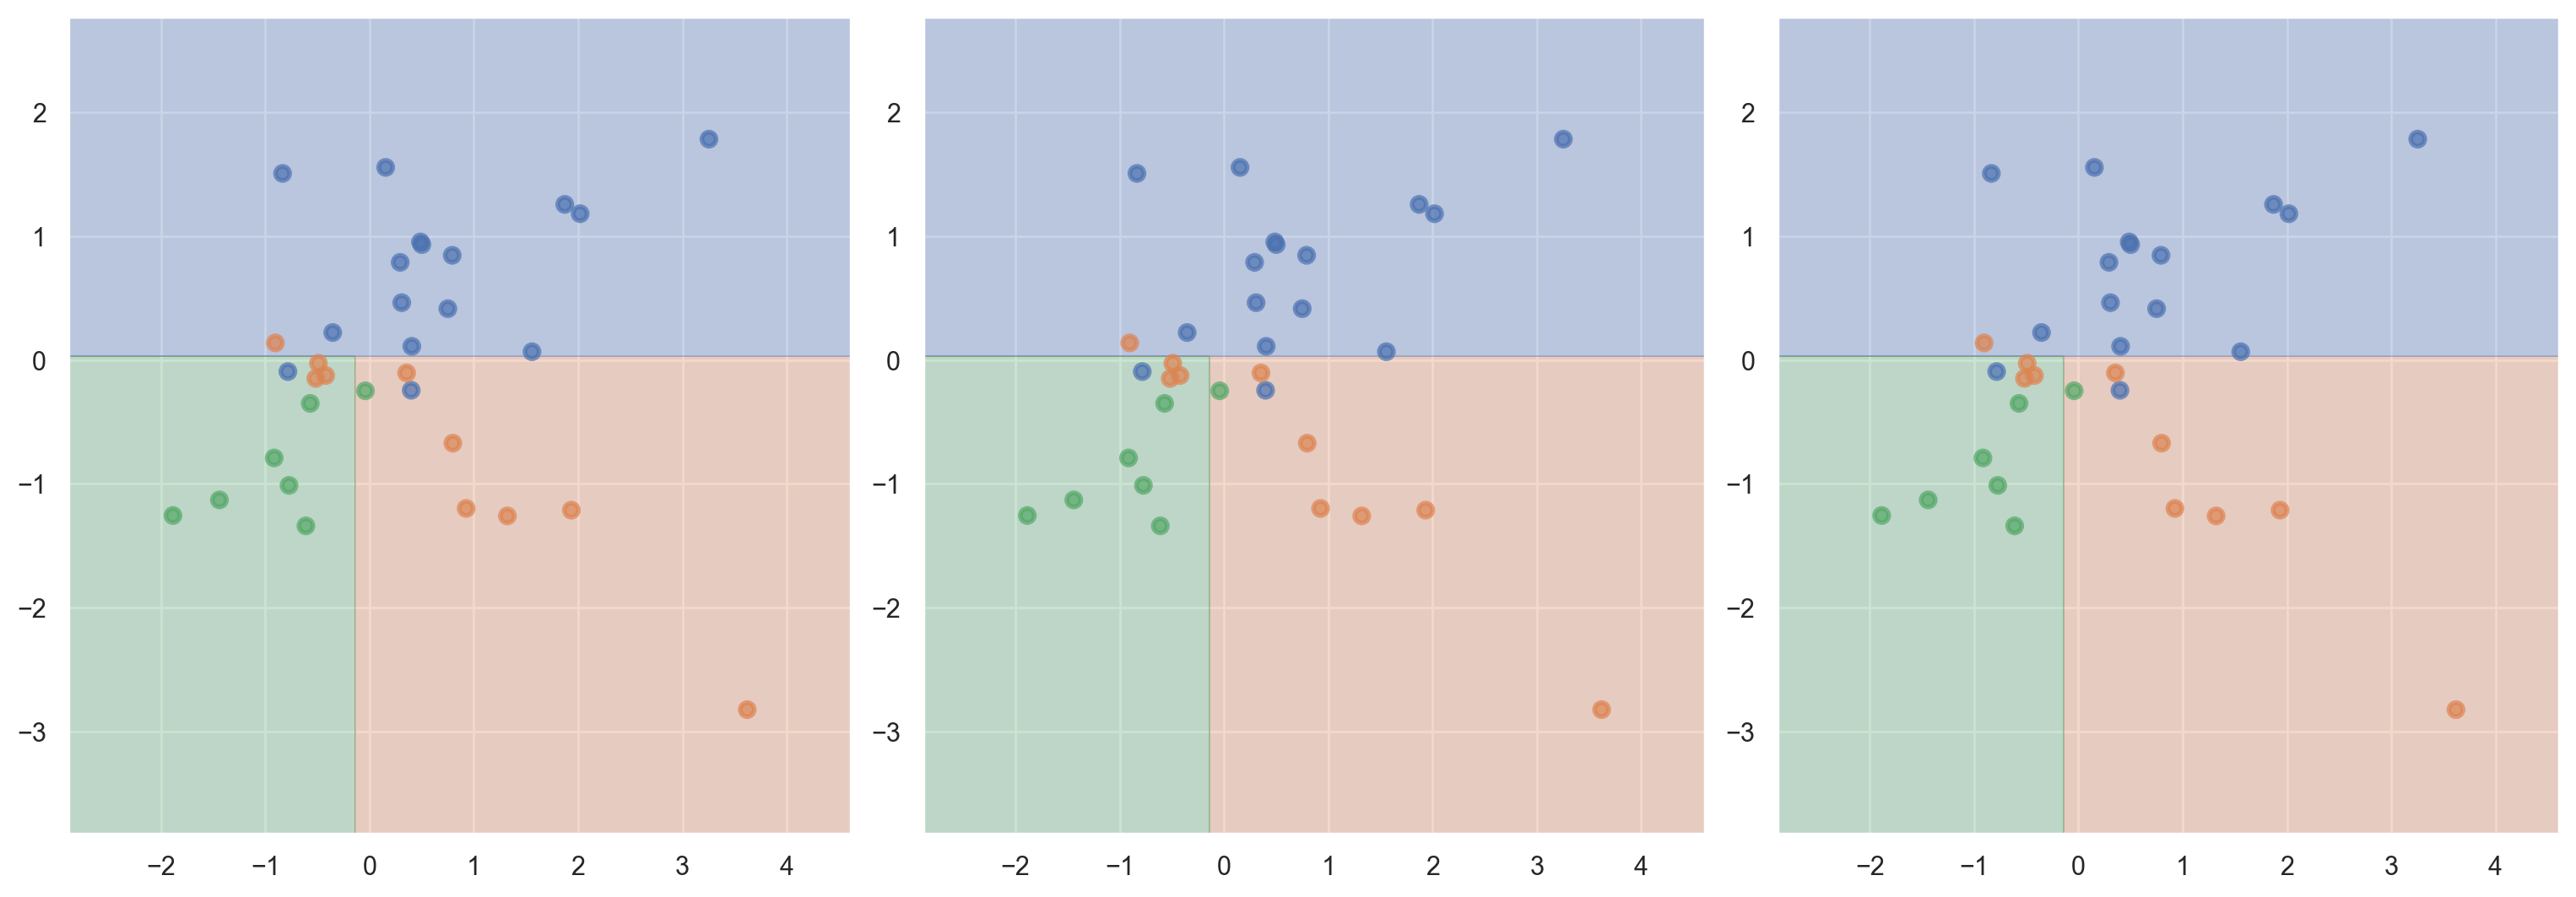

   dataset  max_depth  min_samples_leaf  mean_train_score  mean_test_score
0        3          6                 2          0.910448         0.848485
1        3          6                 6          0.880597         0.787879
2        3          6                10          0.880597         0.787879


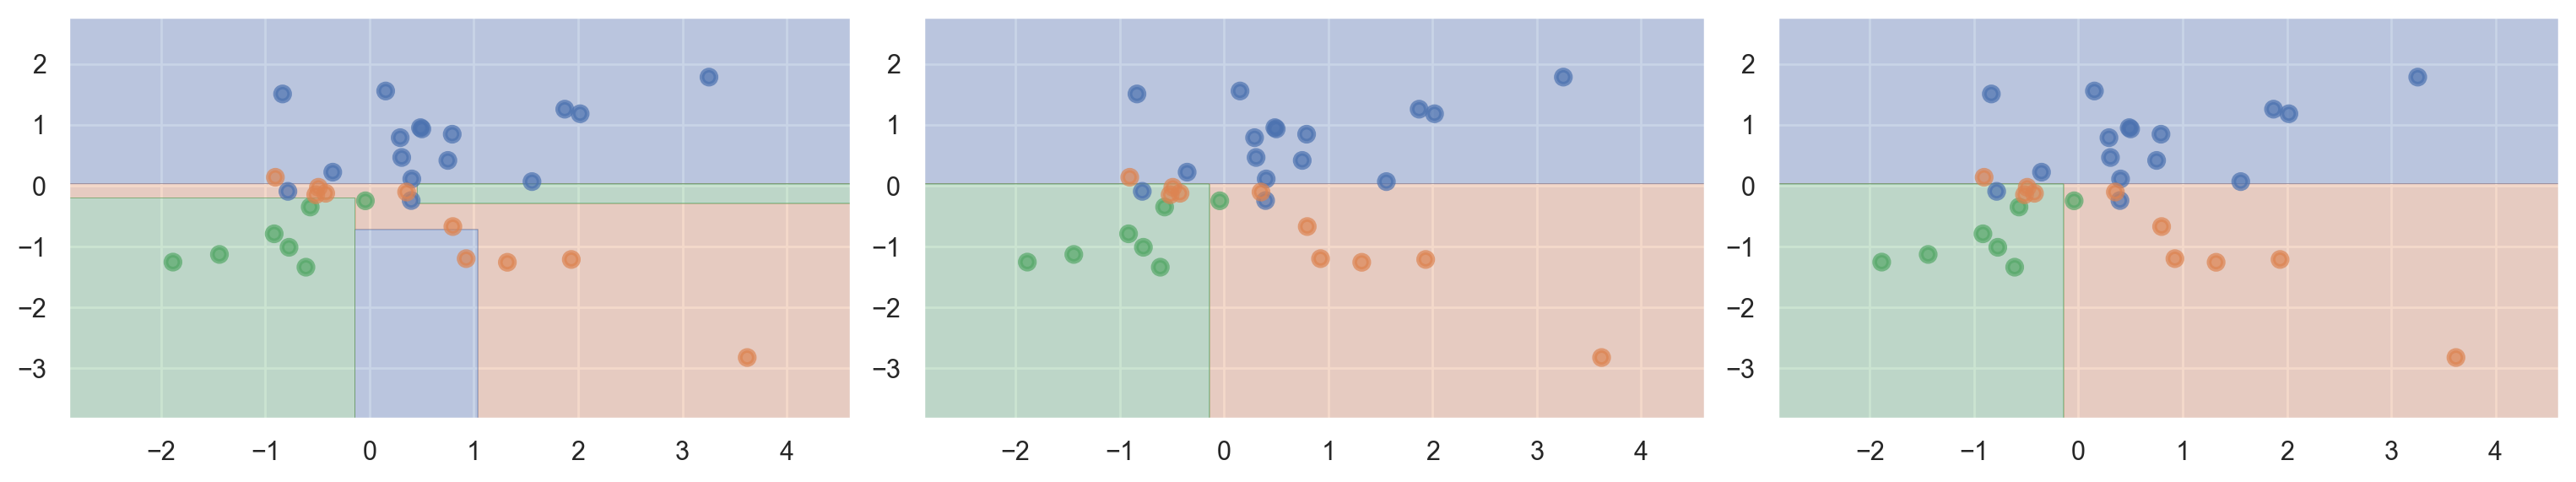

   dataset  max_depth  min_samples_leaf  mean_train_score  mean_test_score
0        3         10                 2          0.910448         0.818182
1        3         10                 6          0.880597         0.787879
2        3         10                10          0.880597         0.787879


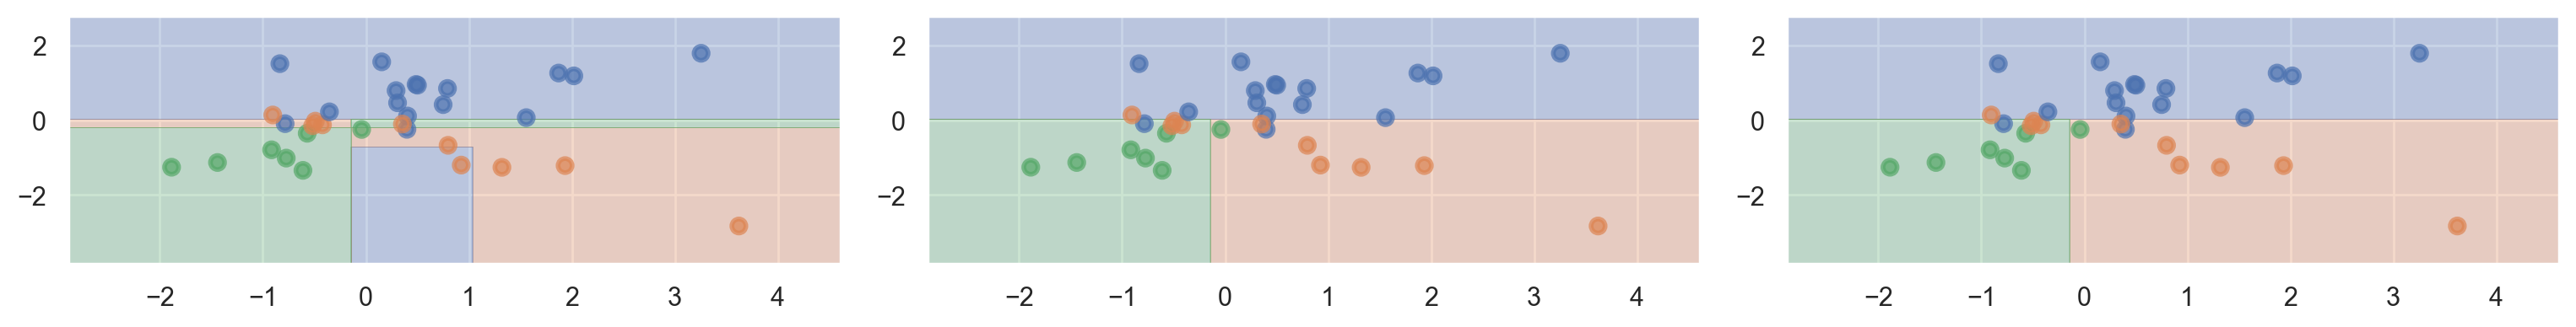

In [10]:
params_grid = {
    'max_depth': np.arange(2, 11, 4),
    'min_samples_leaf': np.arange(2, 11, 4)
}

results = pd.DataFrame()

for k, (x, y) in enumerate(datasets):
    for i, depth in enumerate(params_grid['max_depth']):
        plt.figure(figsize = (16, 6))
        for j, sample in enumerate(params_grid['min_samples_leaf']):
            plt.subplot(i + 1, 3, j + 1)
            X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
            dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=sample).fit(X_train, y_train)
            y_train_tree_pred = dt.predict(X_train)
            y_test_tree_pred = dt.predict(X_test)
            to_insert = {
                'dataset': [k + 1],
                'max_depth': [depth],
                'min_samples_leaf': [sample],
                'mean_train_score': [accuracy_score(y_train, y_train_tree_pred)],
                'mean_test_score': [accuracy_score(y_test, y_test_tree_pred)]
            }
            results = pd.concat([results, pd.DataFrame(to_insert)], ignore_index=True)
            plot_surface(dt, X_test, y_test)
        print(results)
        plt.show()
        results.drop(results.index, inplace=True)

__Ответ:__ в 1 датасете тенденция такая: при очень малом кол-ве наблюдений в листьях (1-2) дерево сильно переобучается, при большом кол-ве наблюдений(9-10) наоборот недообучается, а при среднем кол-ве ведет себя лучше всего. Во 2 датасете лучше всего при большом кол-ве наблюдений в листьях, а хуже при малом. В 3 датасете примерно также. Я заметил, что при изменении глубины дерева, разделяющая поверхность изменяется по вертикали, а при изменении кол-ва наблюдений в листьях по горизонтали

$\color{red}{\text{Комментарий от проверяющего:}}$

**Балл:** 1.5

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

**Ссылочка на успешный контест:** https://contest.yandex.ru/contest/43413/run-report/77192258/

$\color{red}{\text{Комментарий от проверяющего:}}$

**Балл:** 1.5

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [11]:
%load_ext autoreload

In [12]:
%autoreload 2
from hw5code import find_best_split, DecisionTree

In [13]:
df = pd.read_csv('students.csv')
df.head(5)

STG   SCG   STR   LPR   PEG  UNS
0  0.00  0.00  0.00  0.00  0.00    0
1  0.08  0.08  0.10  0.24  0.90    1
2  0.06  0.06  0.05  0.25  0.33    0
3  0.10  0.10  0.15  0.65  0.30    1
4  0.08  0.08  0.08  0.98  0.24    0

In [14]:
df.shape

(258, 6)

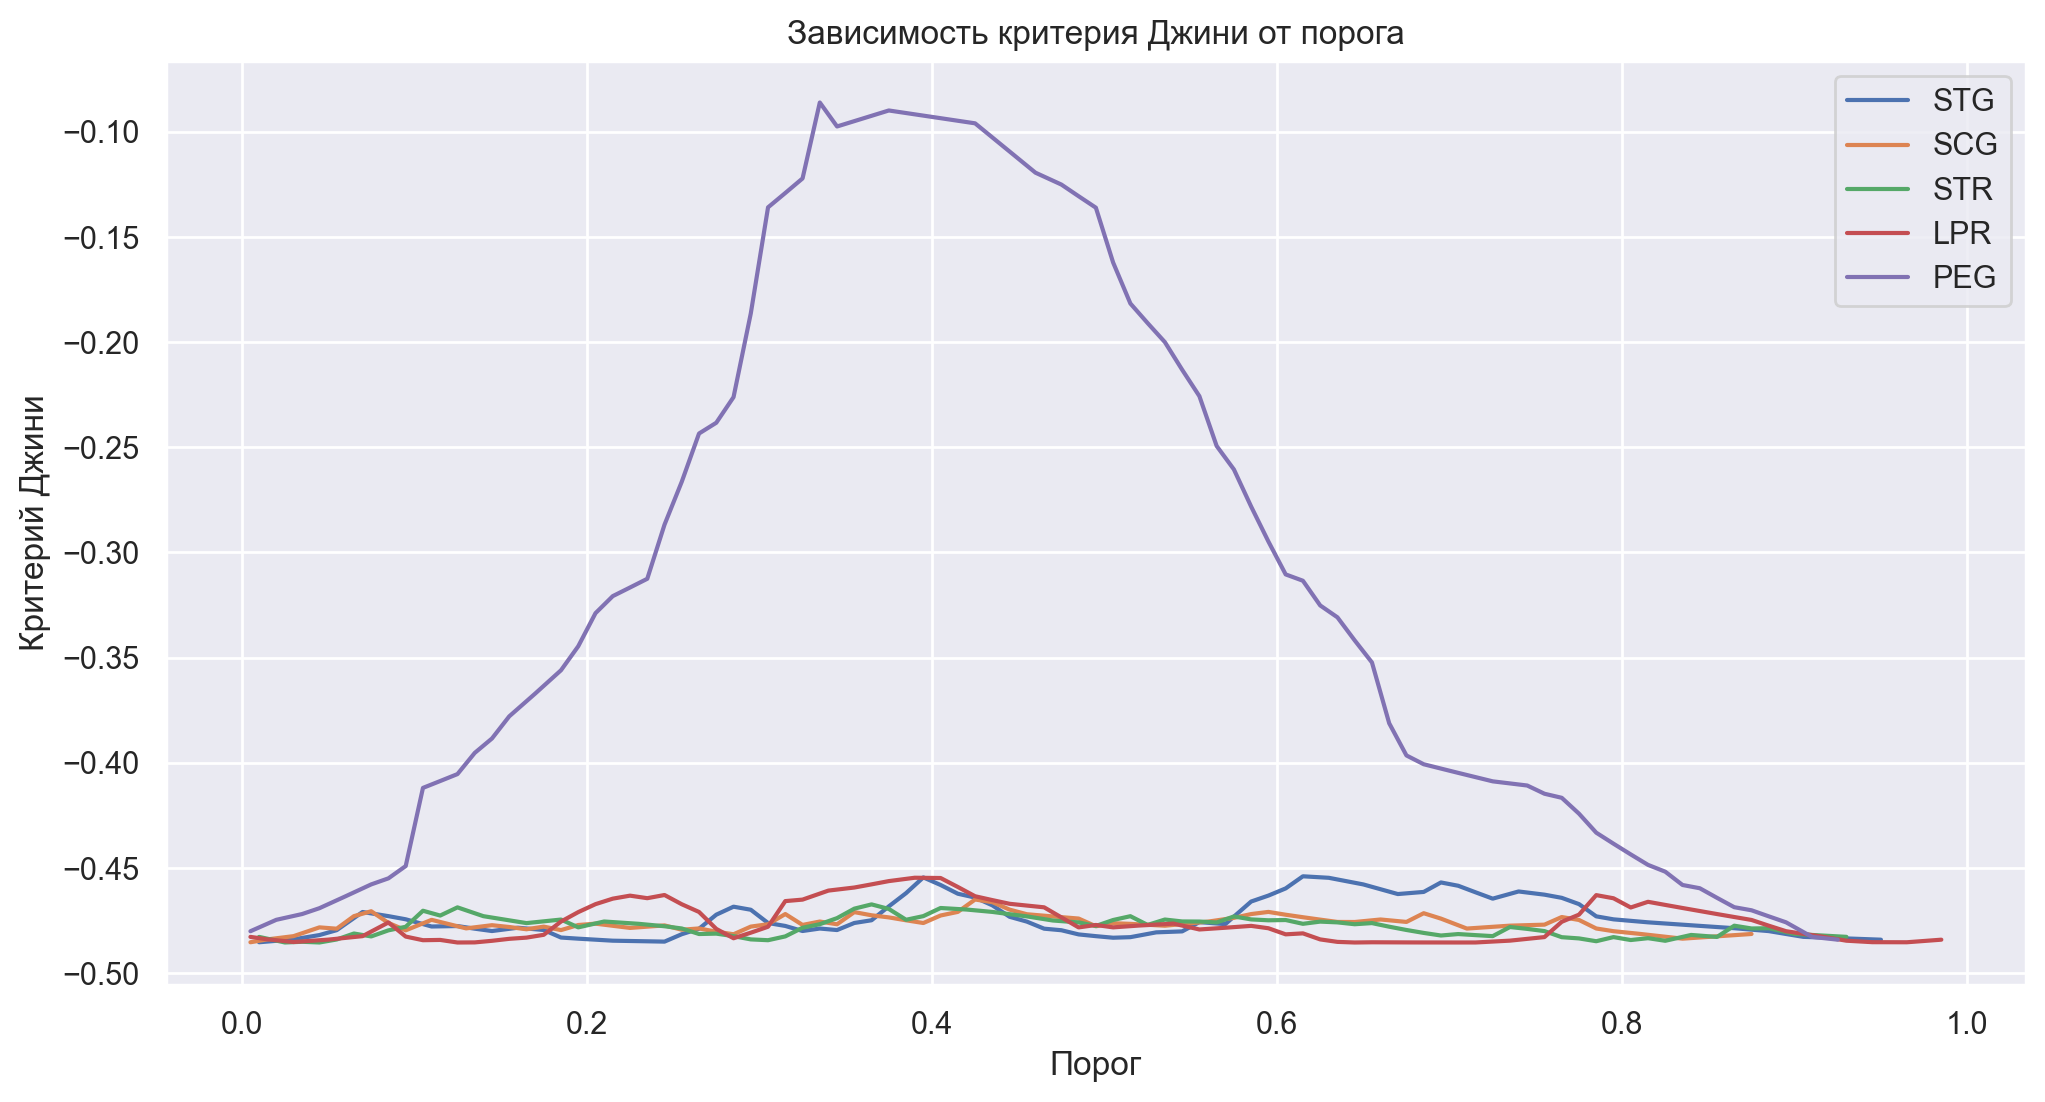

In [18]:
columns = df.columns.to_list()
columns.pop()

for column in columns:
    tresholds, ginis, threshold_best, gini_best = find_best_split(df[column].to_numpy(), df['UNS'].to_numpy())
    plt.plot(tresholds, ginis, label=column)
    plt.legend()
plt.title('Зависимость критерия Джини от порога')
plt.xlabel('Порог')
plt.ylabel('Критерий Джини')
plt.show()

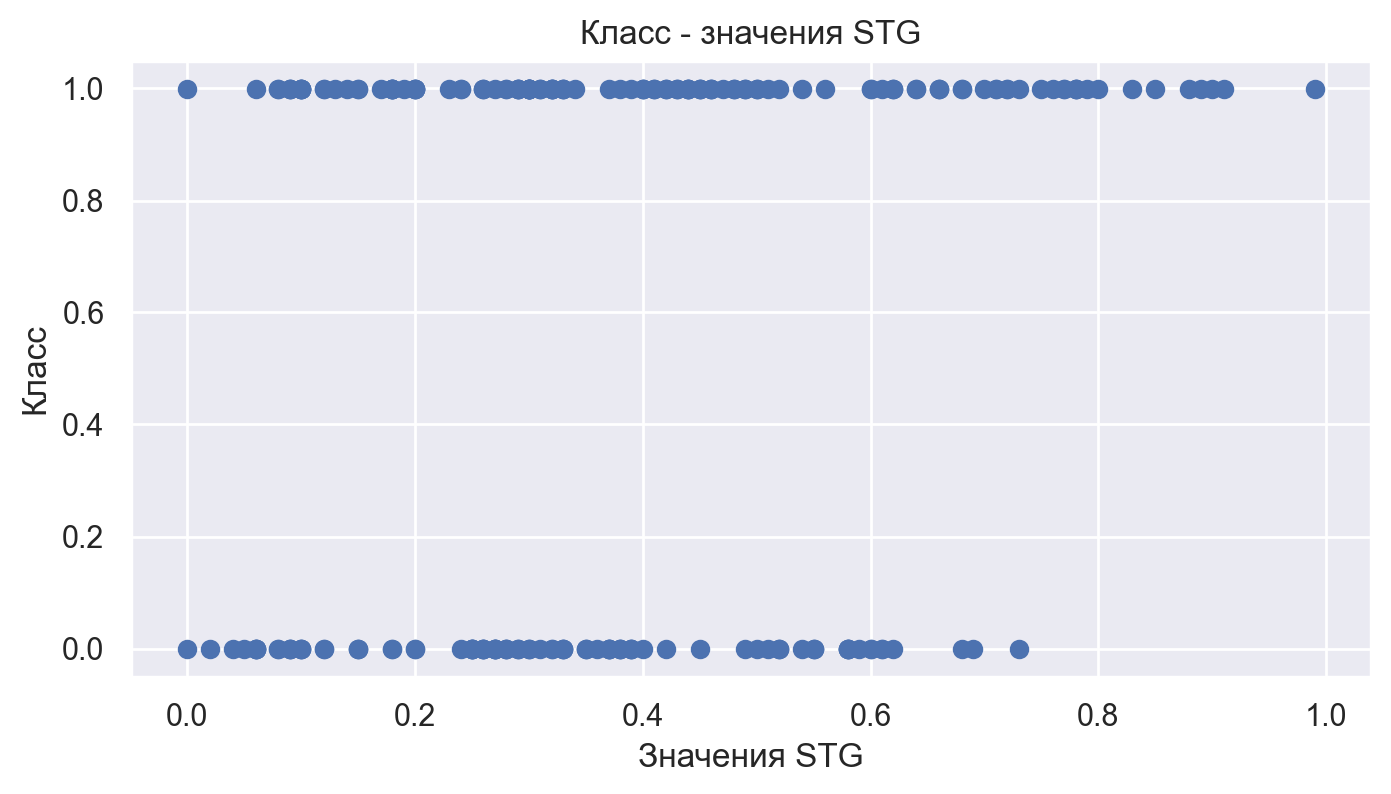

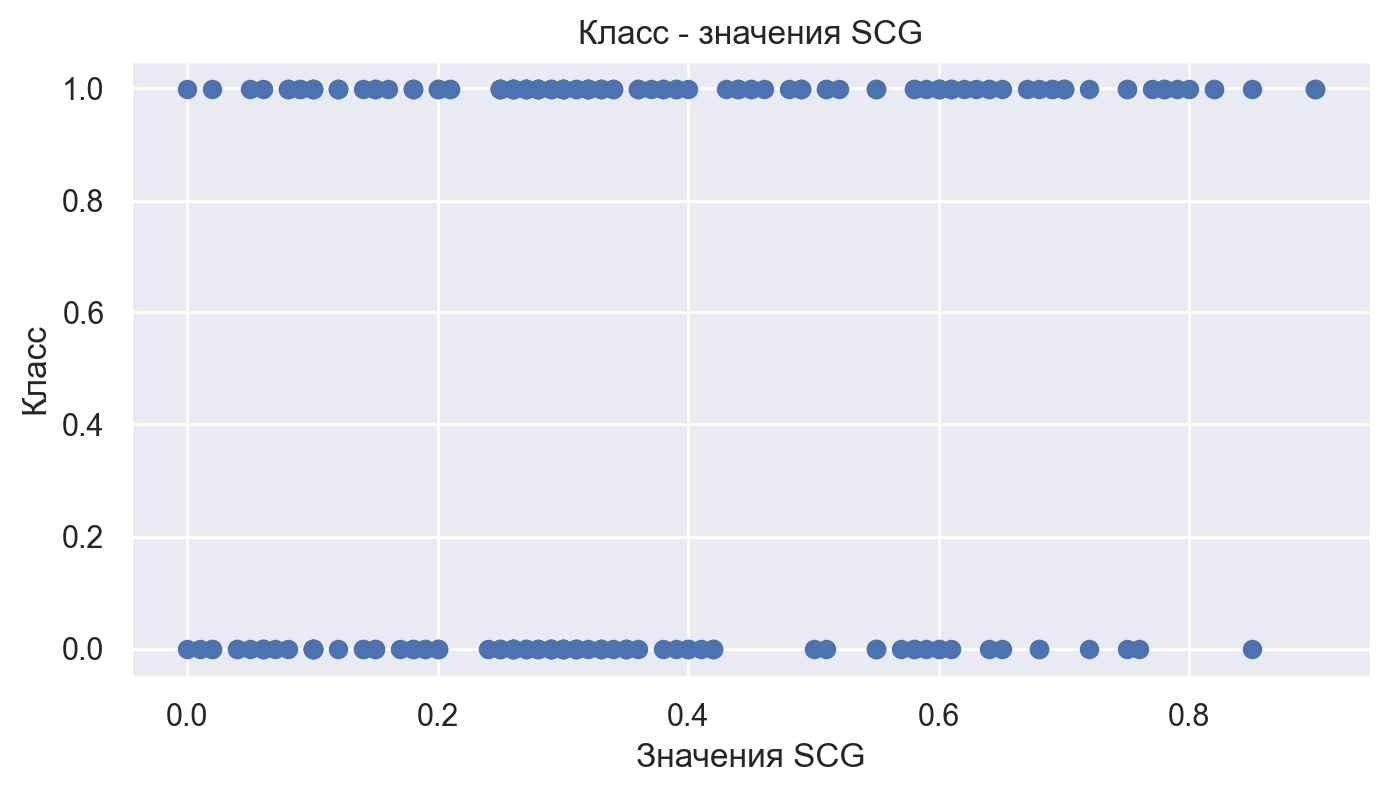

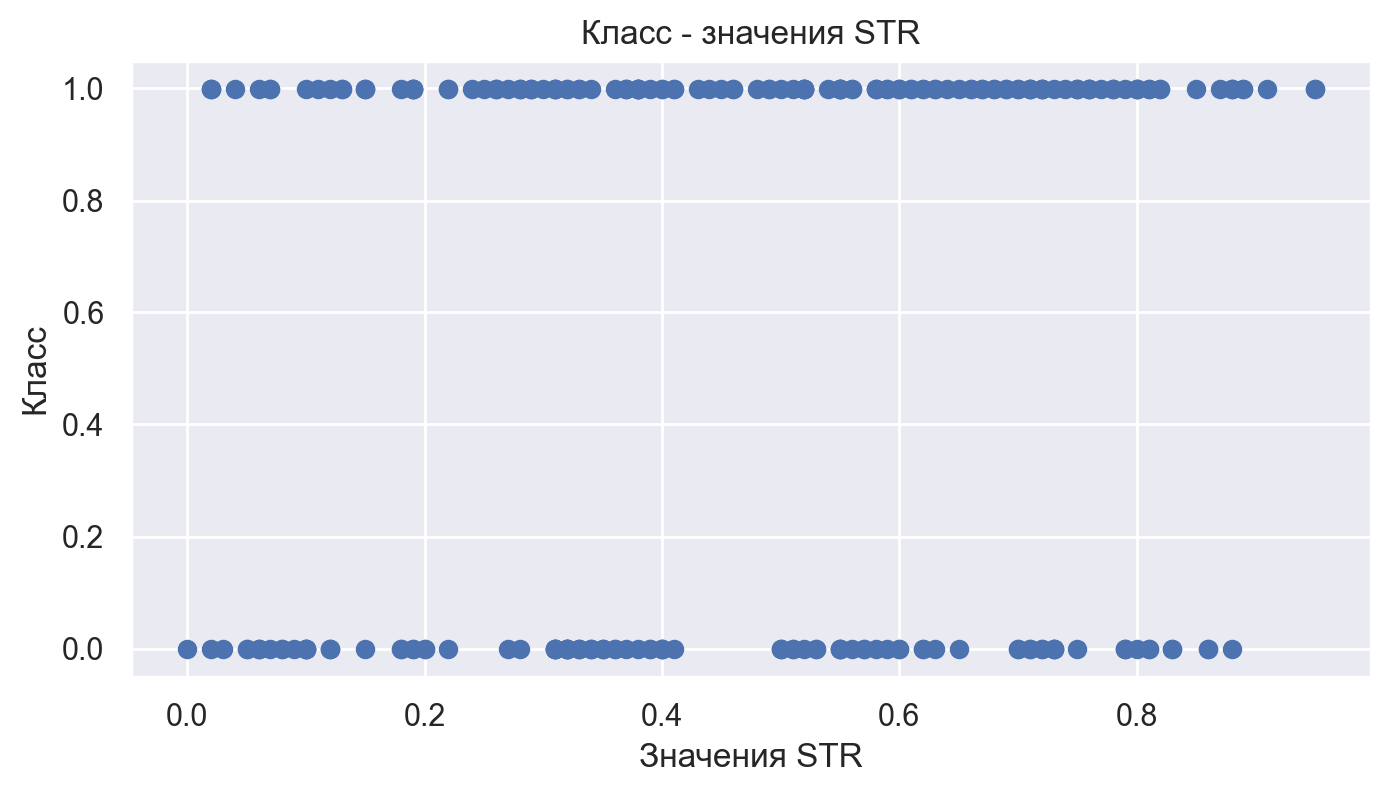

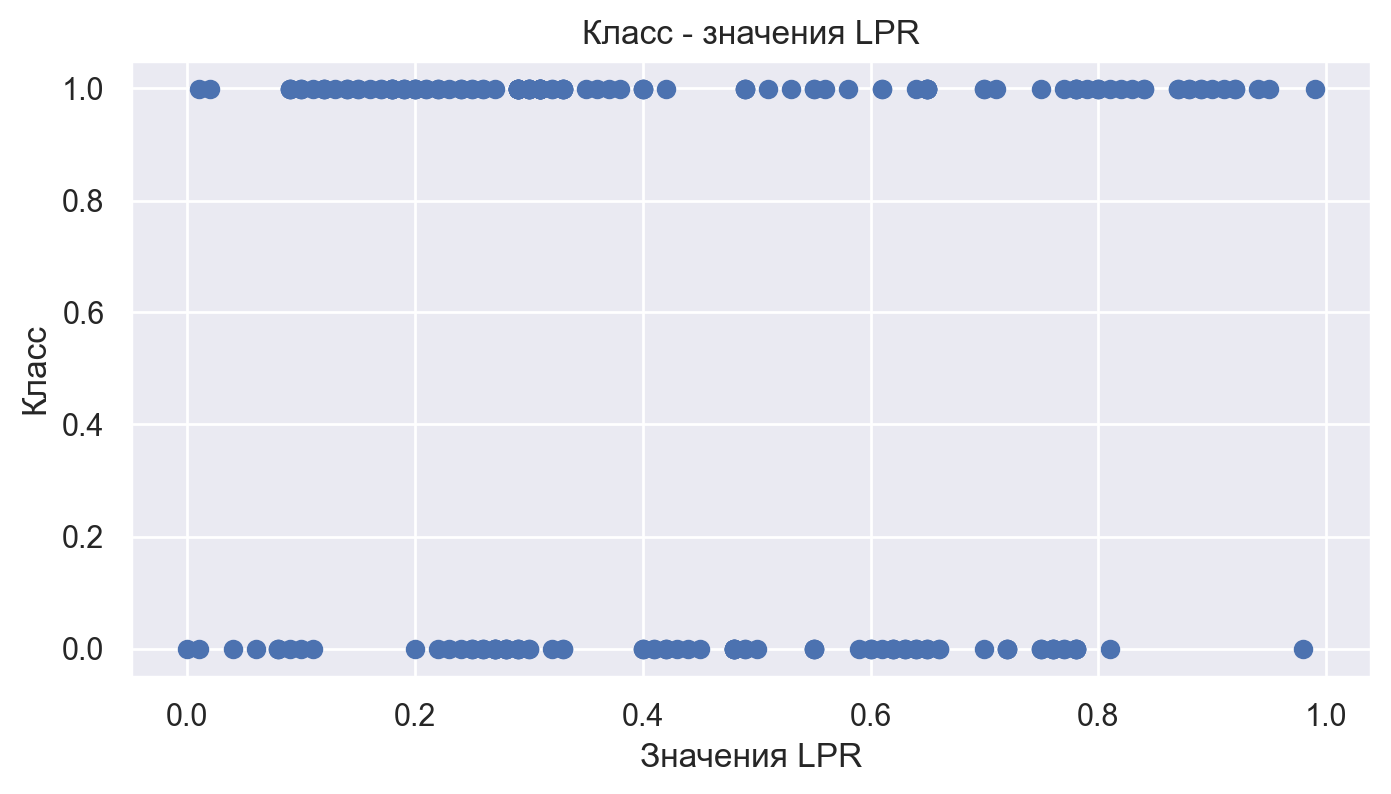

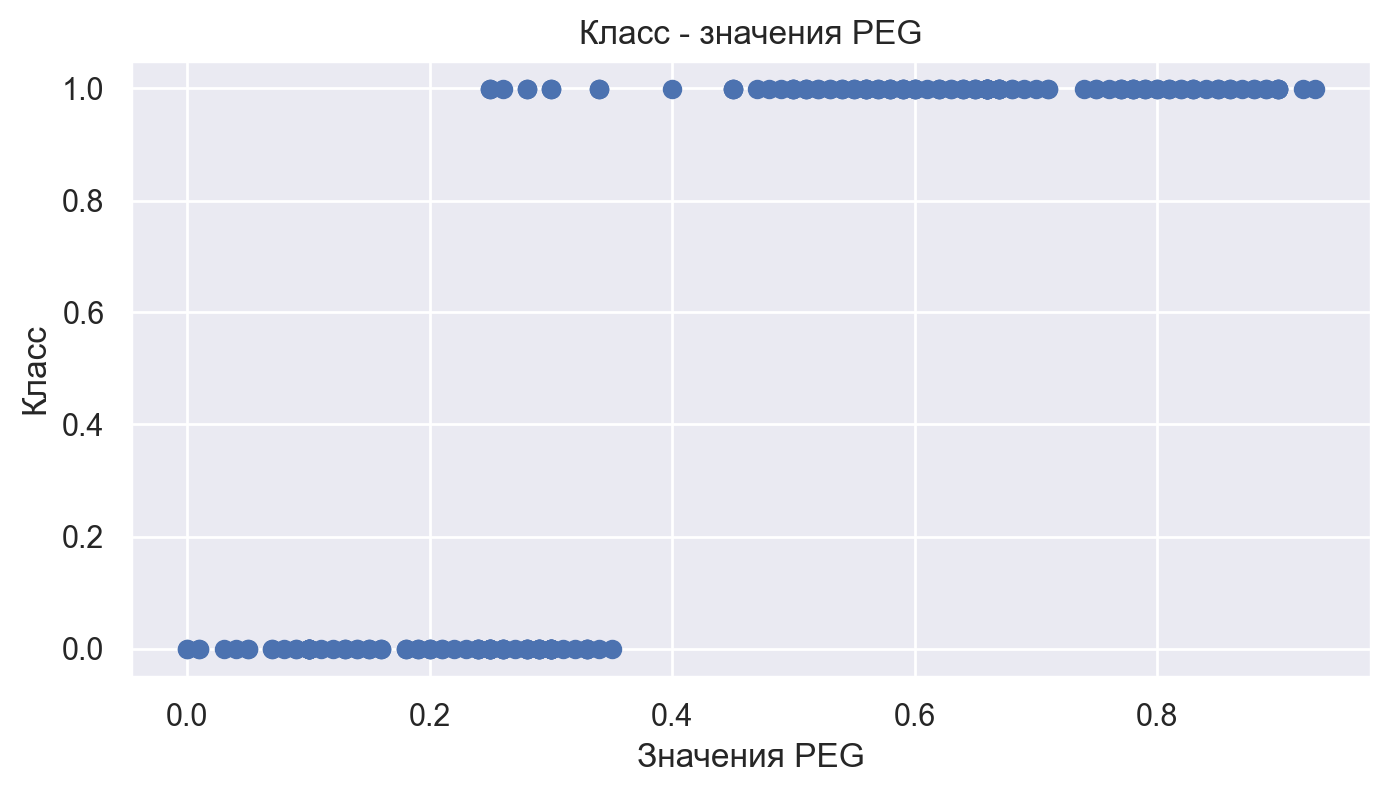

In [19]:
for column in columns:
    fig = plt.figure(figsize=(8,4))
    plt.scatter(df[column], df['UNS'])
    
    plt.title(f'Класс - значения {column}')
    plt.xlabel(f'Значения {column}')
    plt.ylabel('Класс')
    plt.show()

$\color{red}{\text{Комментарий от проверяющего:}}$

**Балл:** 0.5

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Исходя из кривых значений критерия Джини нужно производить деление выборки на два поддерева по признаку PEG, тк у него при определенном пороге выделяется пик, то есть максимальное значение критерия Джини. А нам как раз и нужно его максимизировать. Этот результат согласуется с scatter-графиком, тк для этого признака мы видим, что начиная с определенного значения все объекты с большим значением относятся к положительному классу, а с меньшим значением к отрицательному. Вид кривой для хороших признаков, по которым выборка делится почти идеально будут стремитья к одному резкому пику, при определенном значении (что-то похожее на дельта функцию). А вот кривые, по которым деление практически невозможно будут похожи на горизонтальные кривые. То есть какой бы порог мы не взяли, "хаос" в этих поддеревьях будет такой же 

$\color{red}{\text{Комментарий от проверяющего:}}$

**Балл:** 0.5

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

**Ссылочка на контест:** https://contest.yandex.ru/contest/43413/run-report/77919521/

$\color{red}{\text{Комментарий от проверяющего:}}$

**Балл:** 1.5

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [20]:
columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 
           'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
          'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
          'ring-type', 'spore-print-color', 'population', 'habitat']
df_mushrooms = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',
                names=columns)

In [21]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from hw5code import DecisionTree
from sklearn.metrics import accuracy_score

In [23]:
encoder = LabelEncoder()

for column in df_mushrooms.columns:
    df_mushrooms[column] = encoder.fit_transform(df_mushrooms[column])

y = df_mushrooms['class']
X = df_mushrooms.drop(columns=['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

feature_types = ['categorical'] * X_train.shape[1]

clf = DecisionTree(feature_types)
clf.fit(X_train.to_numpy(), y_train.to_numpy())

In [25]:
clf._tree
#посмотрим как выглядит дерево

{'type': 'nonterminal',
 'feature_split': 4,
 'categories_split': [3, 0, 5],
 'left_child': {'type': 'nonterminal',
  'feature_split': 19,
  'categories_split': [3, 2, 4, 1, 0, 6, 8, 7],
  'left_child': {'type': 'nonterminal',
   'feature_split': 14,
   'categories_split': [3, 6, 5, 2, 7, 4],
   'left_child': {'type': 'nonterminal',
    'feature_split': 0,
    'categories_split': [4, 5, 2, 0, 3],
    'left_child': {'type': 'nonterminal',
     'feature_split': 1,
     'categories_split': [2, 3, 0],
     'left_child': {'type': 'nonterminal',
      'feature_split': 14,
      'categories_split': [3, 6, 5, 2, 7],
      'left_child': {'type': 'nonterminal',
       'feature_split': 21,
       'categories_split': [0, 6, 1, 4, 3, 5],
       'left_child': {'type': 'terminal', 'class': 0},
       'right_child': {'type': 'nonterminal',
        'feature_split': 1,
        'categories_split': [2],
        'left_child': {'type': 'terminal', 'class': 0},
        'right_child': {'type': 'terminal', 'cl

In [26]:
y_pred_mush = clf.predict(X_test.values)
accuracy_score(y_test, y_pred_mush)

1.0

$\color{red}{\text{Комментарий от проверяющего:}}$

**Балл:** 0.5

__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [102]:
columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 
           'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
          'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
          'ring-type', 'spore-print-color', 'population', 'habitat']
df_mushrooms = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',
                names=columns)

In [103]:
columns = ['top-left-square', 'top-middle-square', 'top-right-square', 'middle-left-square', 'middle-middle-square',
          'middle-right-square', 'bottom-left-square', 'bottom-middle-square', 'bottom-right-square', 'class']
df_tic_tac_toe = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data',
                            names=columns)    

In [104]:
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df_cars = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data',
                     names=columns)
df_cars.loc[df_cars['class'].isin(['unacc', 'acc']), 'class'] = 0
df_cars.loc[df_cars['class'].isin(['good', 'vgood']), 'class'] = 1

In [105]:
columns = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'class']
df_nursery = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data',
                        names=columns)
df_nursery.loc[df_nursery['class'].isin(['not_recom', 'recommend']), 'class'] = 0
df_nursery.loc[df_nursery['class'].isin(['very_recom', 'priority', 'spec_prior']), 'class'] = 1

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer

In [89]:
dataframes = {'mushrooms': df_mushrooms, 
              'tic_tac_toe': df_tic_tac_toe, 
              'cars': df_cars, 
              'nursery': df_nursery
             }
y_data = {}
X_data = {}
encoder = LabelEncoder()

#закодируем фичи
for name, df in dataframes.items():
    for column in df.columns:
        df[column] = encoder.fit_transform(df[column])
    y_data[name] = df['class']
    X_data[name] = df.drop(columns=['class'])

In [90]:
score = []

for name, df in dataframes.items():
    feature_types = ['real'] * X_data[name].shape[1]
    clf = DecisionTree(feature_types)
    scores = cross_val_score(clf, X_data[name].values, y_data[name].values, cv=10, 
                             scoring=make_scorer(accuracy_score))
    score.append(np.mean(scores))
total = pd.DataFrame(score, index=list(dataframes), columns=['real_features'])    

In [34]:
score = []

for name, df in dataframes.items():
    feature_types = ['categorical'] * X_data[name].shape[1]
    clf = DecisionTree(feature_types)
    scores = cross_val_score(clf, X_data[name].values, y_data[name].values, cv=10, 
                             scoring=make_scorer(accuracy_score))
    score.append(np.mean(scores))
total['categorical_features'] = score

In [35]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
#кодируем фичи с помощью ohe
y_data_ohe = {}
X_data_ohe = {}

ohe = OneHotEncoder(sparse=False)

for name, df in dataframes.items():
    #удаляю таргет
    feature_columns = list(df.columns)
    feature_columns.remove('class')
    #применяю ohe
    data = ohe.fit_transform(df[feature_columns])
    column_names = list(ohe.get_feature_names_out())
    X_data_ohe[name] = pd.DataFrame(data, columns=column_names)

In [37]:
#а теперь уже обучаемся
score = []

for name, df in dataframes.items():
    feature_types = ['real'] * X_data_ohe[name].shape[1]
    clf = DecisionTree(feature_types)
    scores = cross_val_score(clf, X_data_ohe[name].values, y_data[name].values, cv=10, 
                             scoring=make_scorer(accuracy_score))
    score.append(np.mean(scores))
total['real_features_with_ohe'] = score

In [38]:
score = []

for name, df in dataframes.items():
    clf = DecisionTreeClassifier()
    scores = cross_val_score(clf, X_data[name], y_data[name], cv=10, 
                             scoring=make_scorer(accuracy_score))
    score.append(np.mean(scores))
total['sklearn_tree_label_encoding'] = score    

In [39]:
score = []

for name, df in dataframes.items():
    clf = DecisionTreeClassifier()
    scores = cross_val_score(clf, X_data_ohe[name], y_data[name], cv=10, 
                             scoring=make_scorer(accuracy_score))
    score.append(np.mean(scores))
total['sklearn_tree_ohe'] = score

In [40]:
total

real_features  categorical_features  real_features_with_ohe  \
mushrooms         0.999261              1.000000                0.999631   
tic_tac_toe       0.467533              0.542500                0.544616   
cars              0.942647              0.967546                0.919495   
nursery           0.999691              0.999846                0.999537   

             sklearn_tree_label_encoding  sklearn_tree_ohe  
mushrooms                       0.955950          0.968265  
tic_tac_toe                     0.780011          0.813366  
cars                            0.942707          0.823746  
nursery                         0.999691          0.999846

$\color{red}{\text{Комментарий от проверяющего:}}$

Такой код можно было зациклить поизящнее

**Балл:** 1.0 

__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

In [ ]:
columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 
           'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
          'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
          'ring-type', 'spore-print-color', 'population', 'habitat']
df_mushrooms = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',
                names=columns)

columns = ['top-left-square', 'top-middle-square', 'top-right-square', 'middle-left-square', 'middle-middle-square',
          'middle-right-square', 'bottom-left-square', 'bottom-middle-square', 'bottom-right-square', 'class']
df_tic_tac_toe = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data',
                            names=columns)

columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df_cars = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data',
                     names=columns)
df_cars.loc[df_cars['class'].isin(['unacc', 'acc']), 'class'] = 0
df_cars.loc[df_cars['class'].isin(['good', 'vgood']), 'class'] = 1

columns = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'class']
df_nursery = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data',
                        names=columns)
df_nursery.loc[df_nursery['class'].isin(['not_recom', 'recommend']), 'class'] = 0
df_nursery.loc[df_nursery['class'].isin(['very_recom', 'priority', 'spec_prior']), 'class'] = 1

In [106]:
dataframes = {'mushrooms': df_mushrooms, 
              'tic_tac_toe': df_tic_tac_toe, 
              'cars': df_cars, 
              'nursery': df_nursery
             }

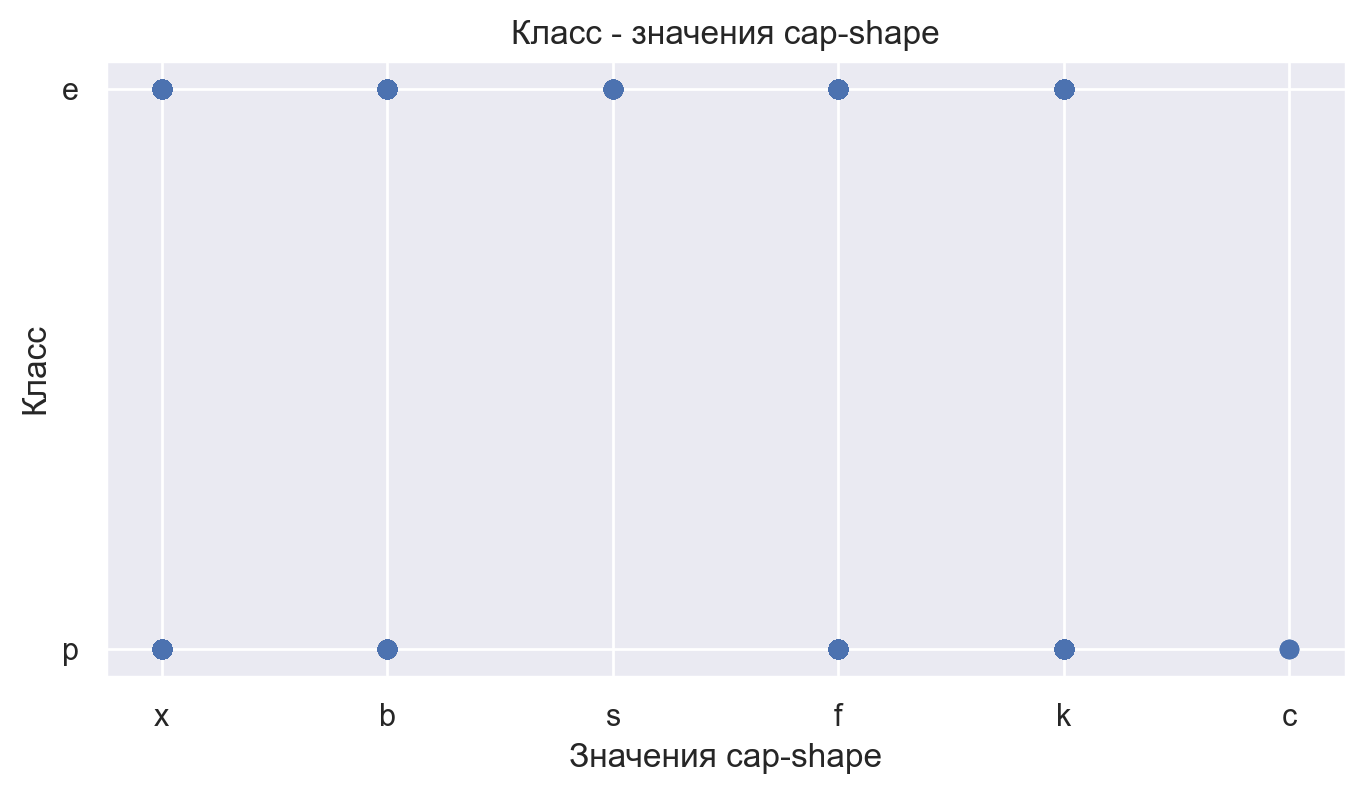

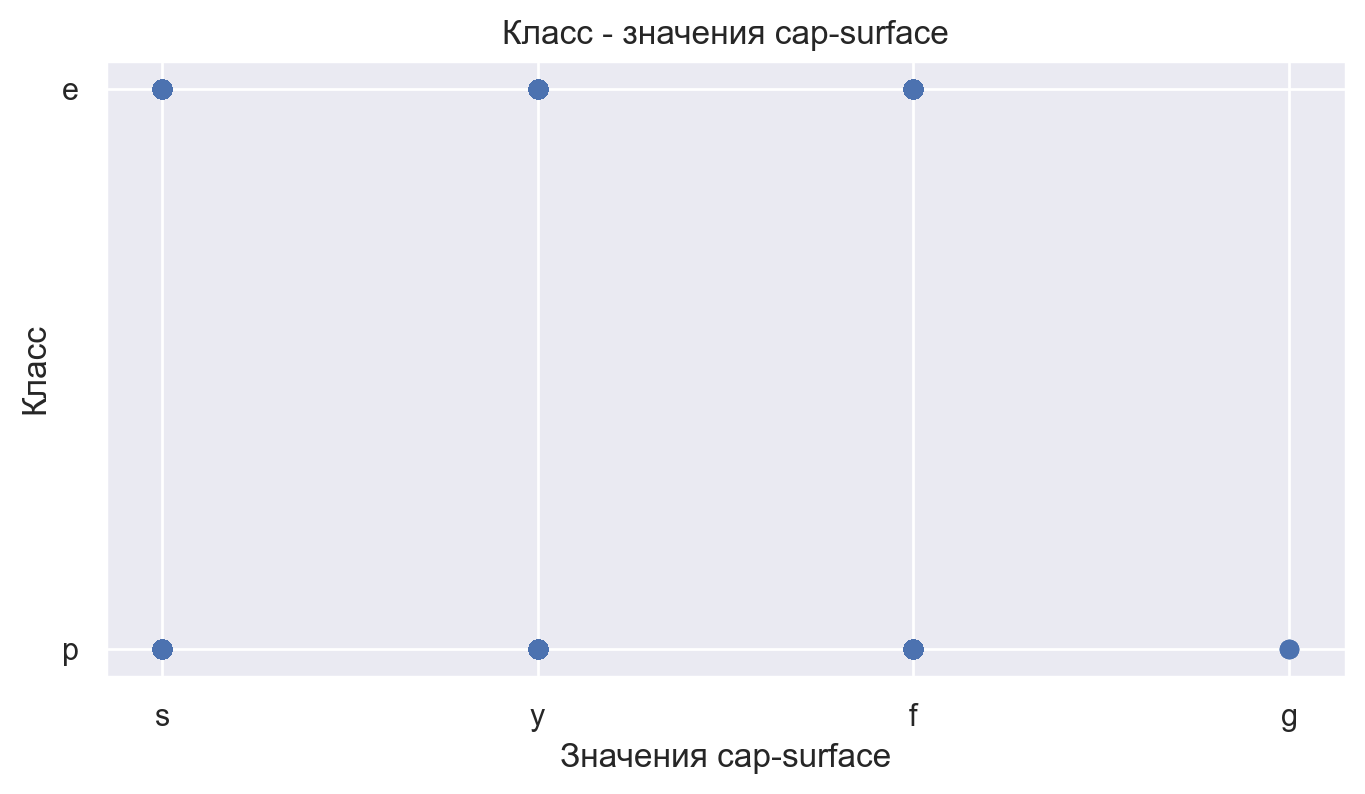

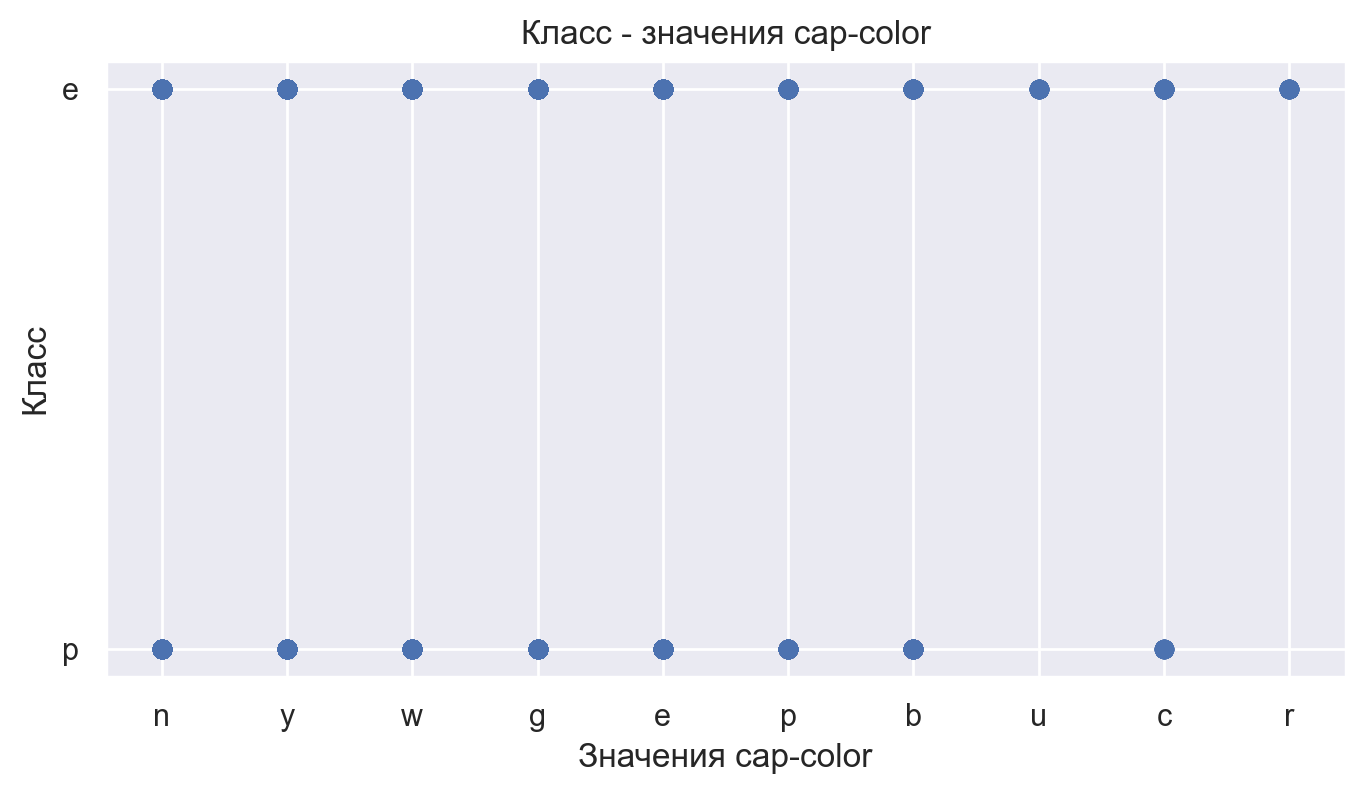

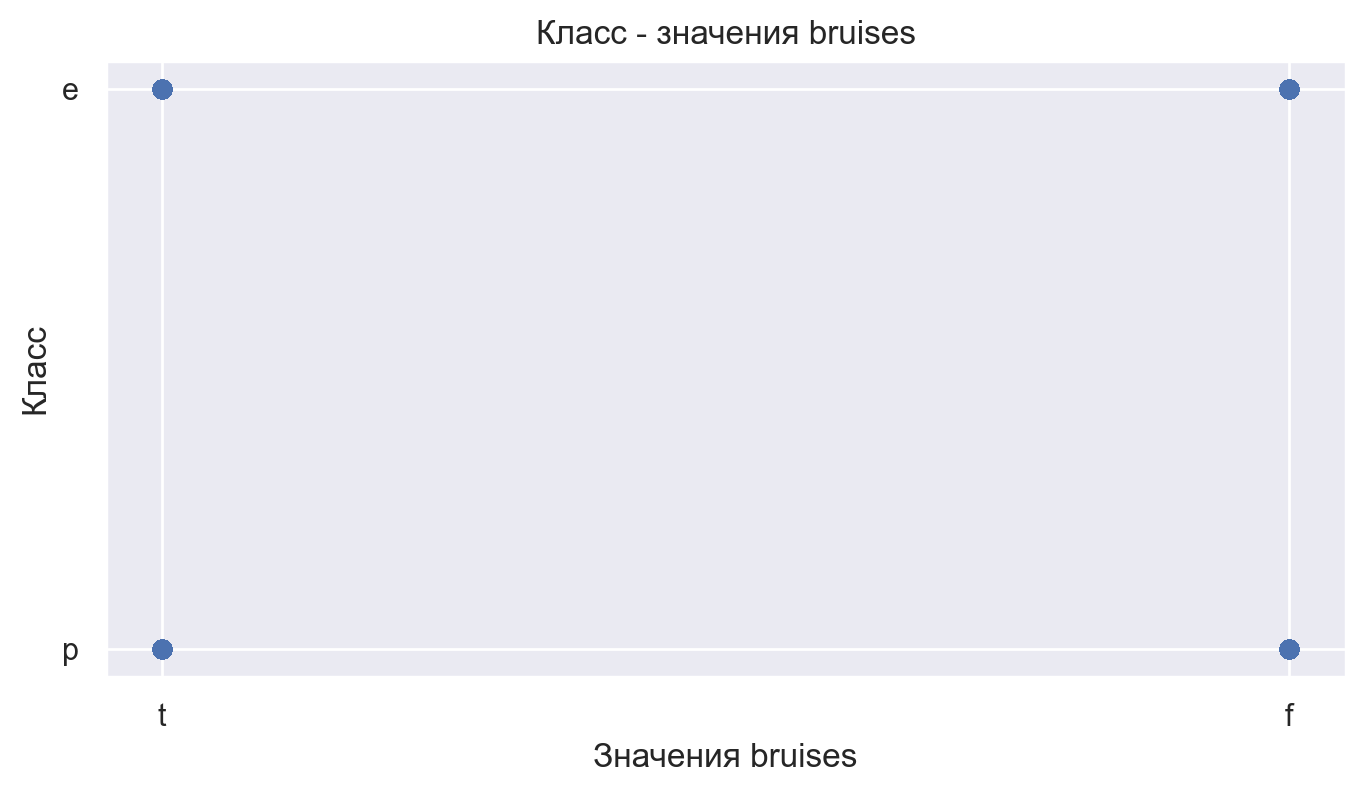

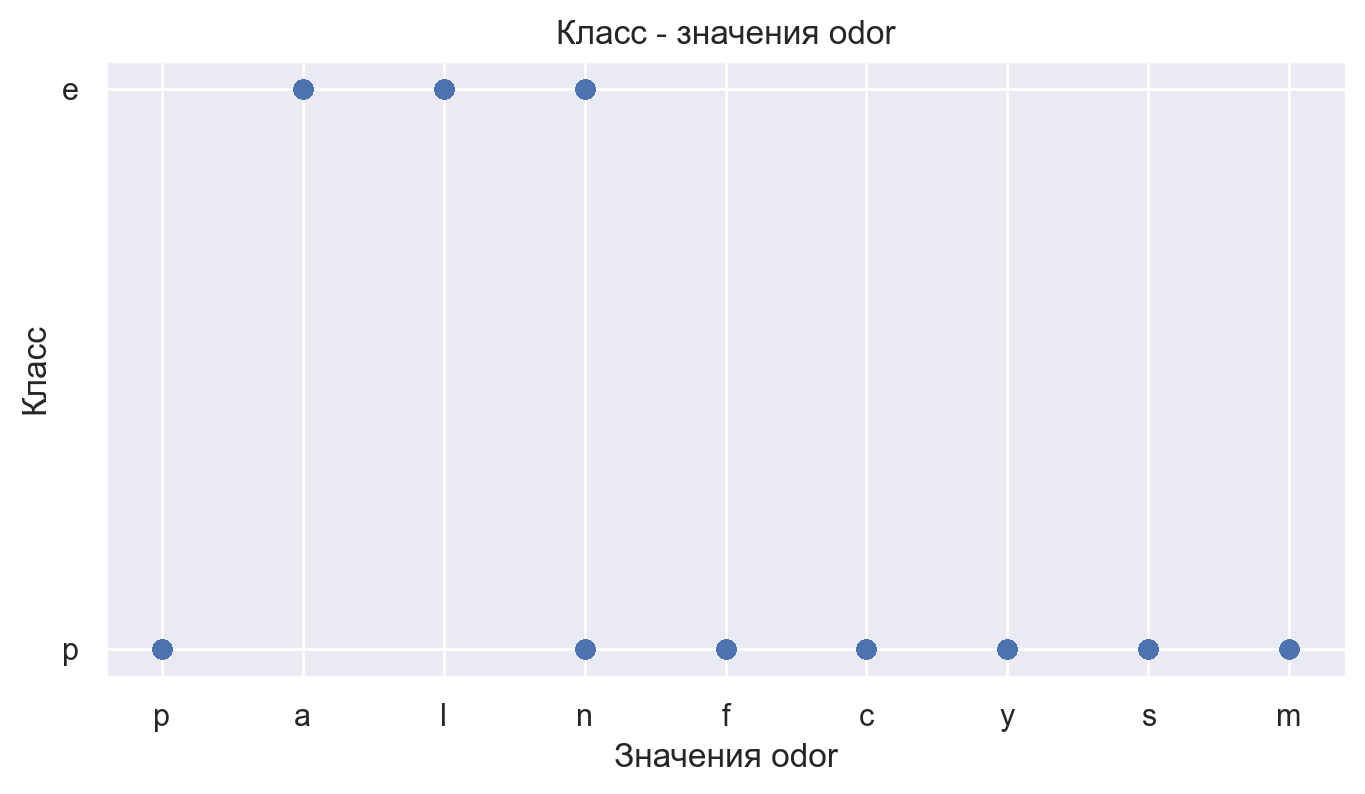

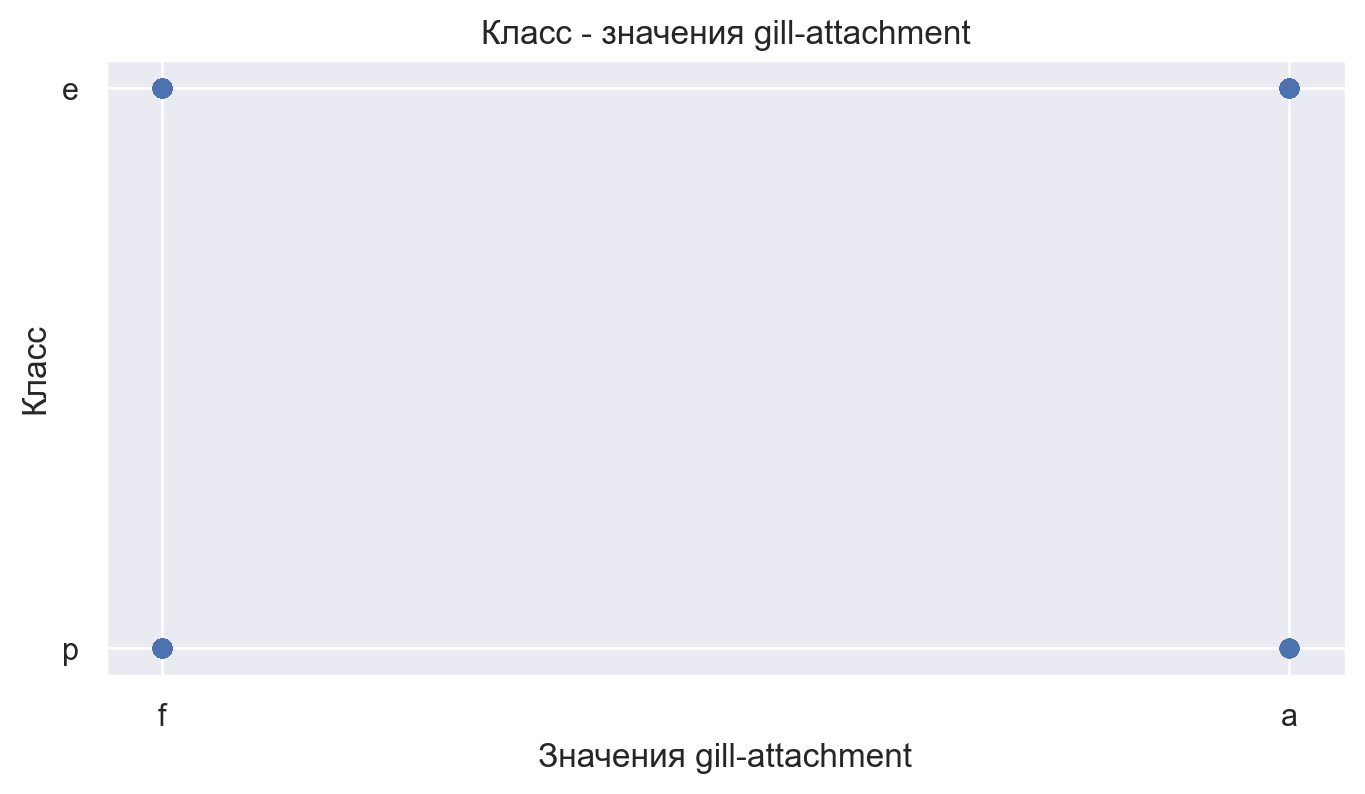

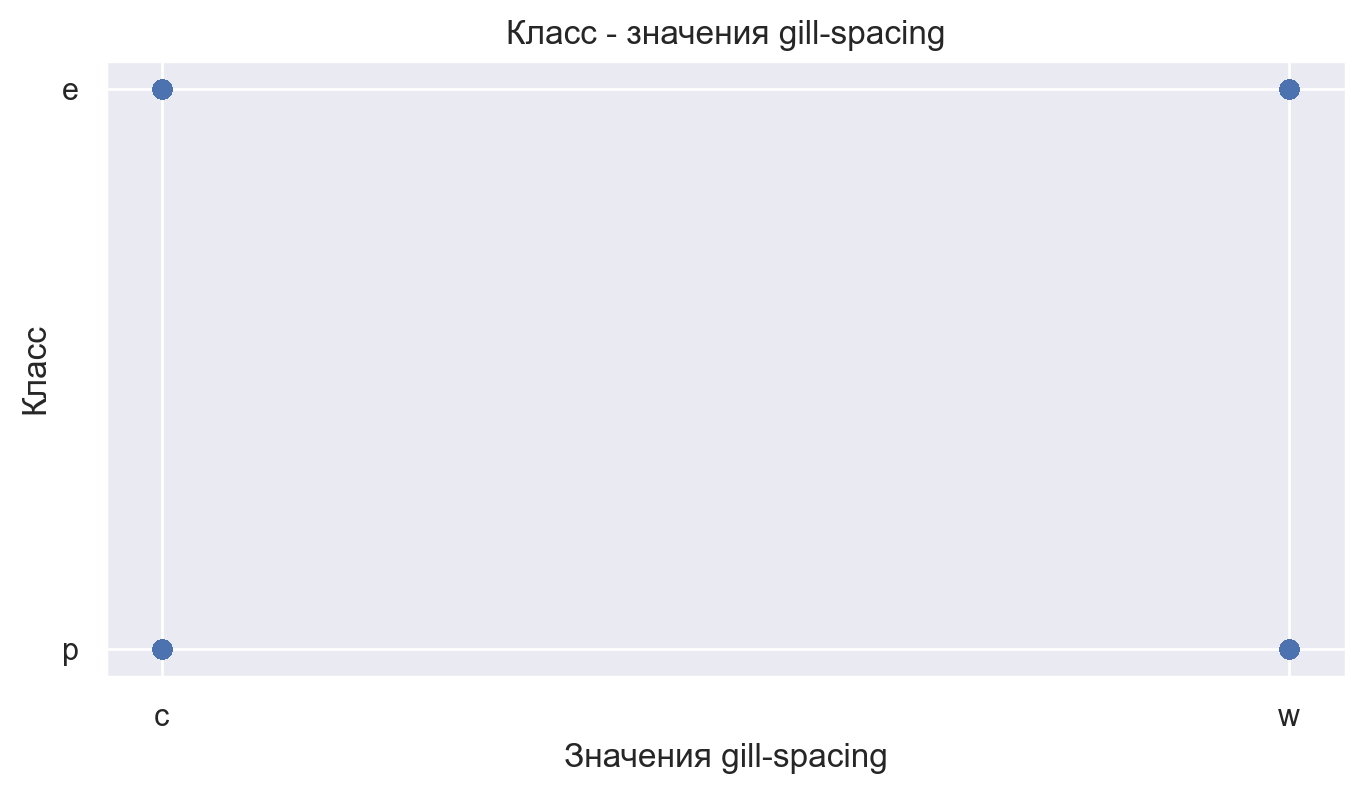

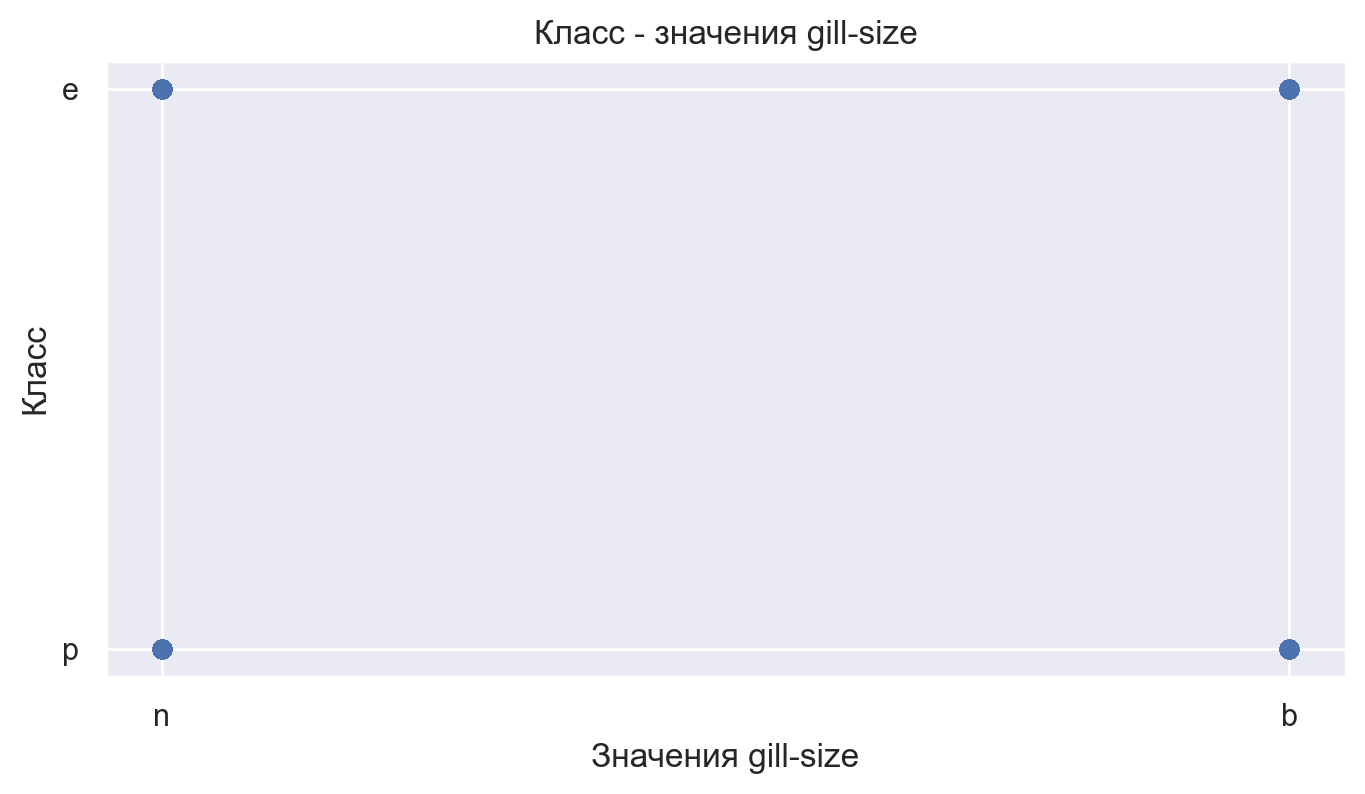

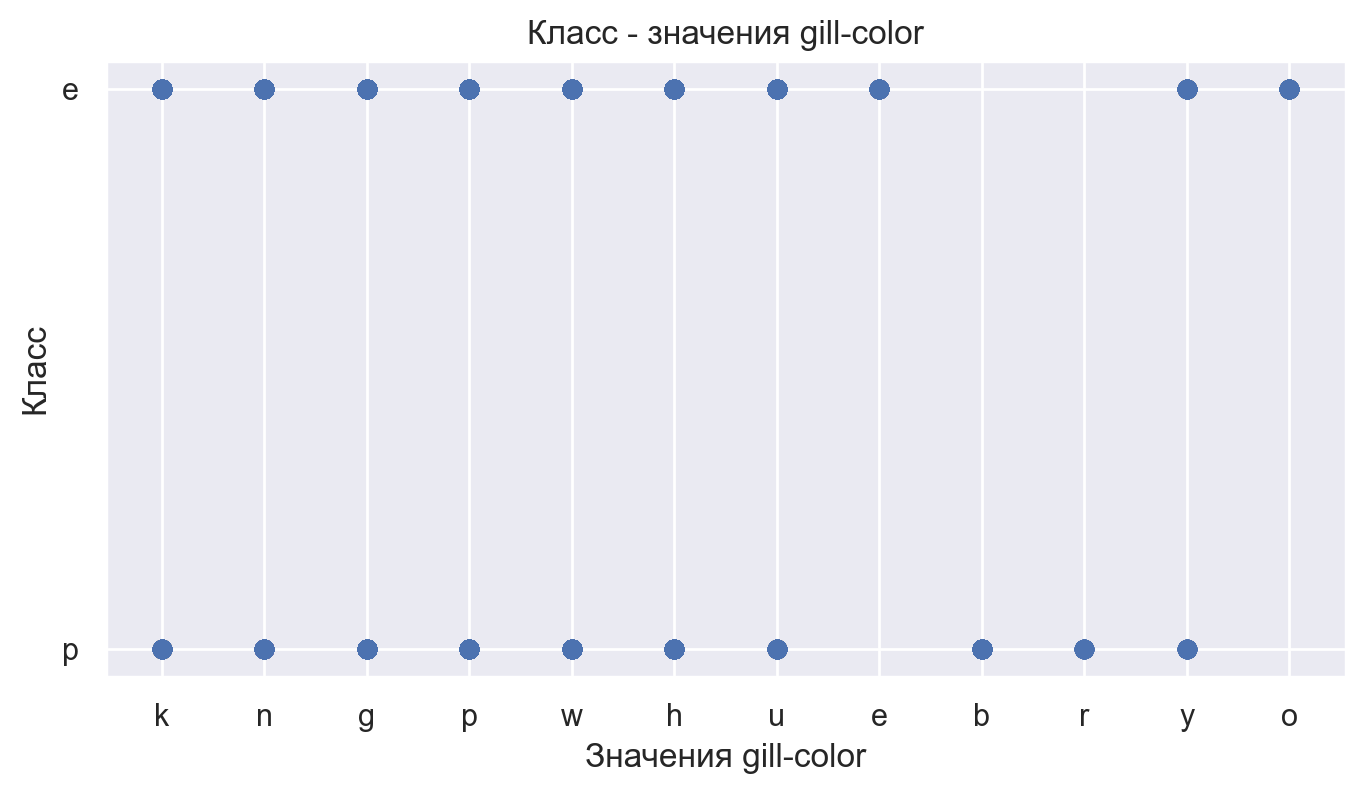

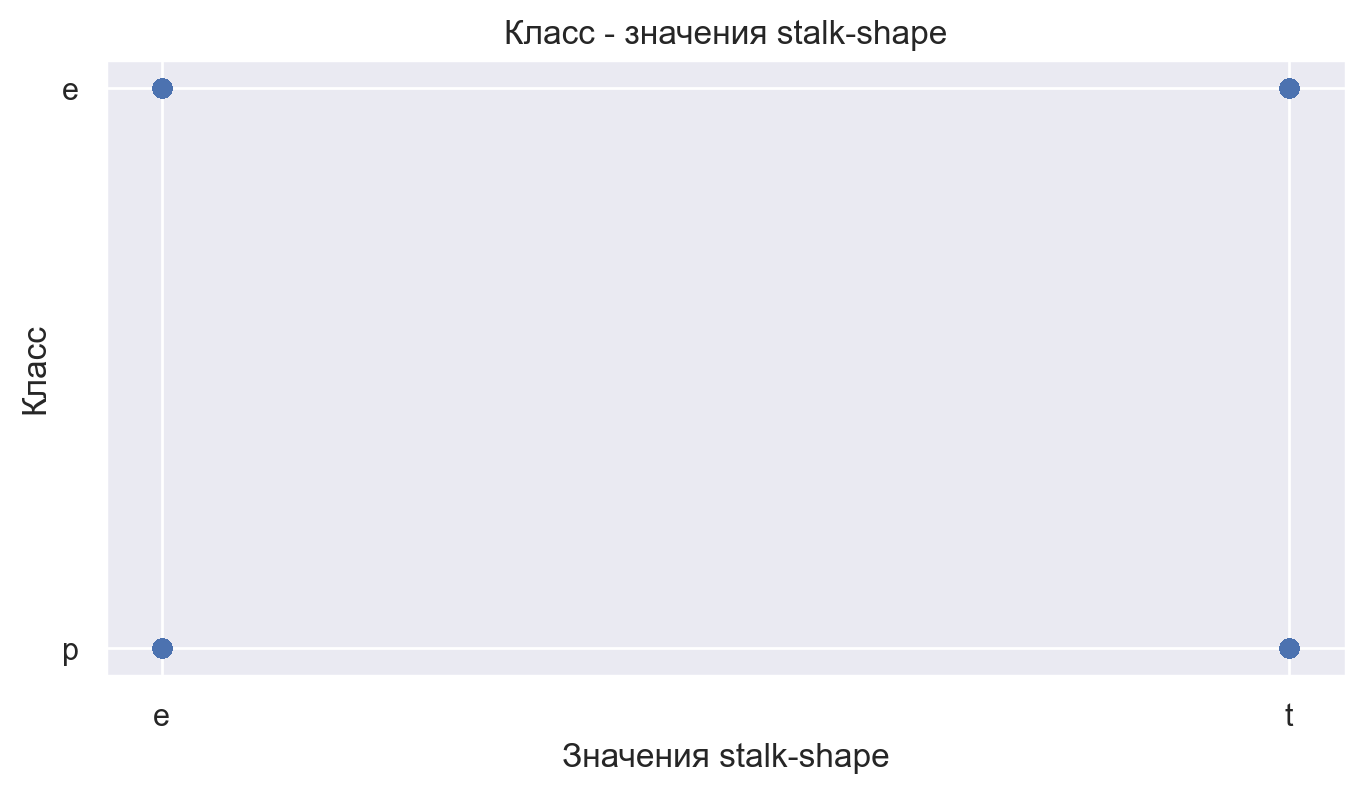

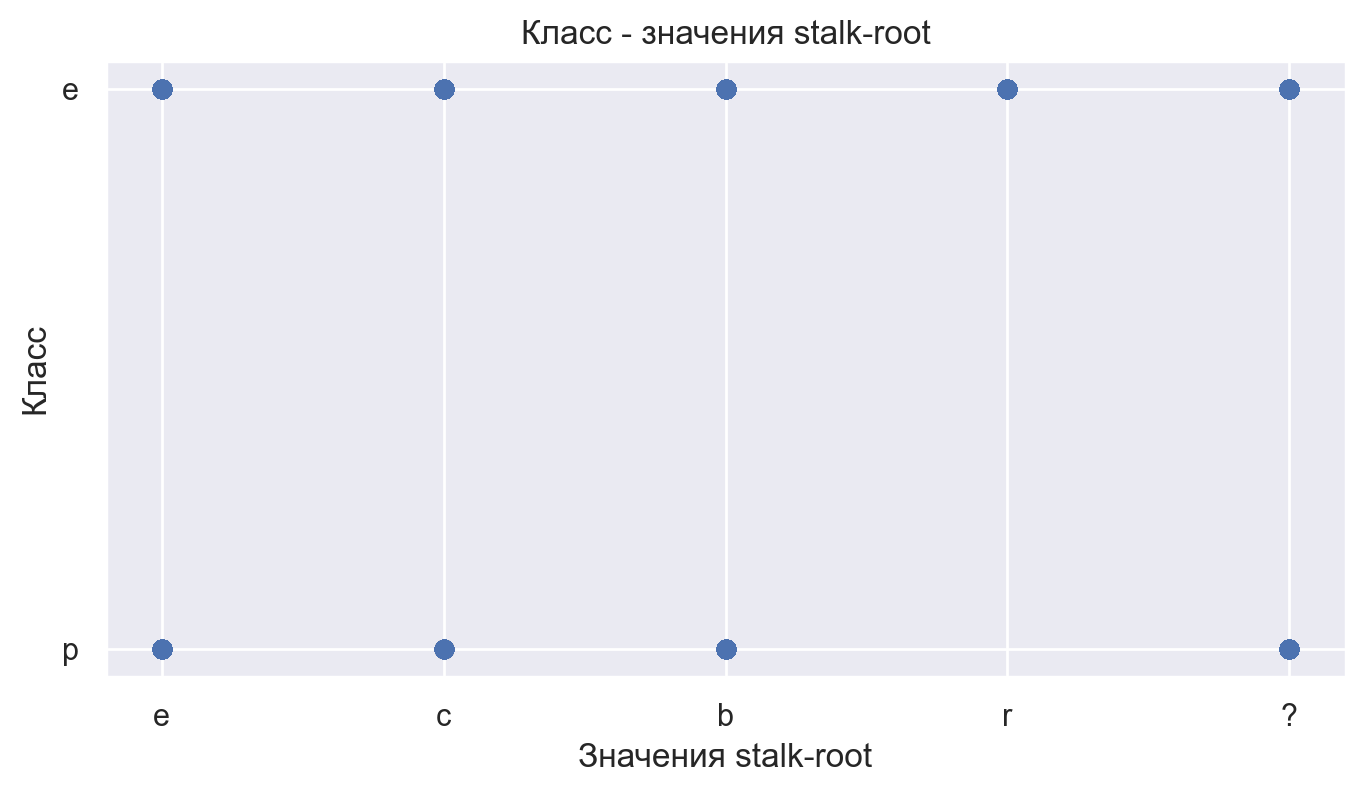

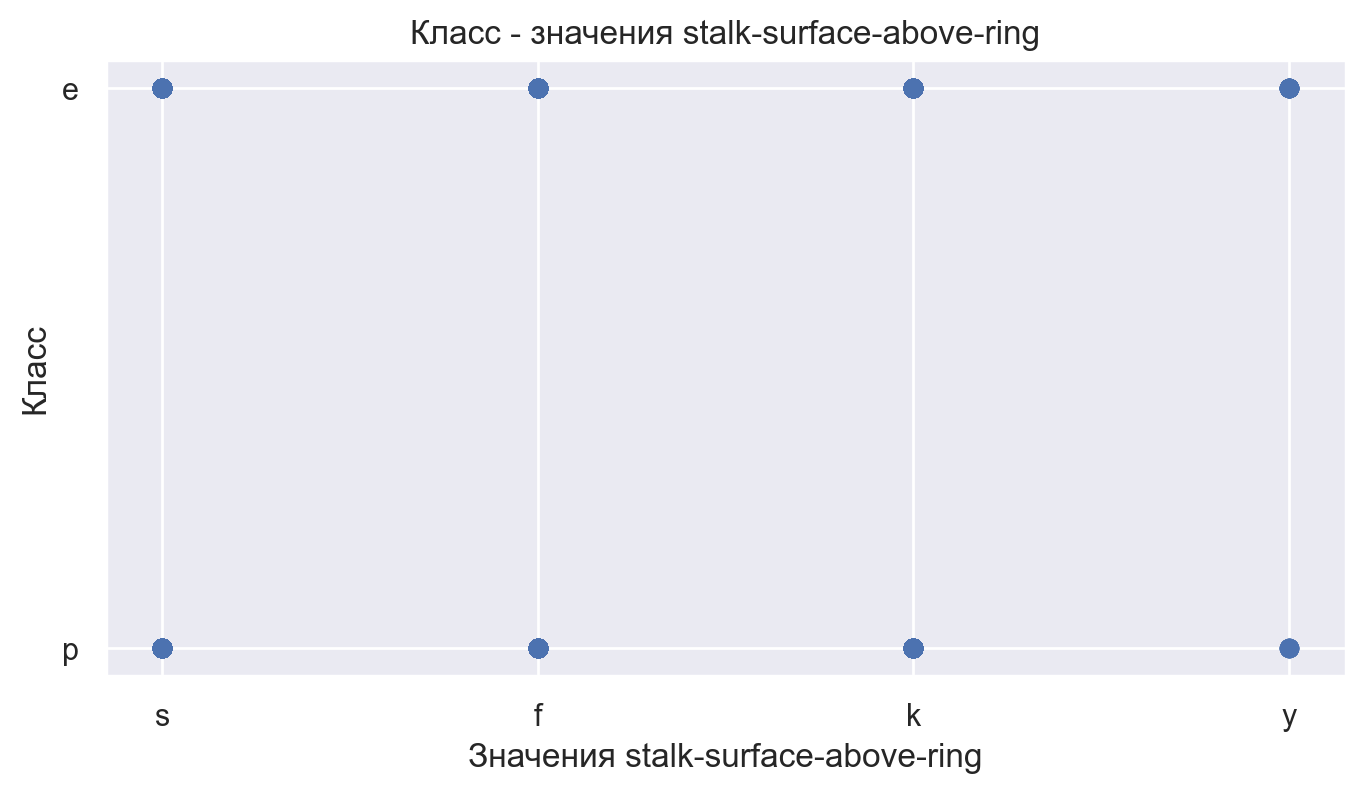

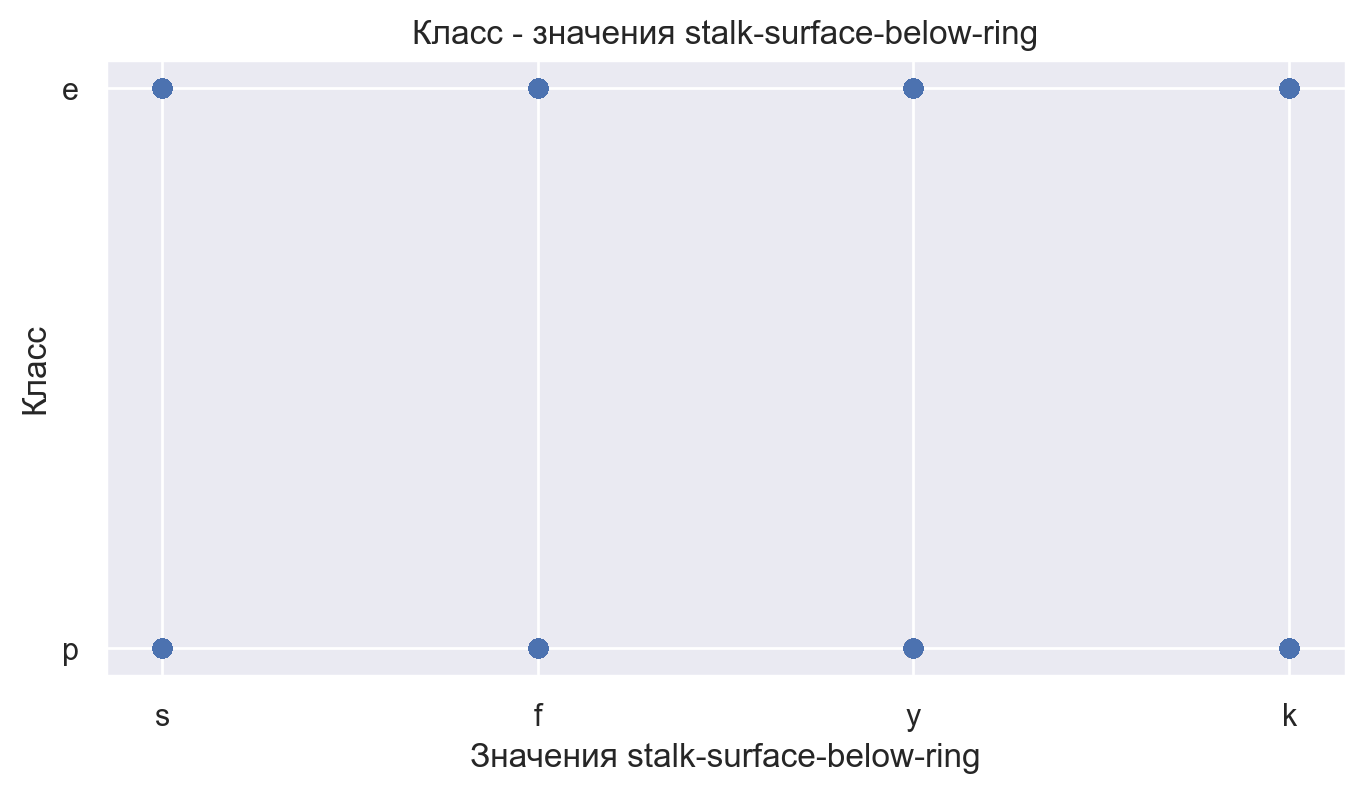

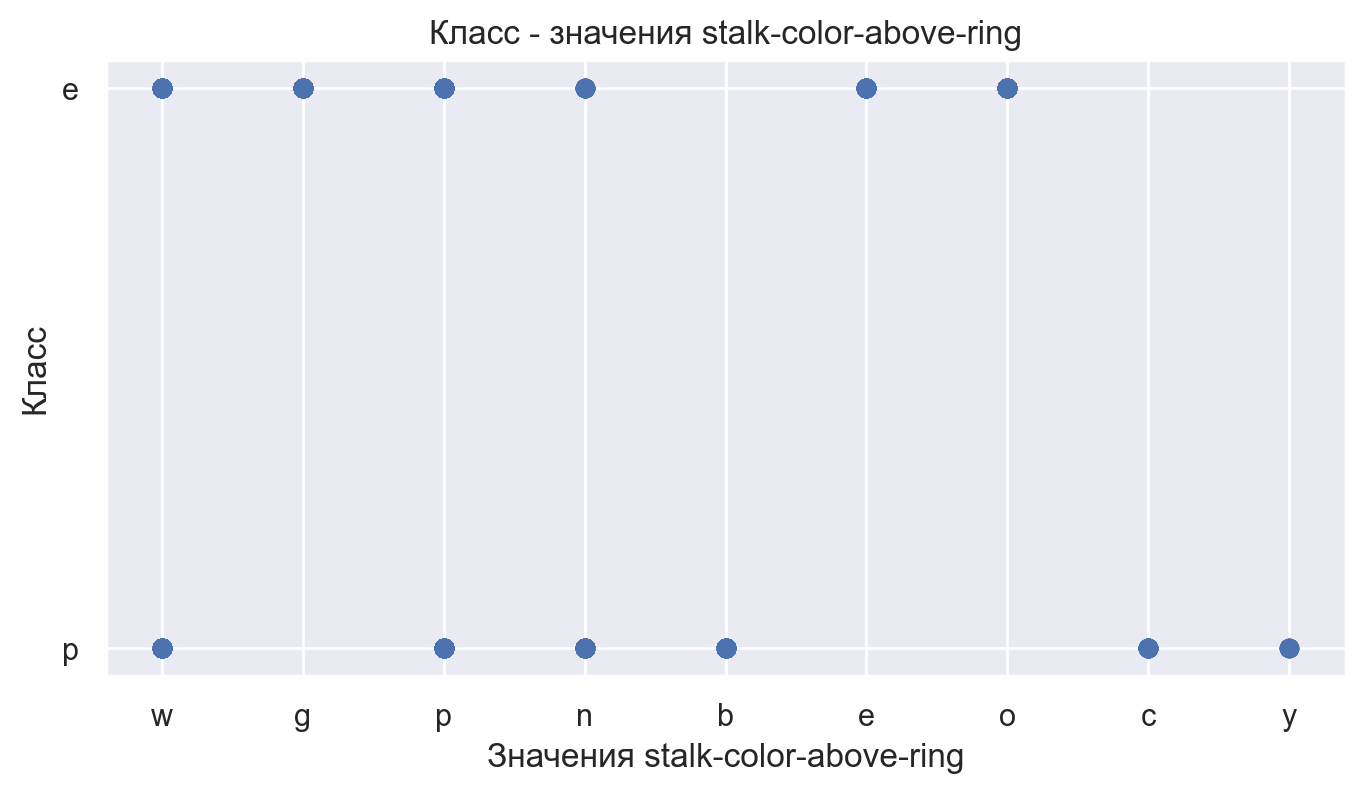

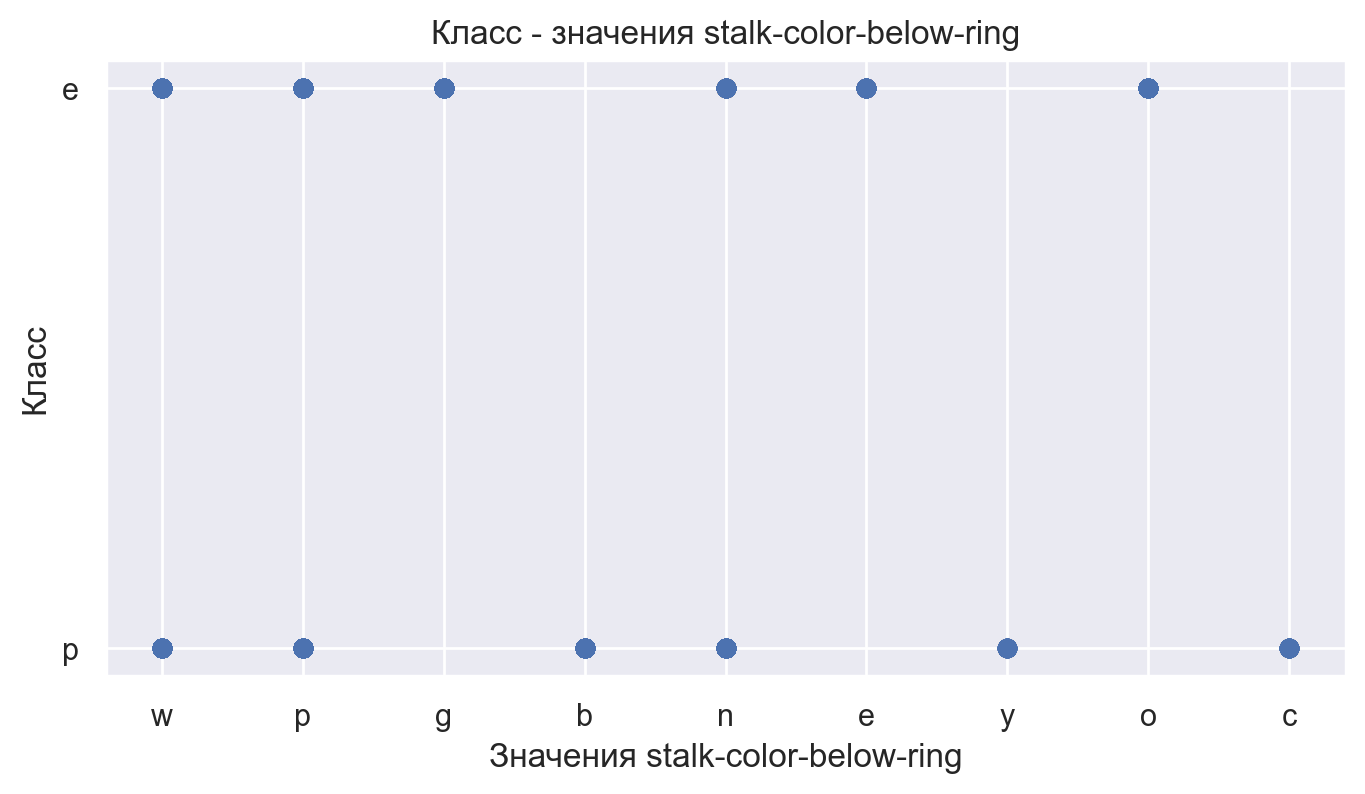

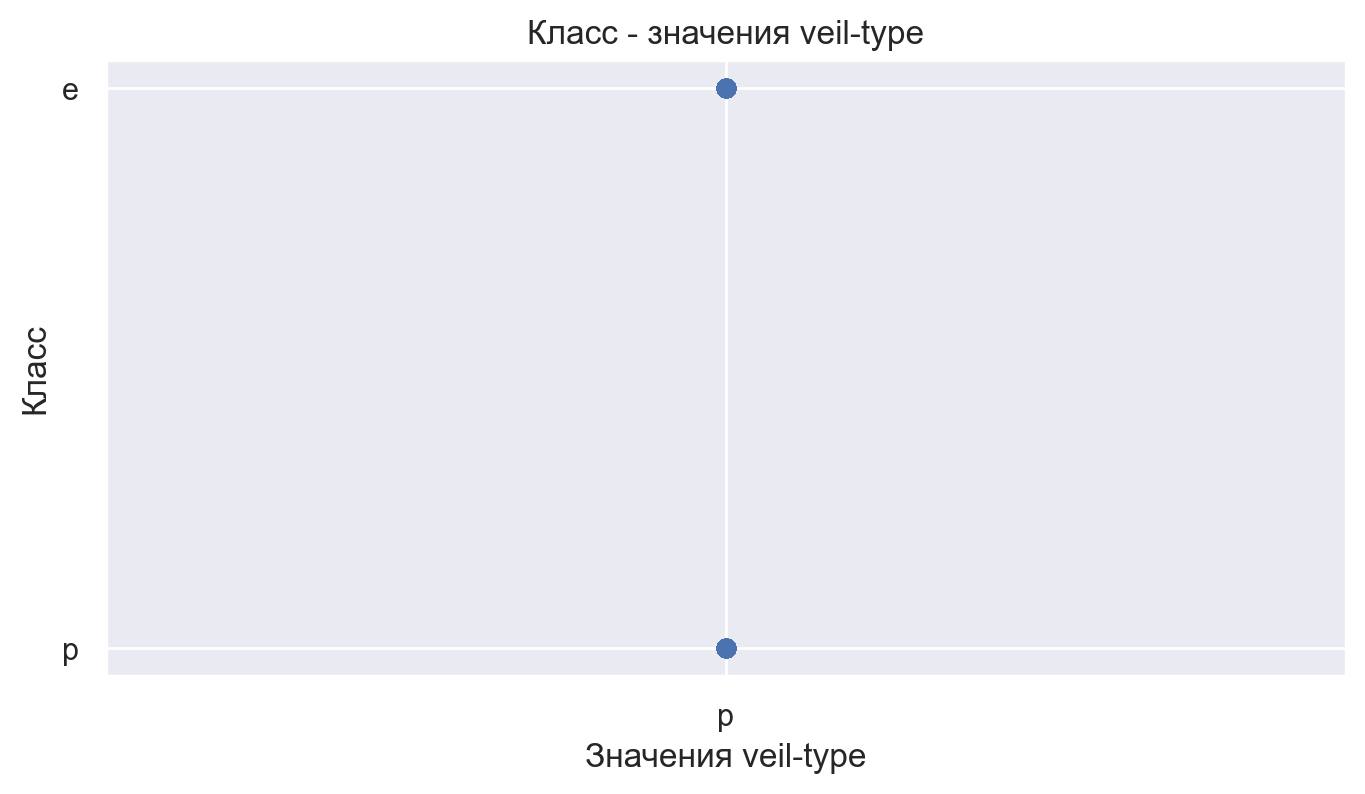

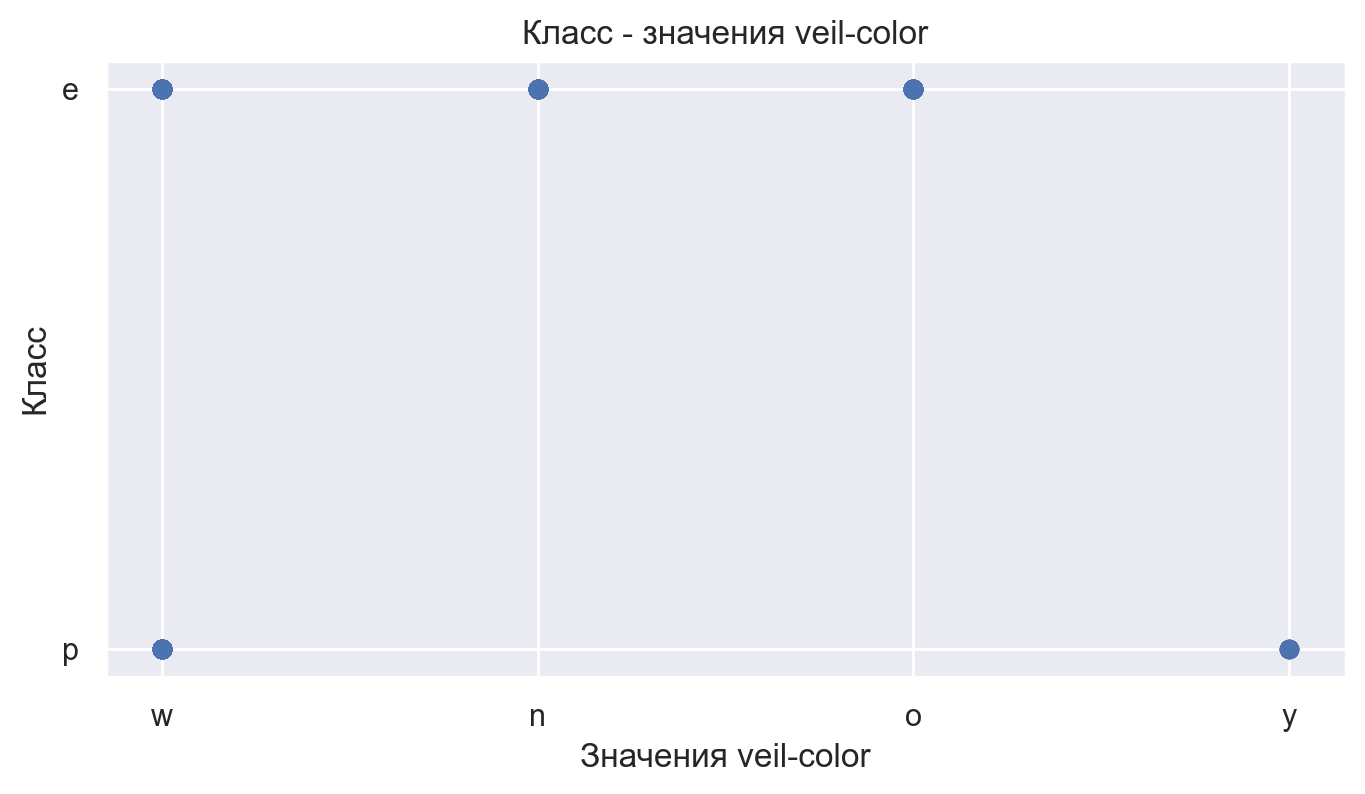

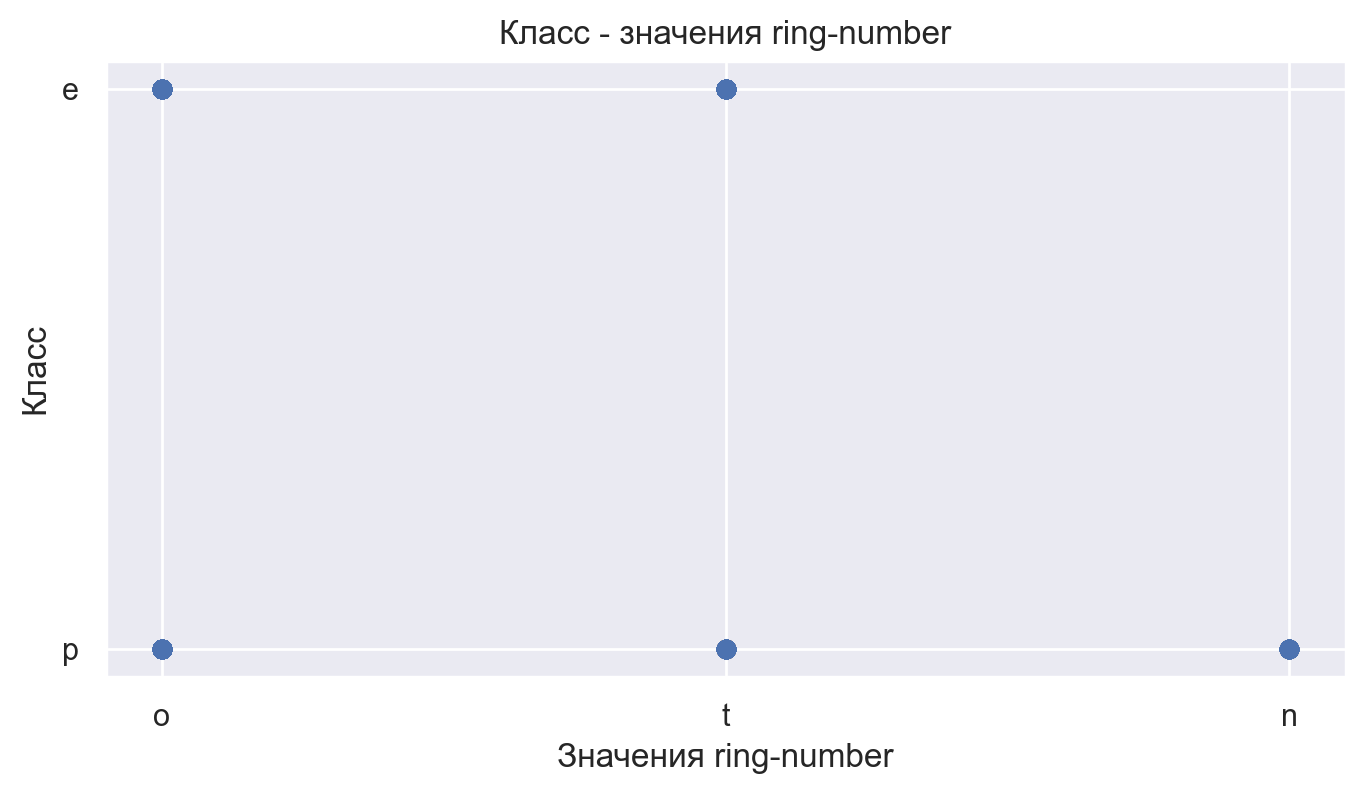

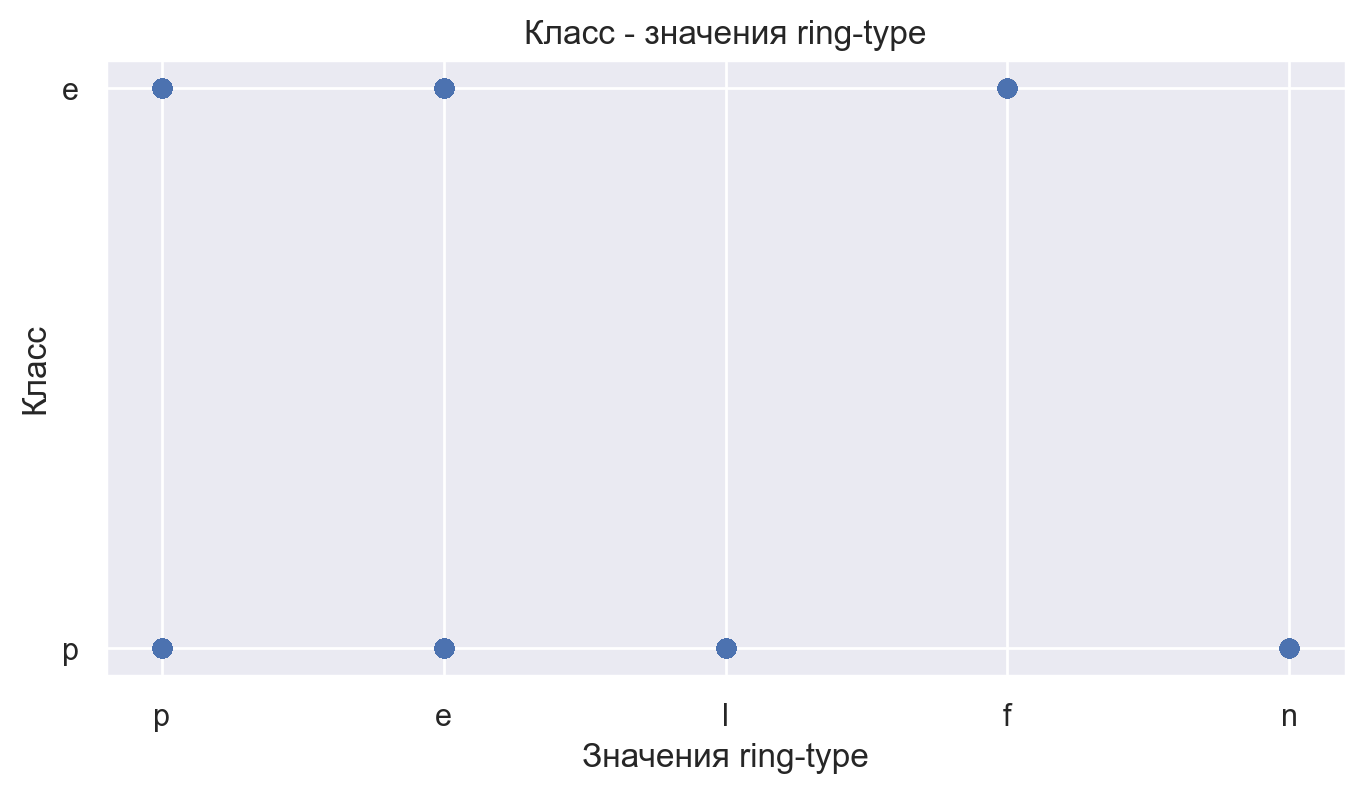

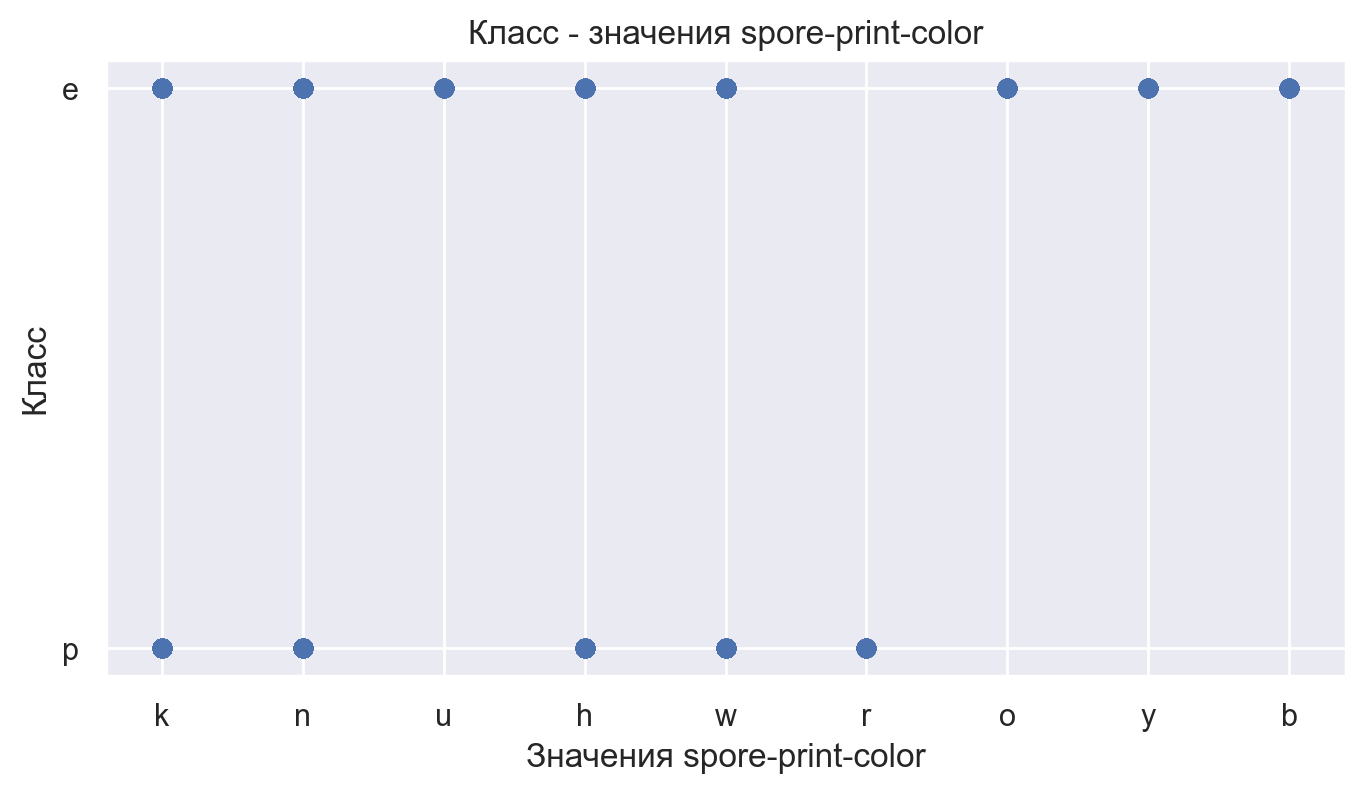

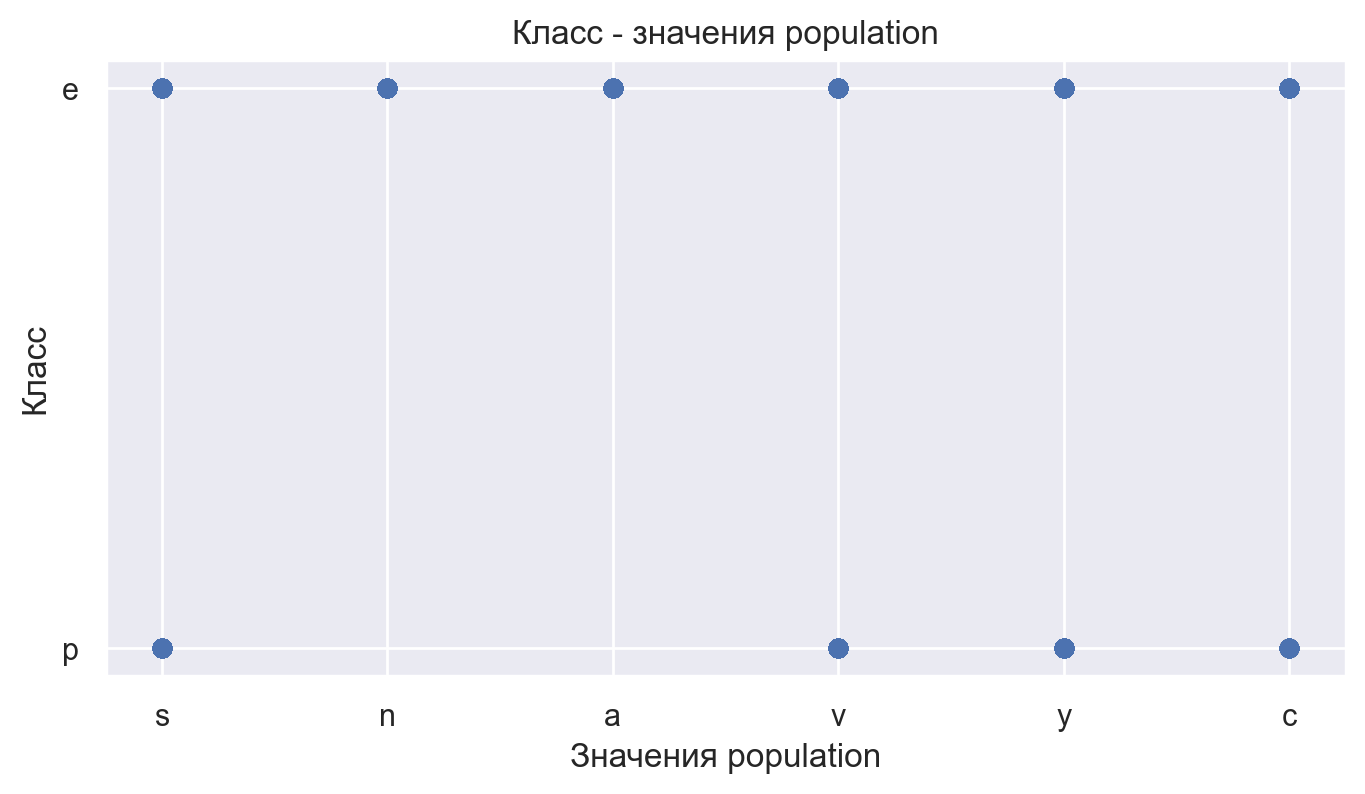

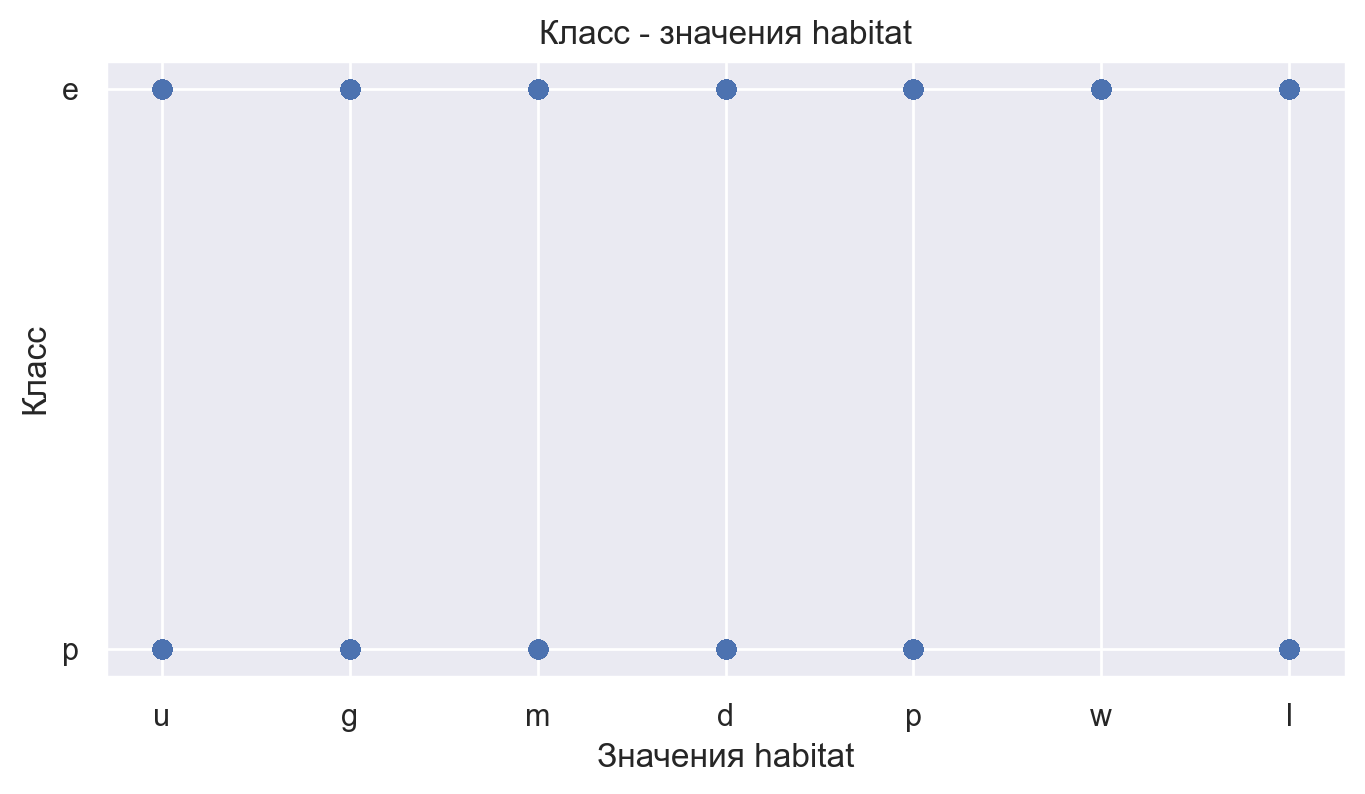

In [107]:
columns = list(df_mushrooms.columns)
columns.remove('class')
for column in columns:
    fig = plt.figure(figsize=(8,4))
    plt.scatter(df_mushrooms[column], df_mushrooms['class'])
    
    plt.title(f'Класс - значения {column}')
    plt.xlabel(f'Значения {column}')
    plt.ylabel('Класс')
    plt.show()

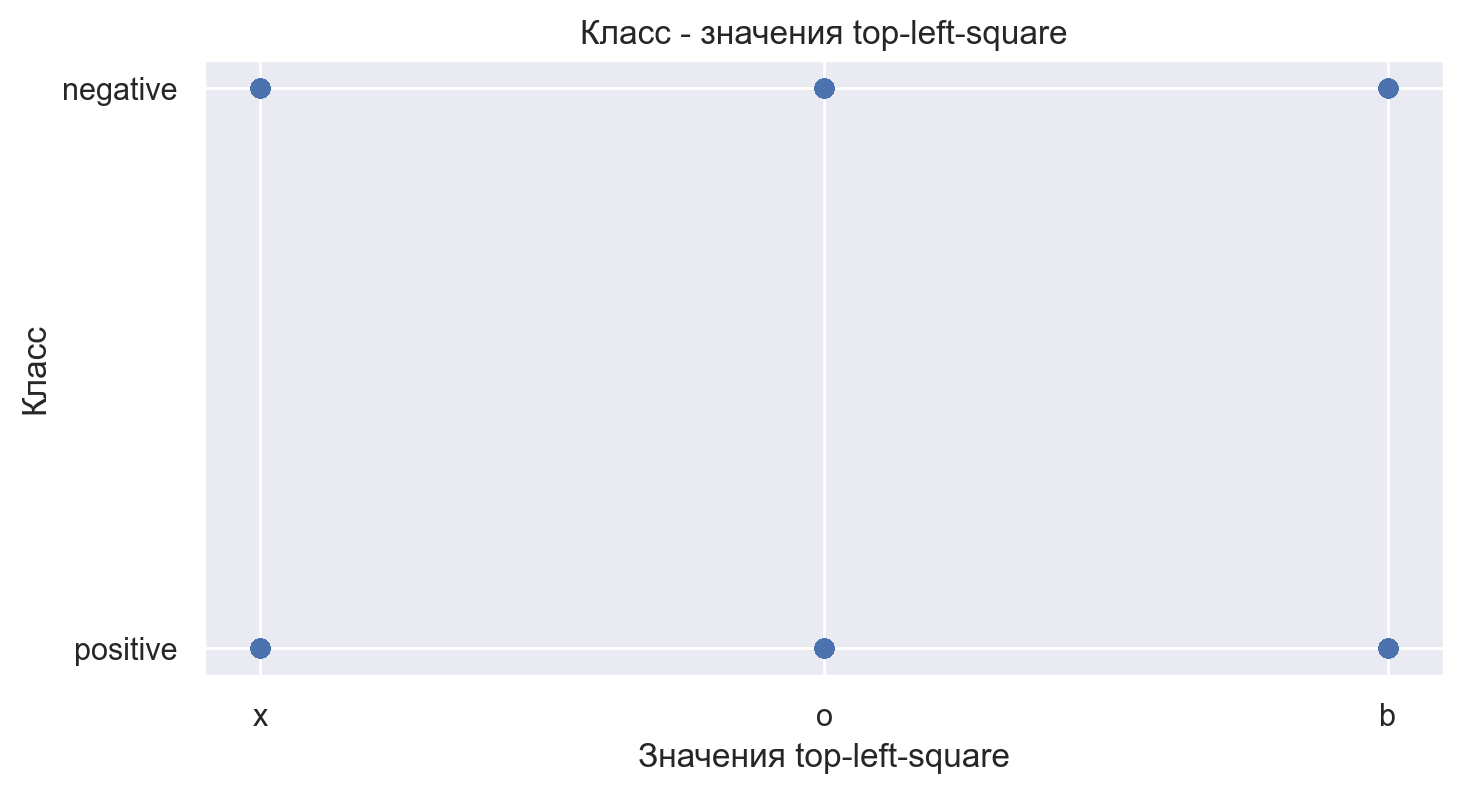

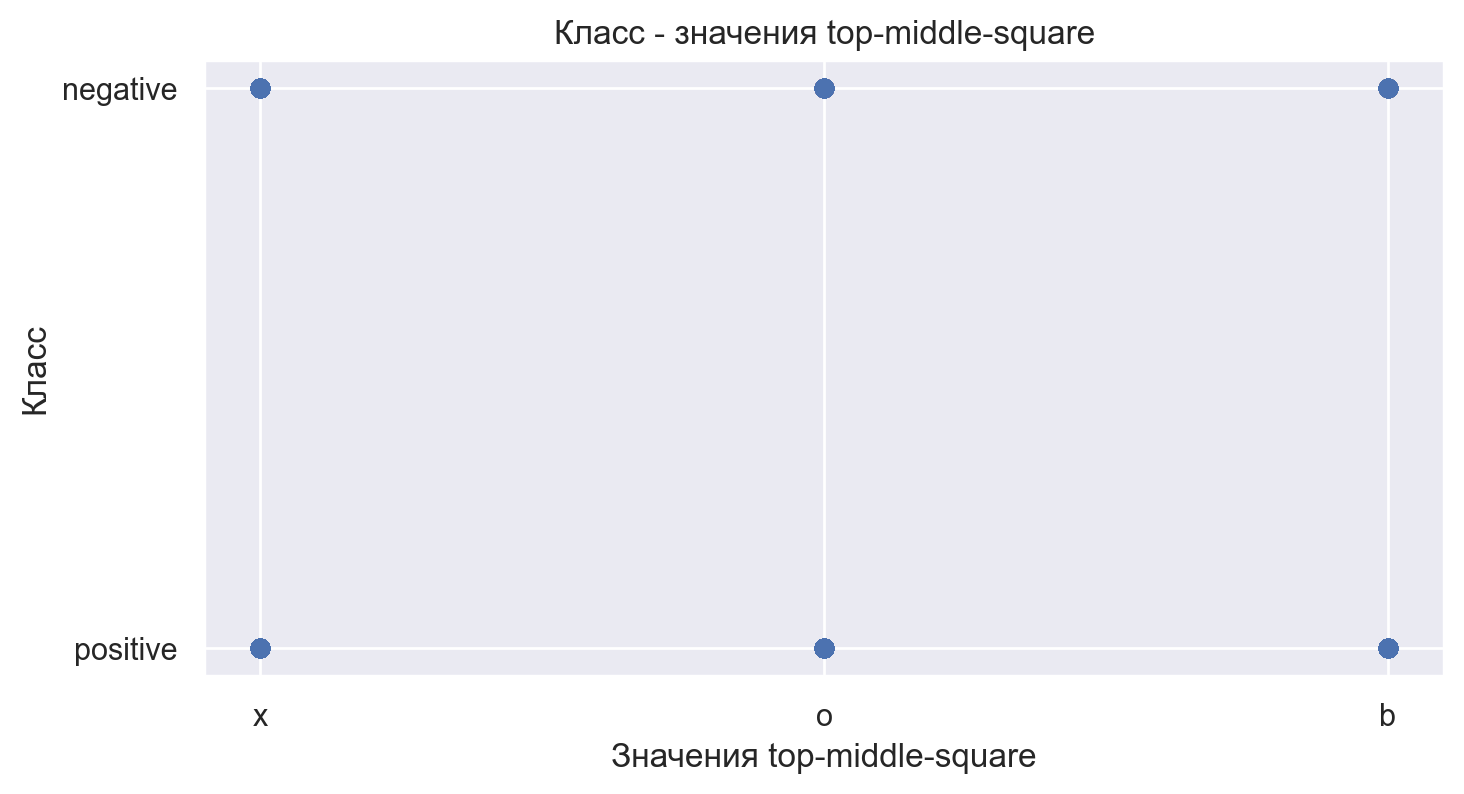

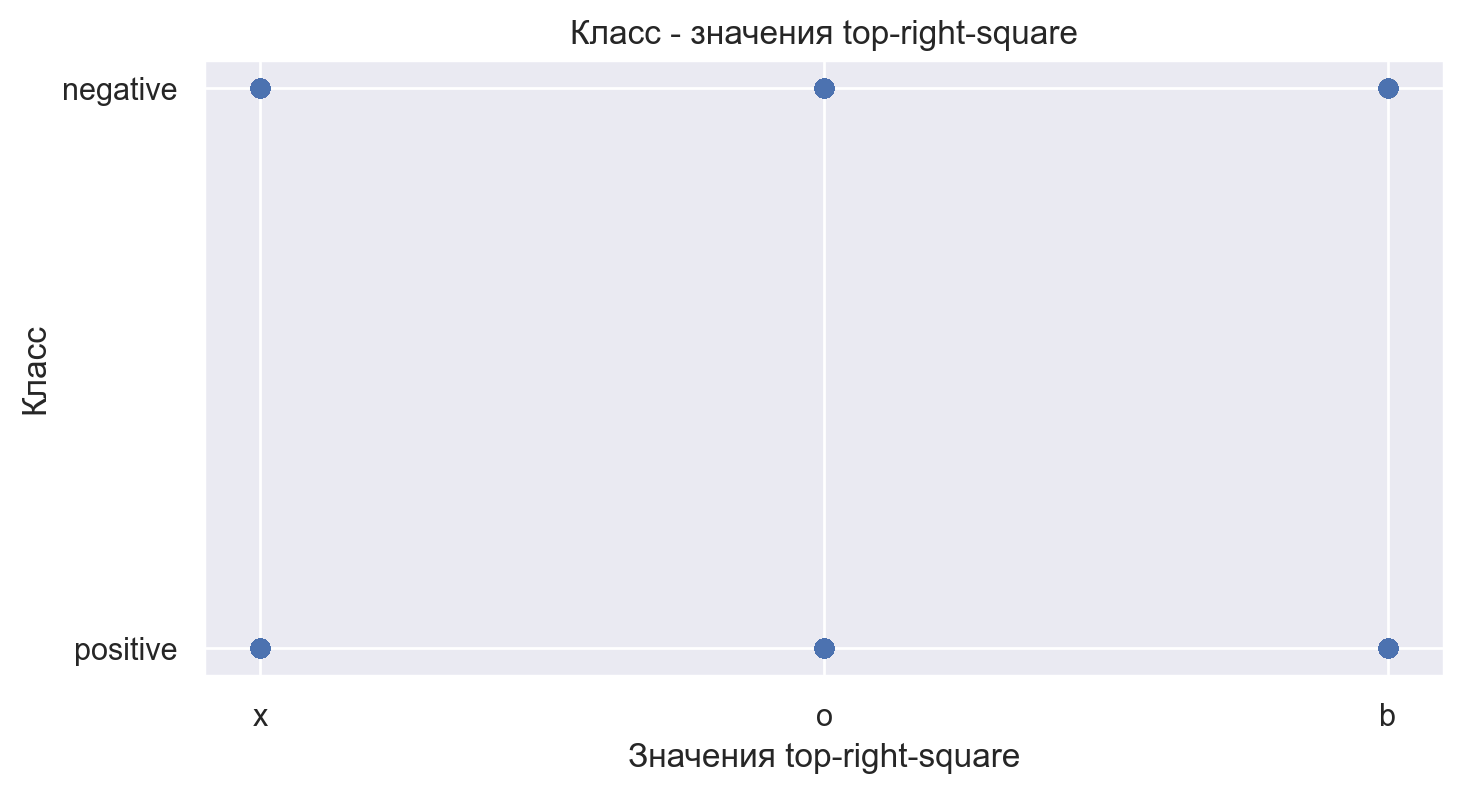

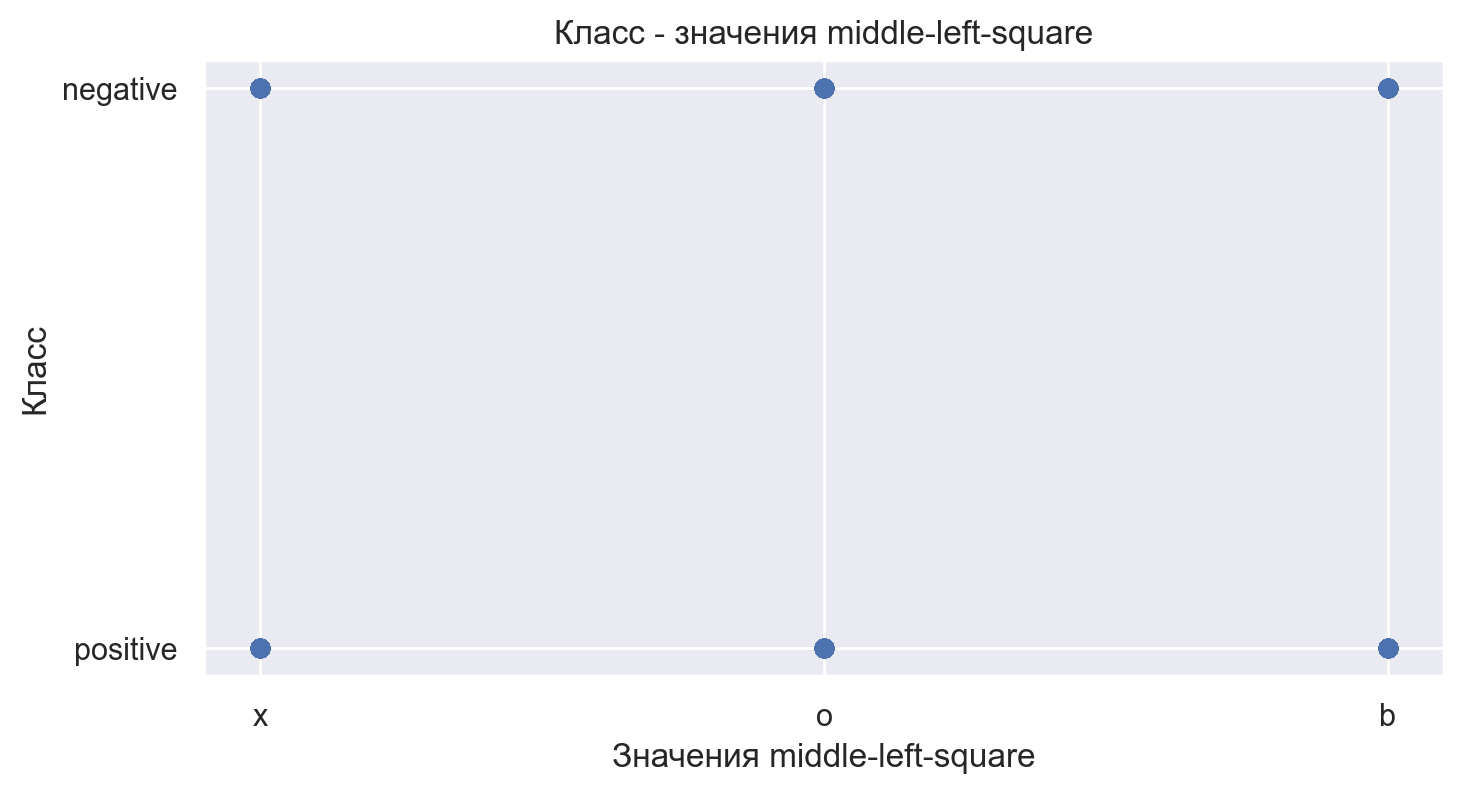

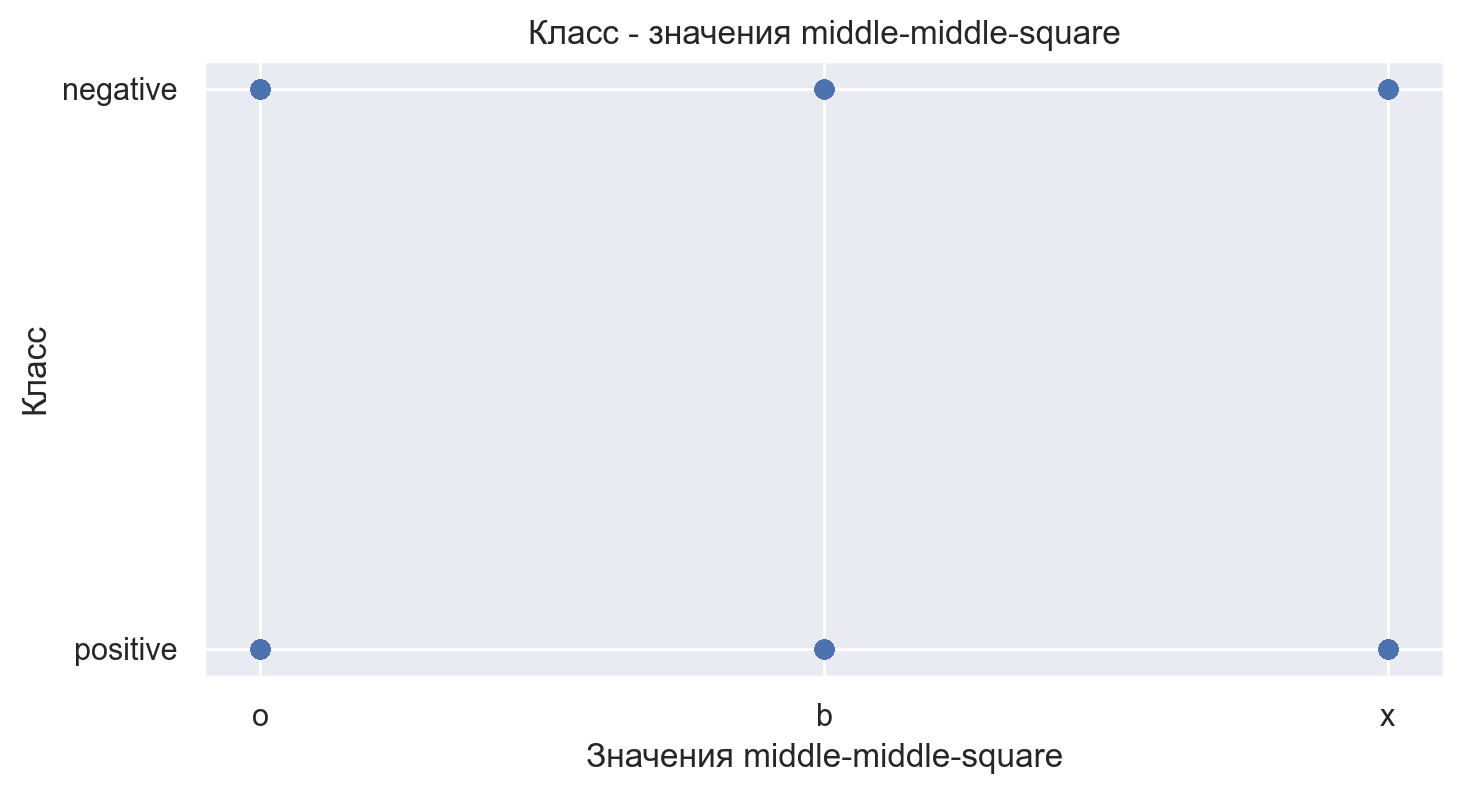

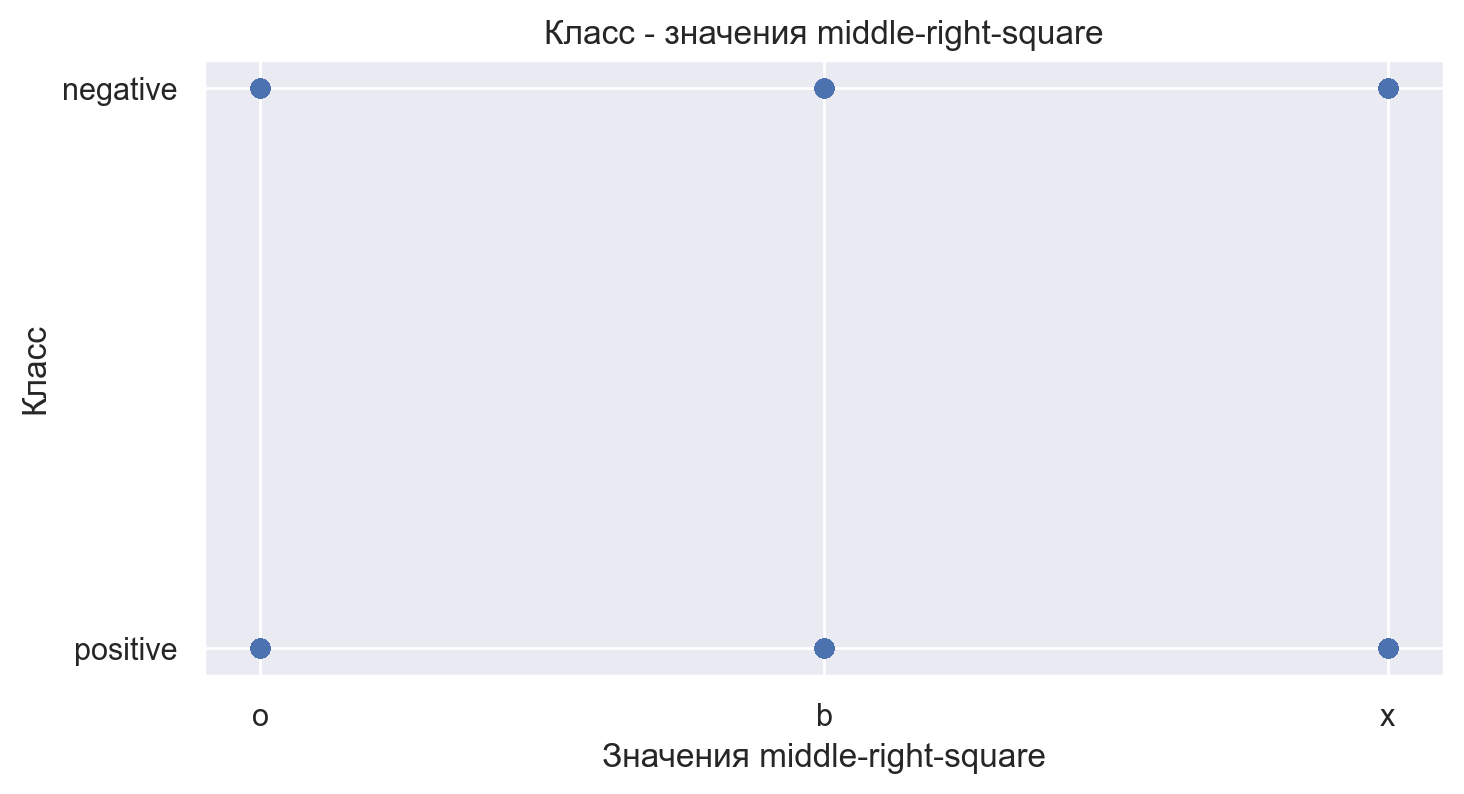

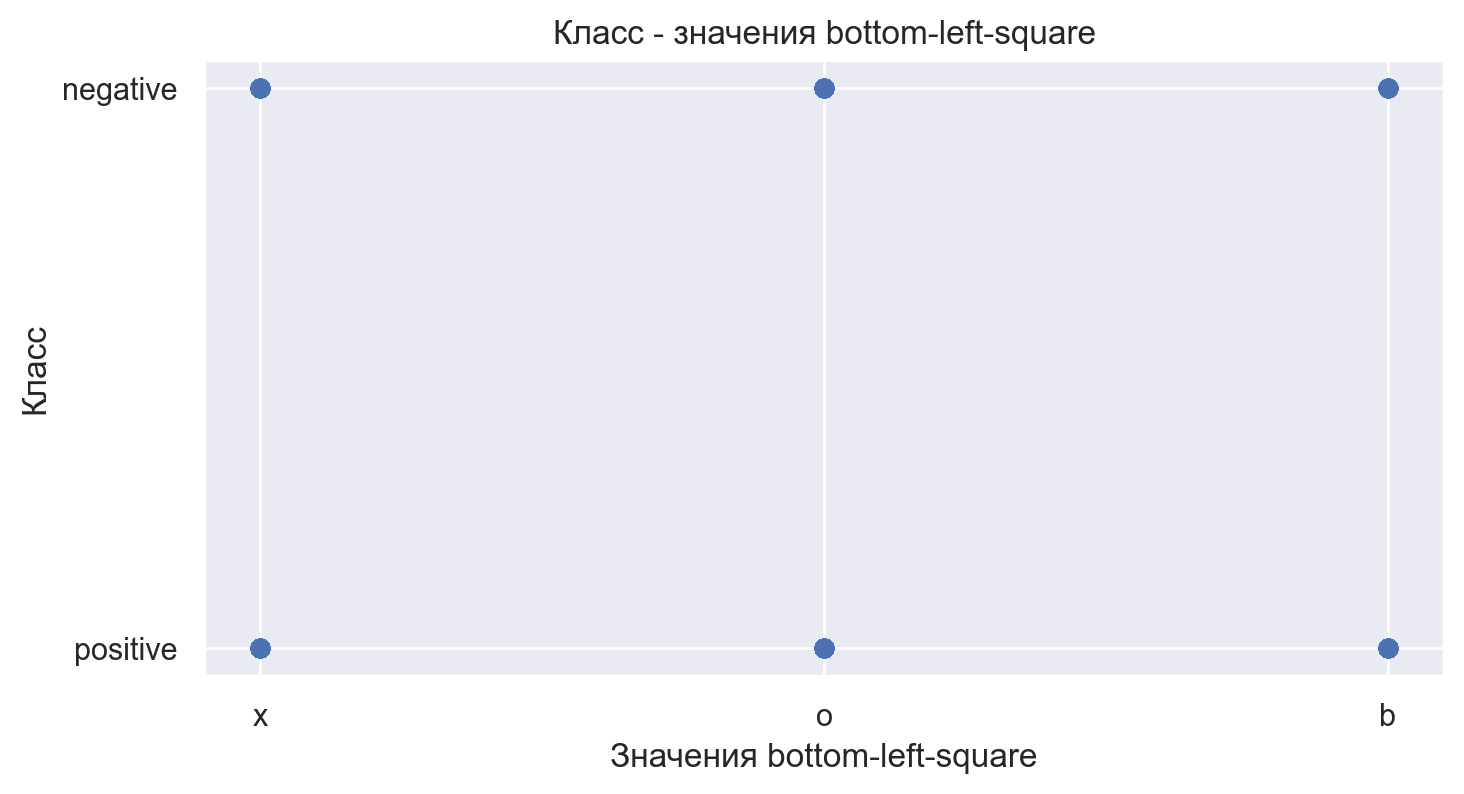

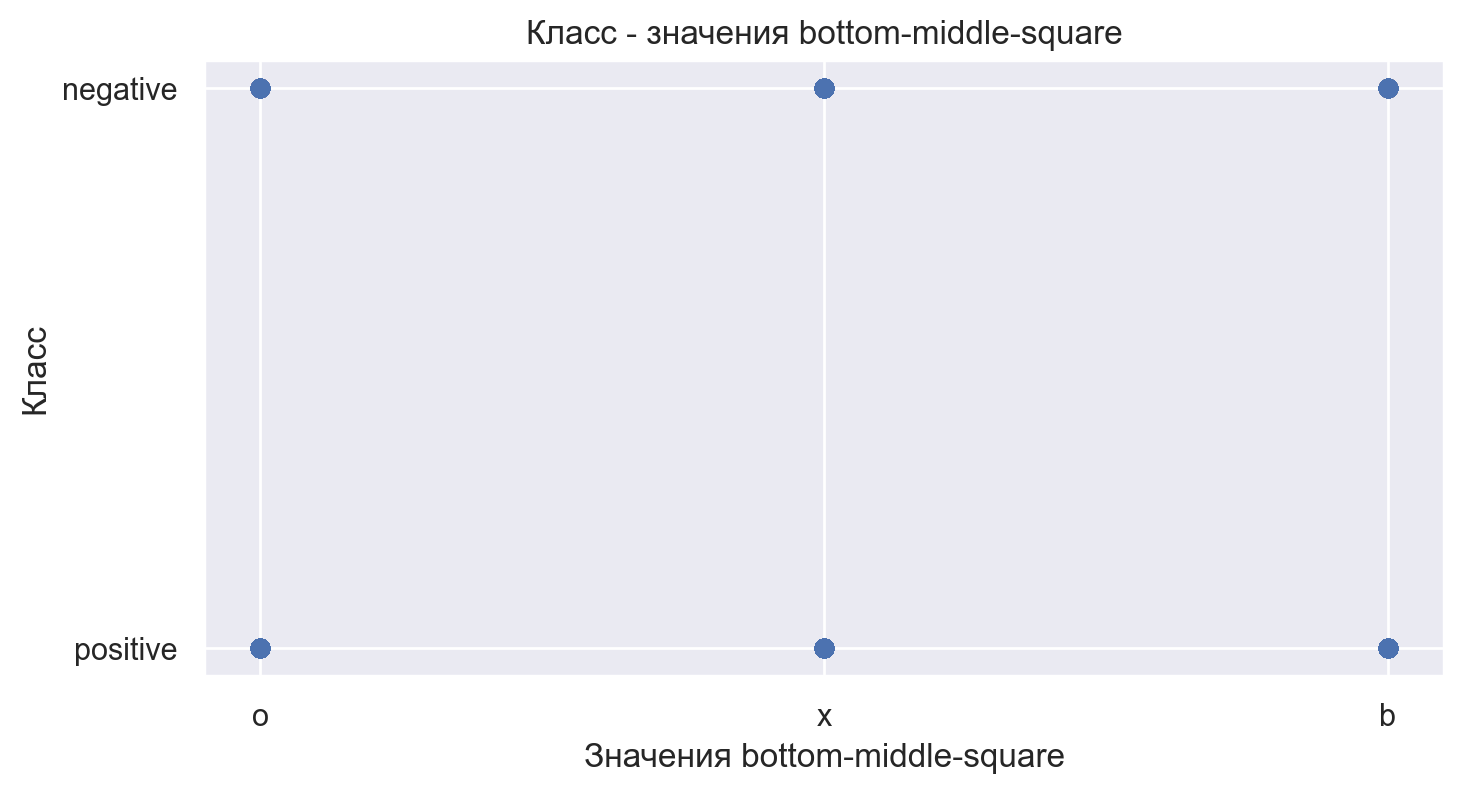

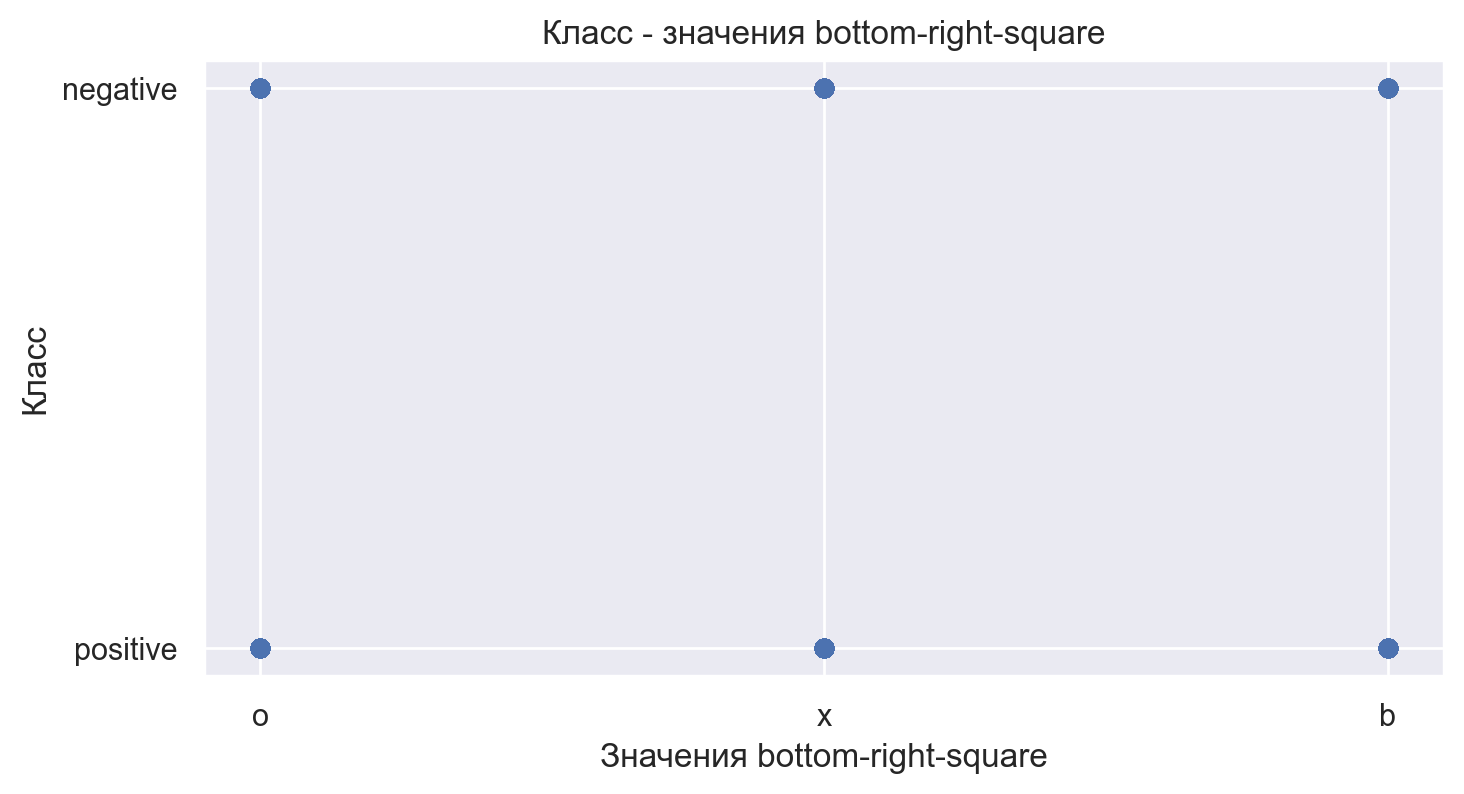

In [108]:
columns = list(df_tic_tac_toe.columns)
columns.remove('class')
for column in columns:
    fig = plt.figure(figsize=(8,4))
    plt.scatter(df_tic_tac_toe[column], df_tic_tac_toe['class'])
    
    plt.title(f'Класс - значения {column}')
    plt.xlabel(f'Значения {column}')
    plt.ylabel('Класс')
    plt.show()

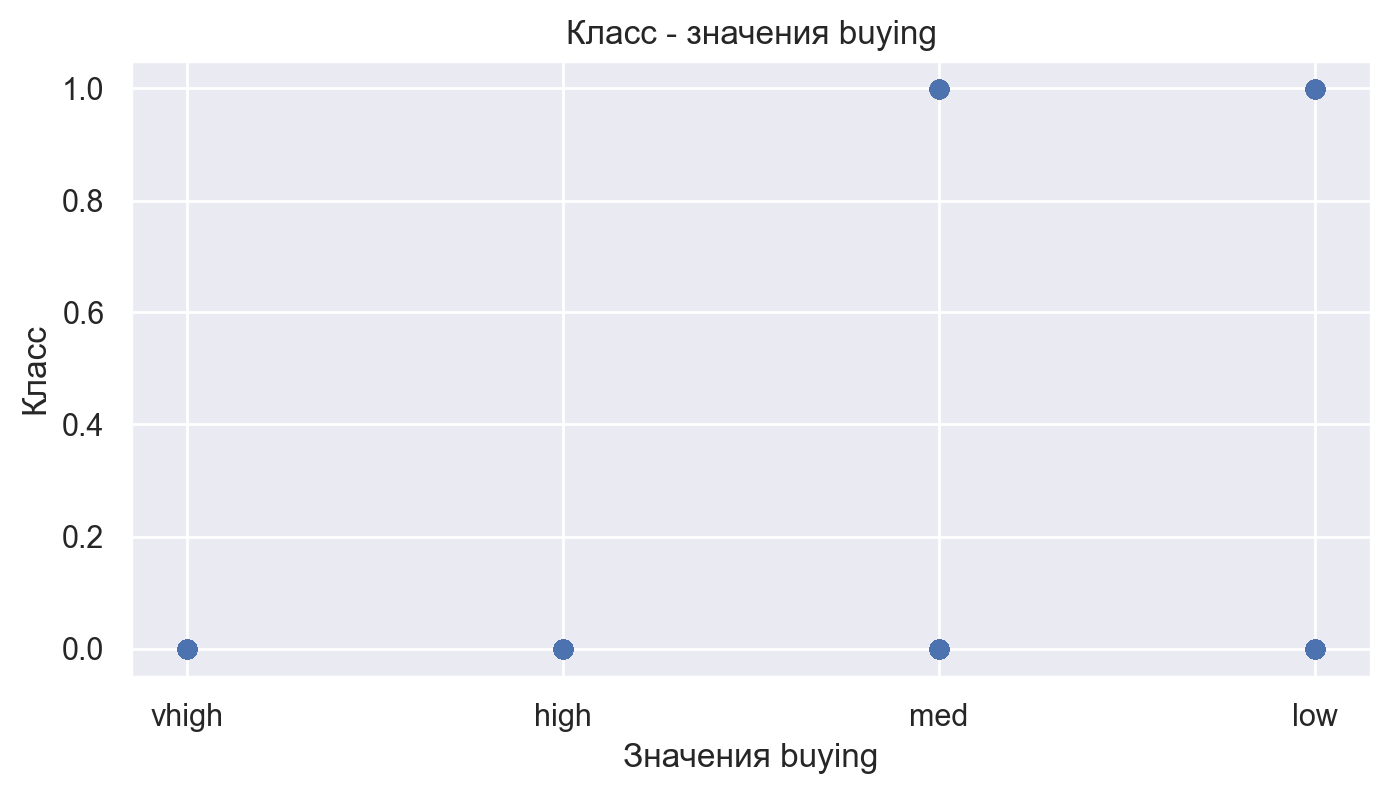

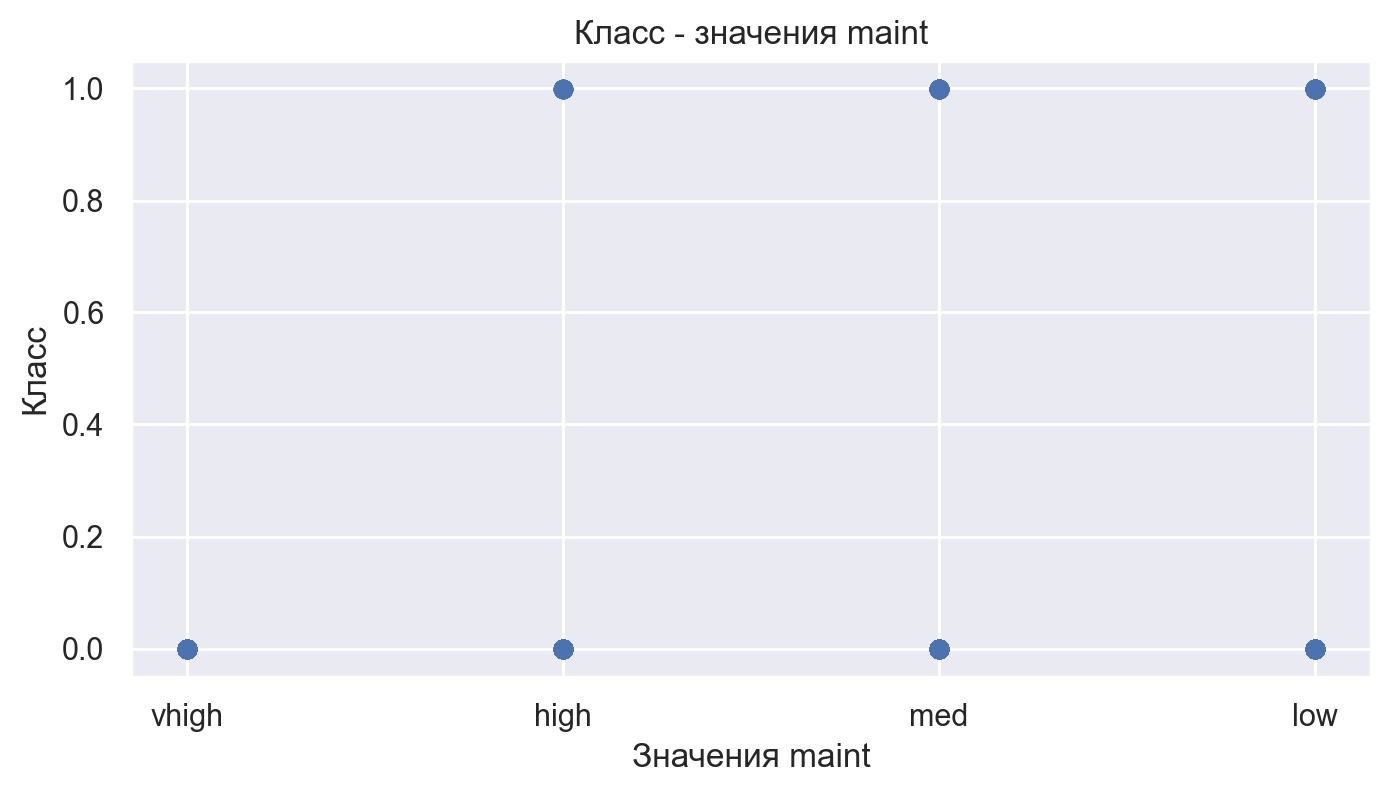

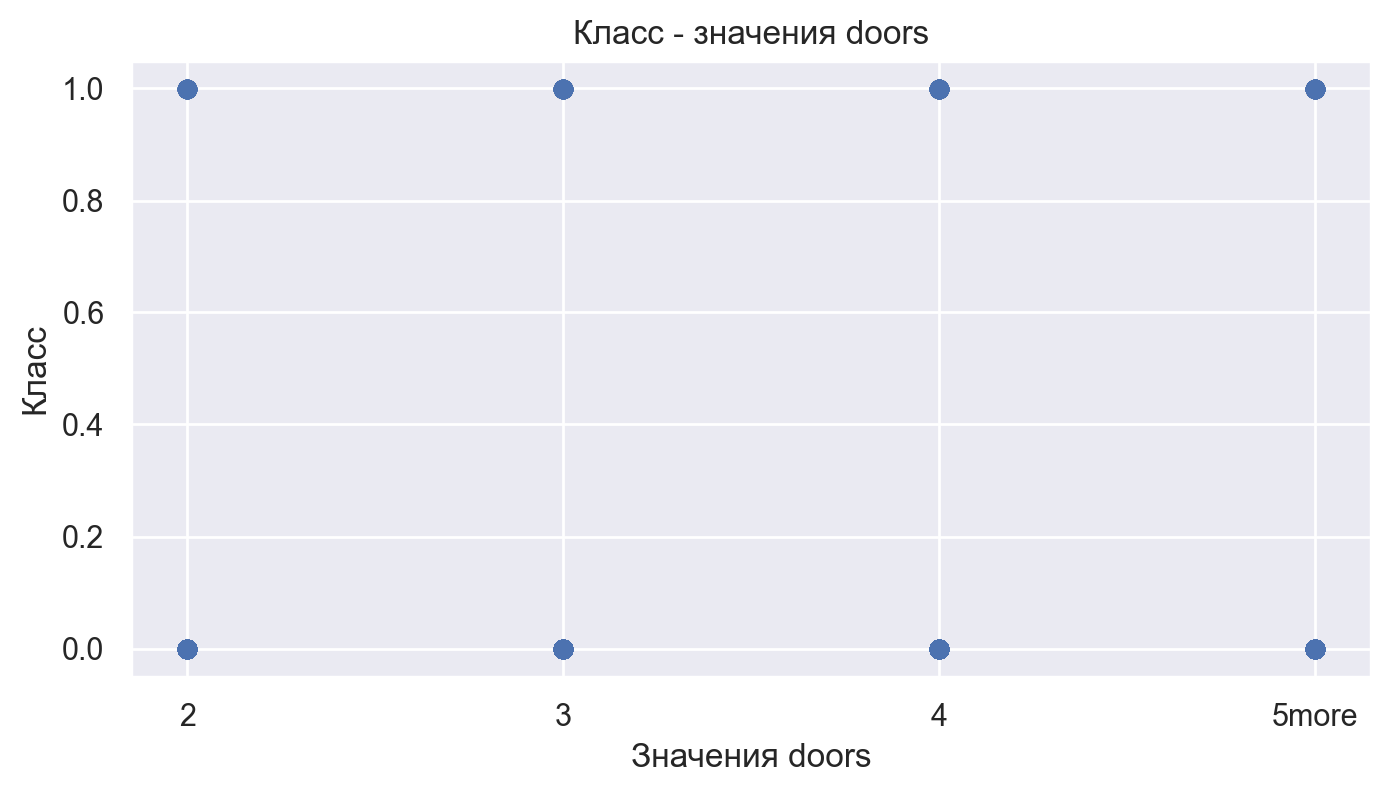

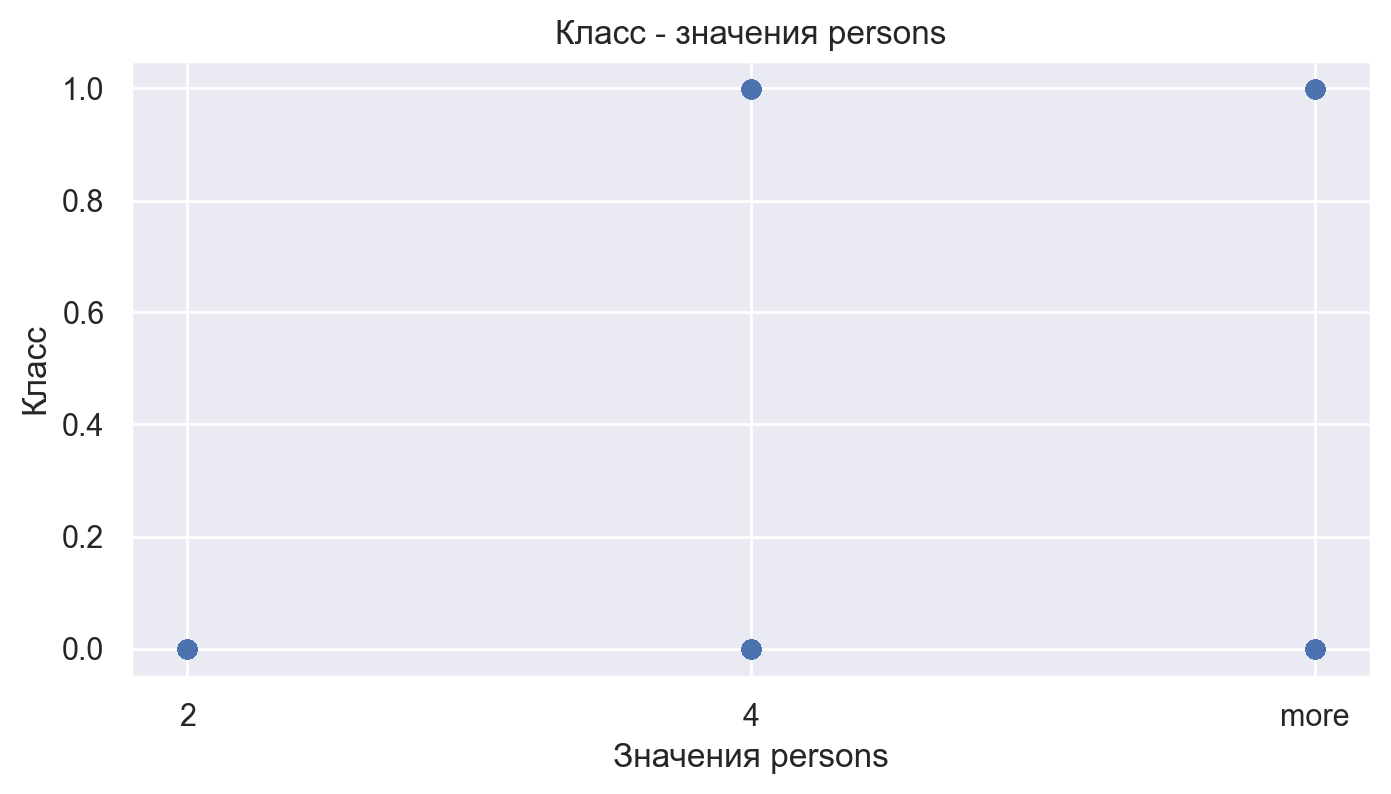

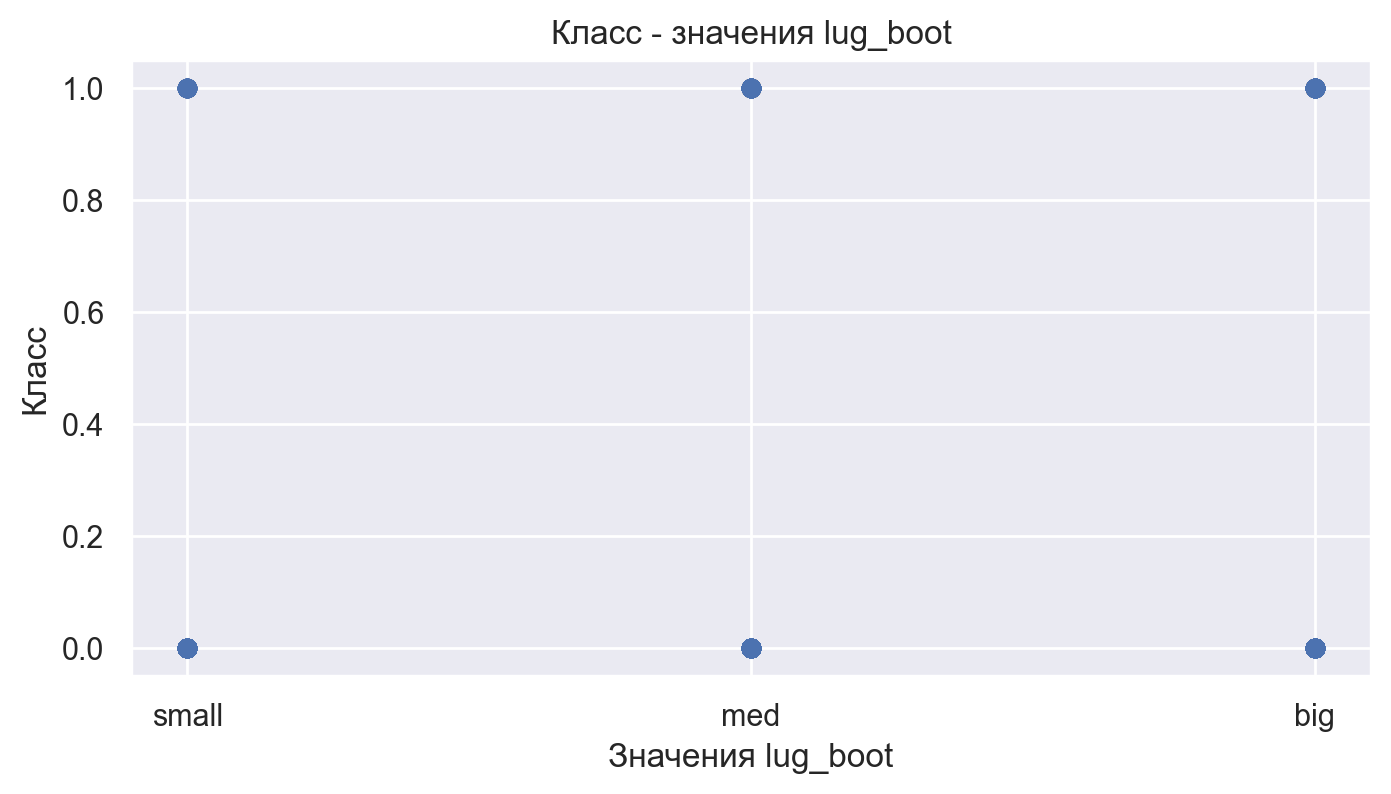

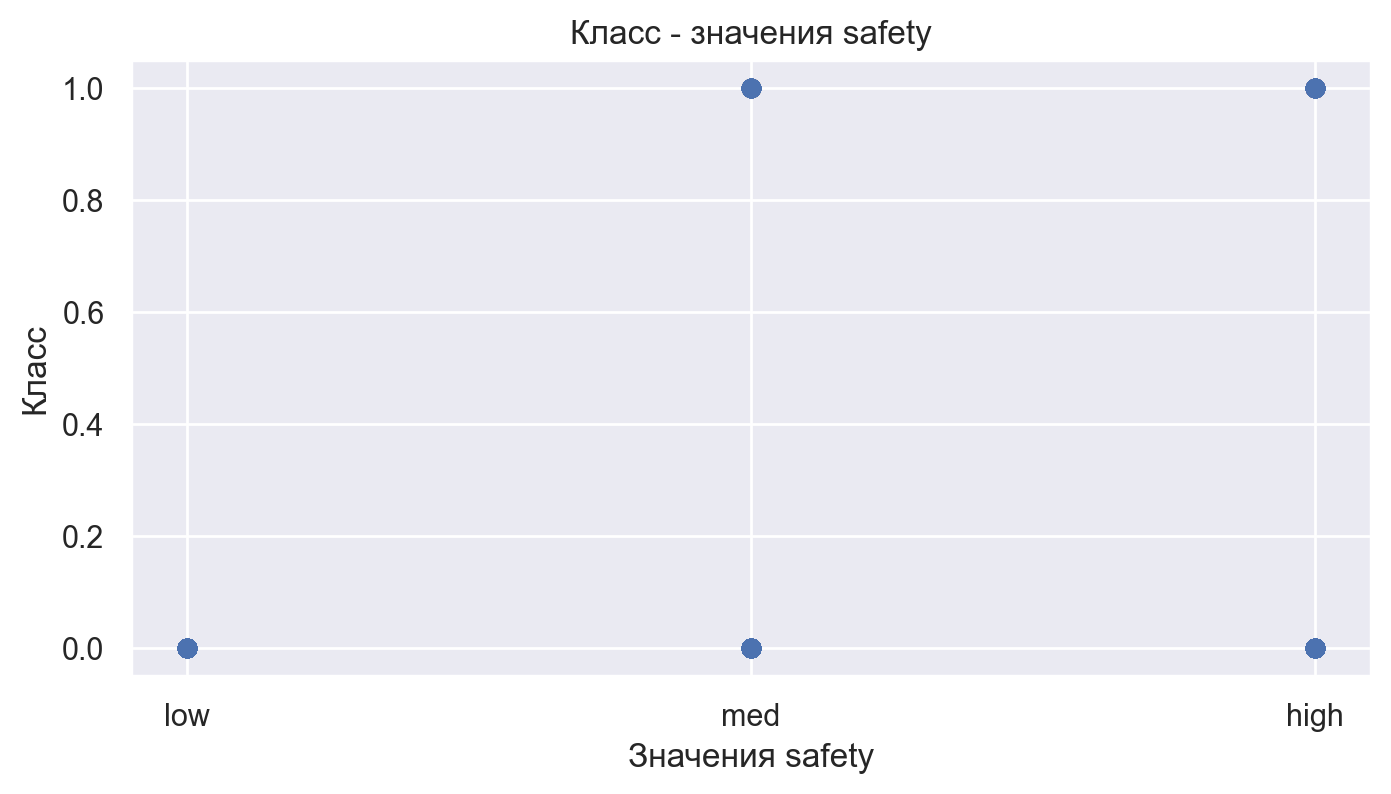

In [109]:
columns = list(df_cars.columns)
columns.remove('class')
for column in columns:
    fig = plt.figure(figsize=(8,4))
    plt.scatter(df_cars[column], df_cars['class'])
    
    plt.title(f'Класс - значения {column}')
    plt.xlabel(f'Значения {column}')
    plt.ylabel('Класс')
    plt.show()

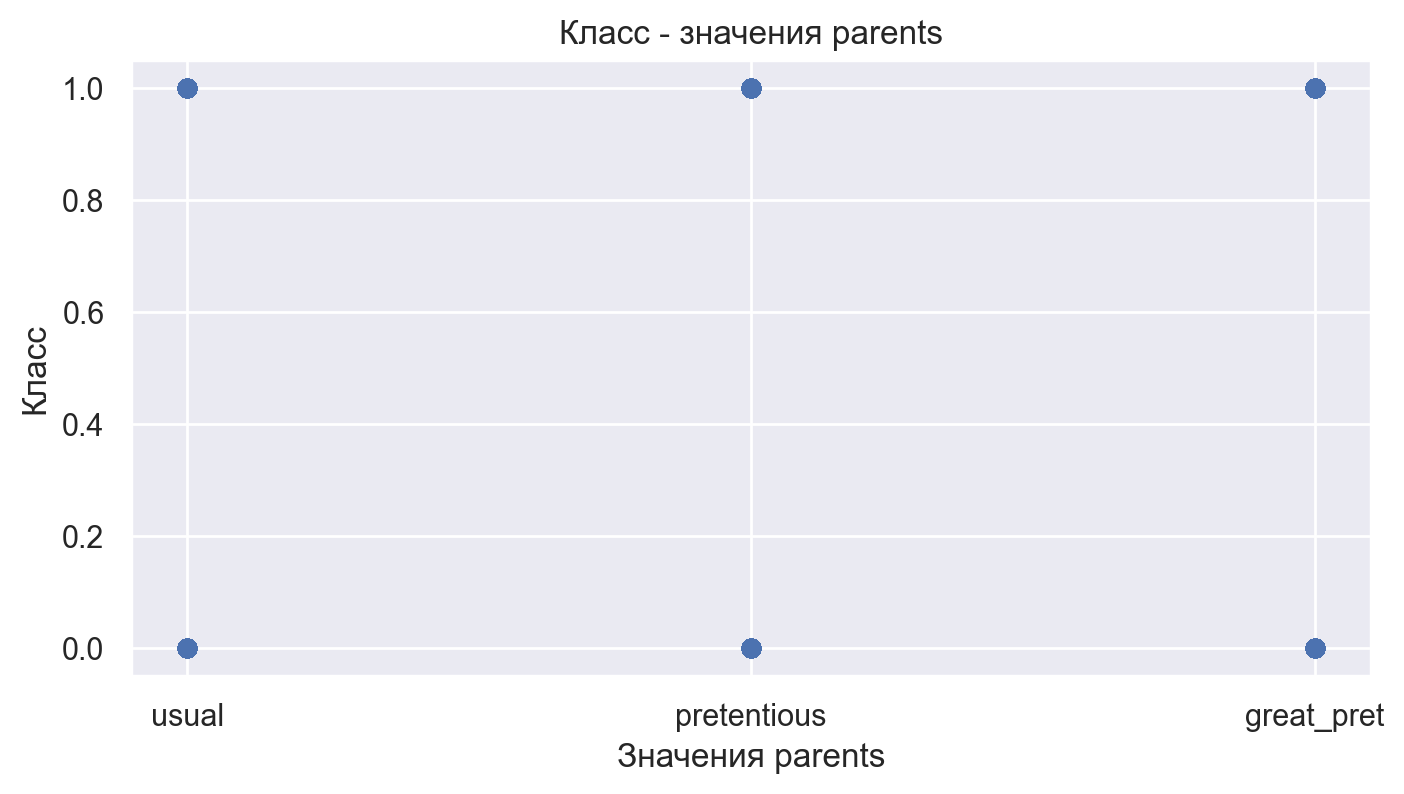

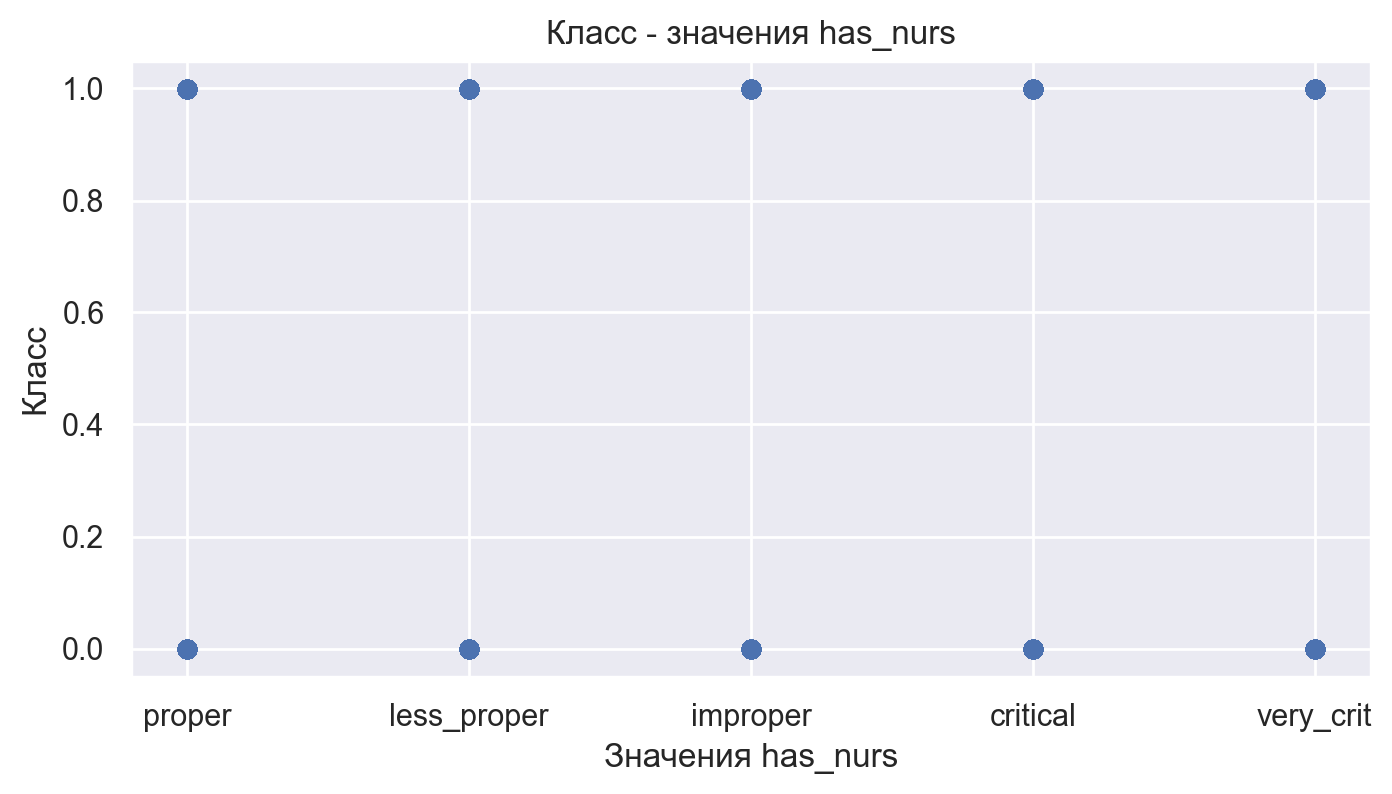

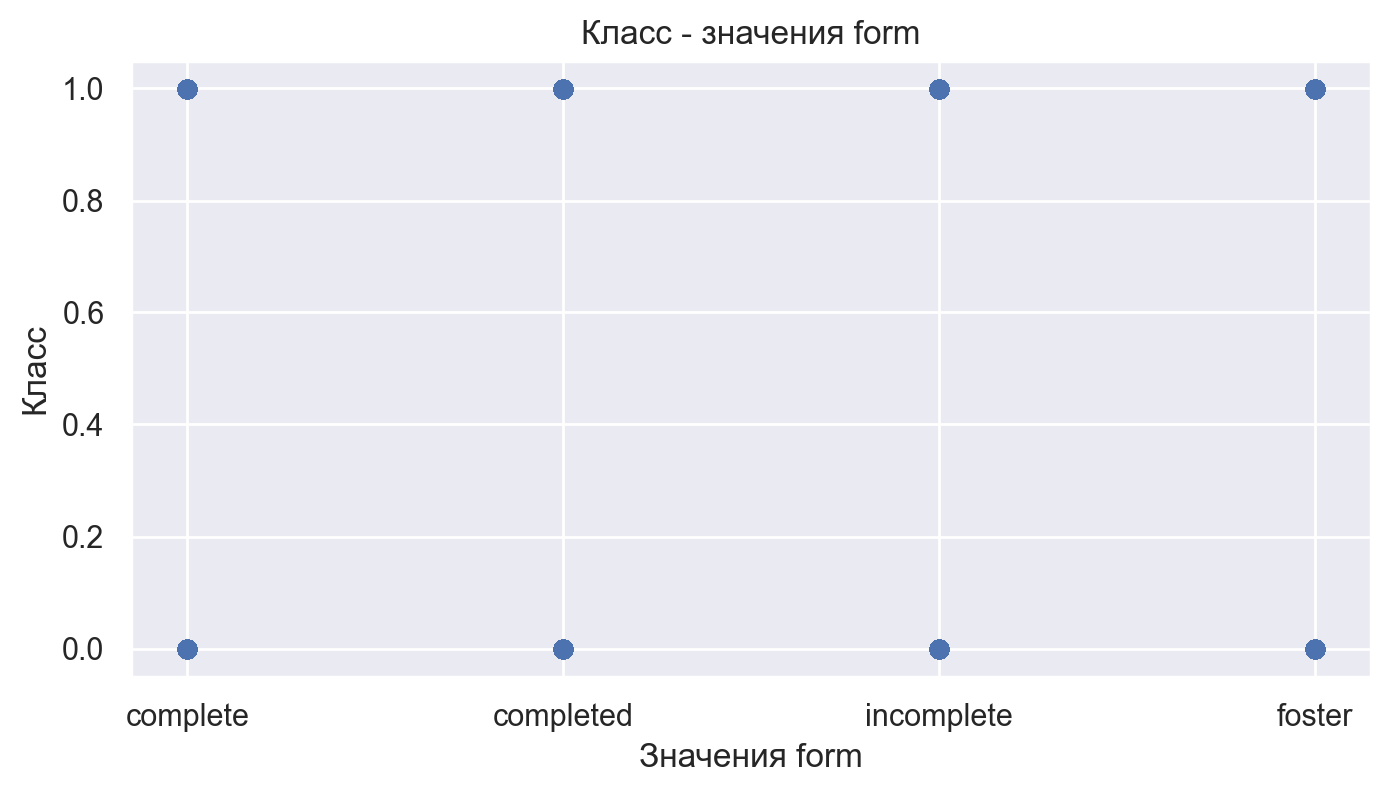

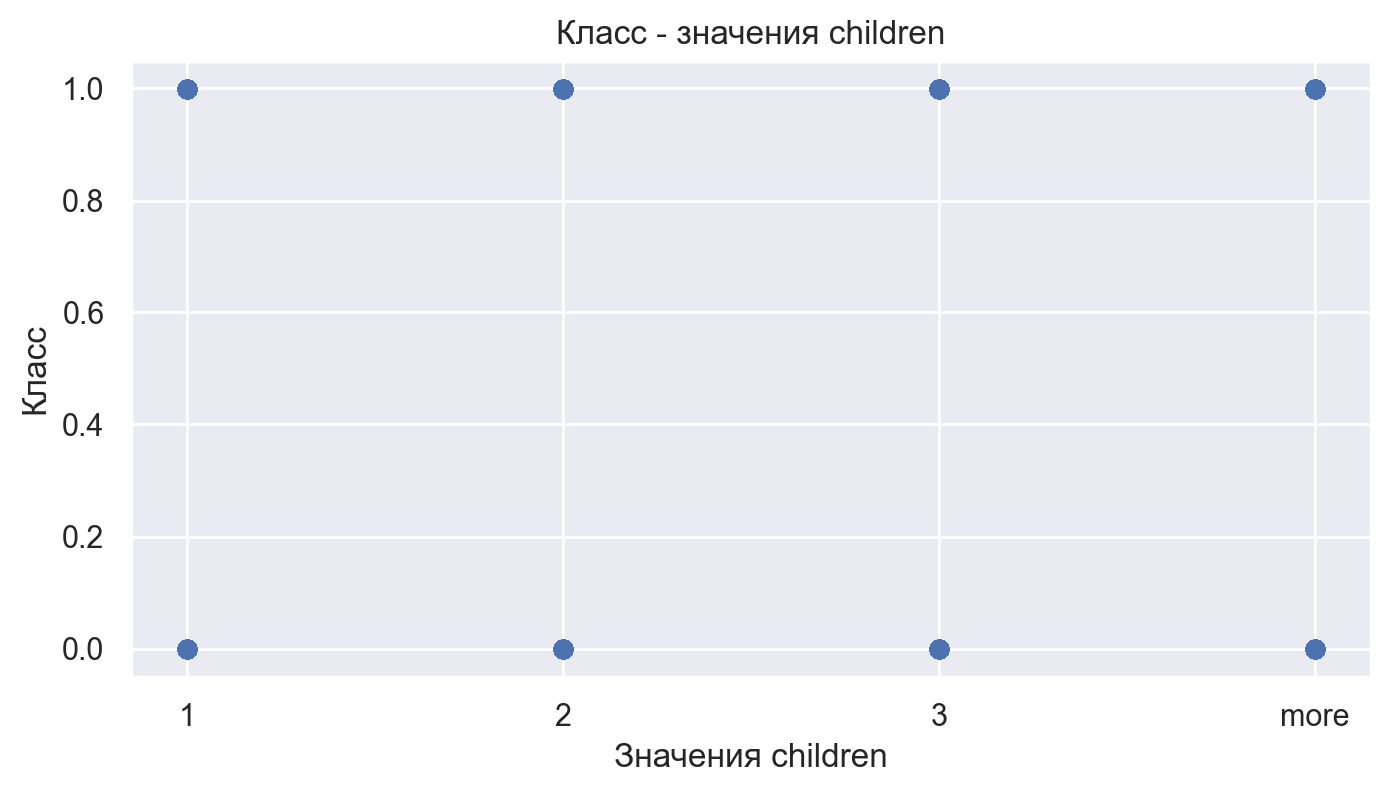

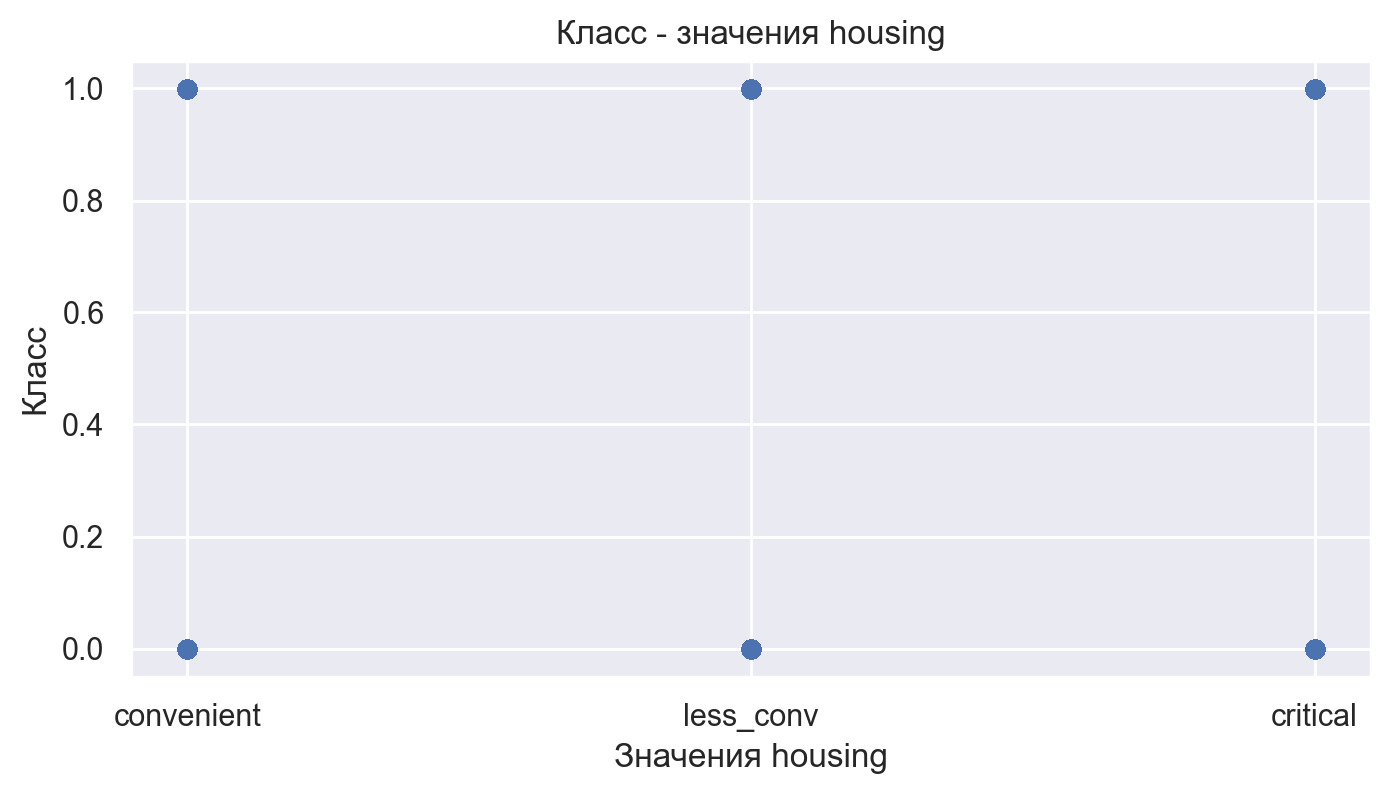

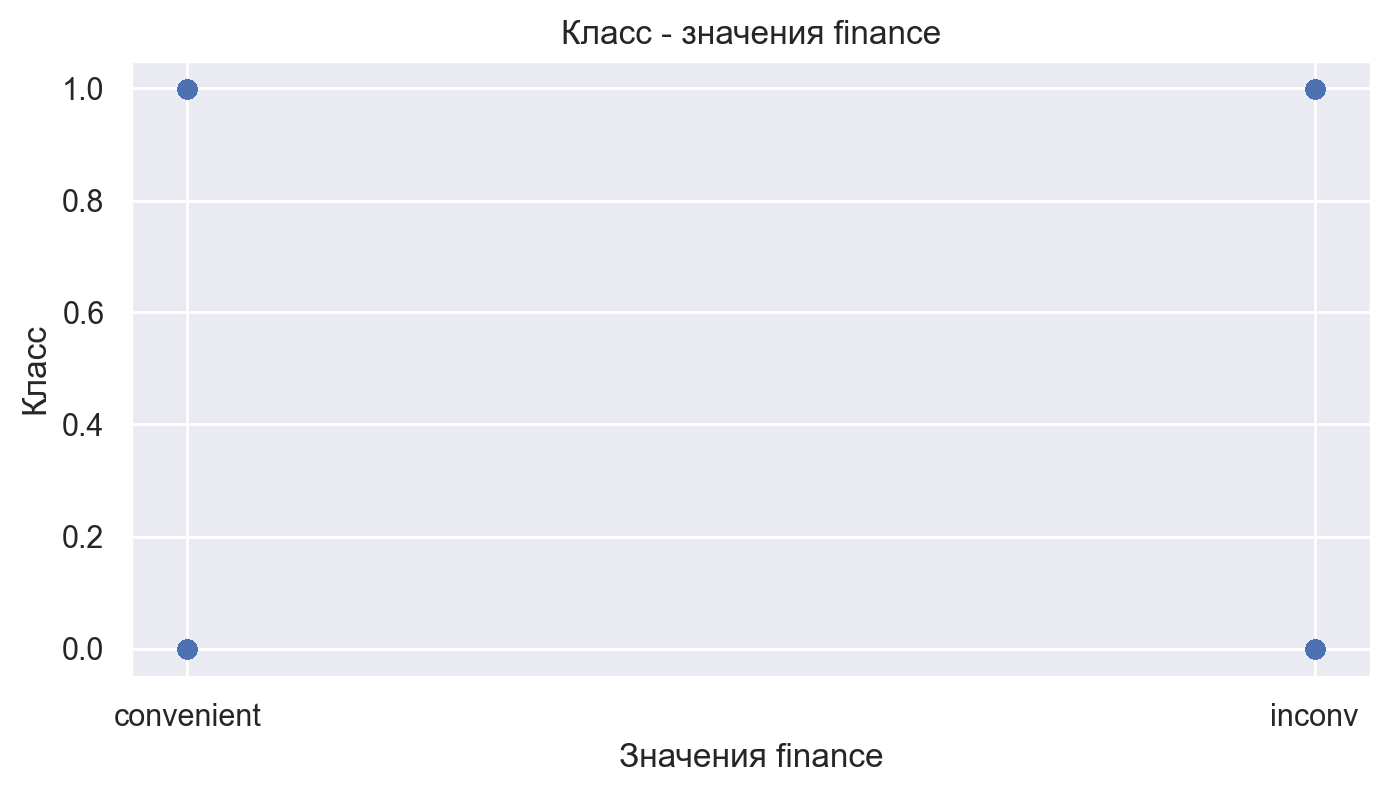

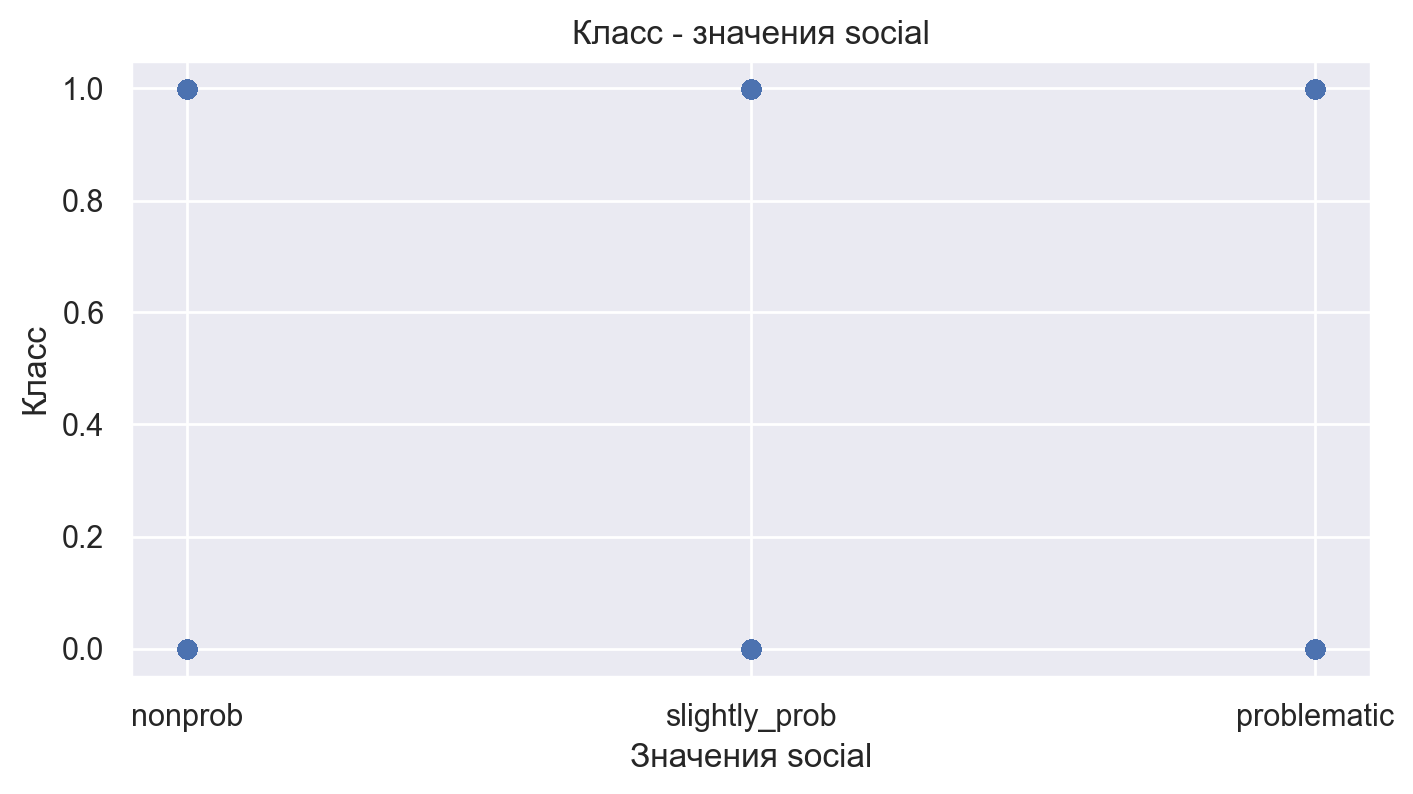

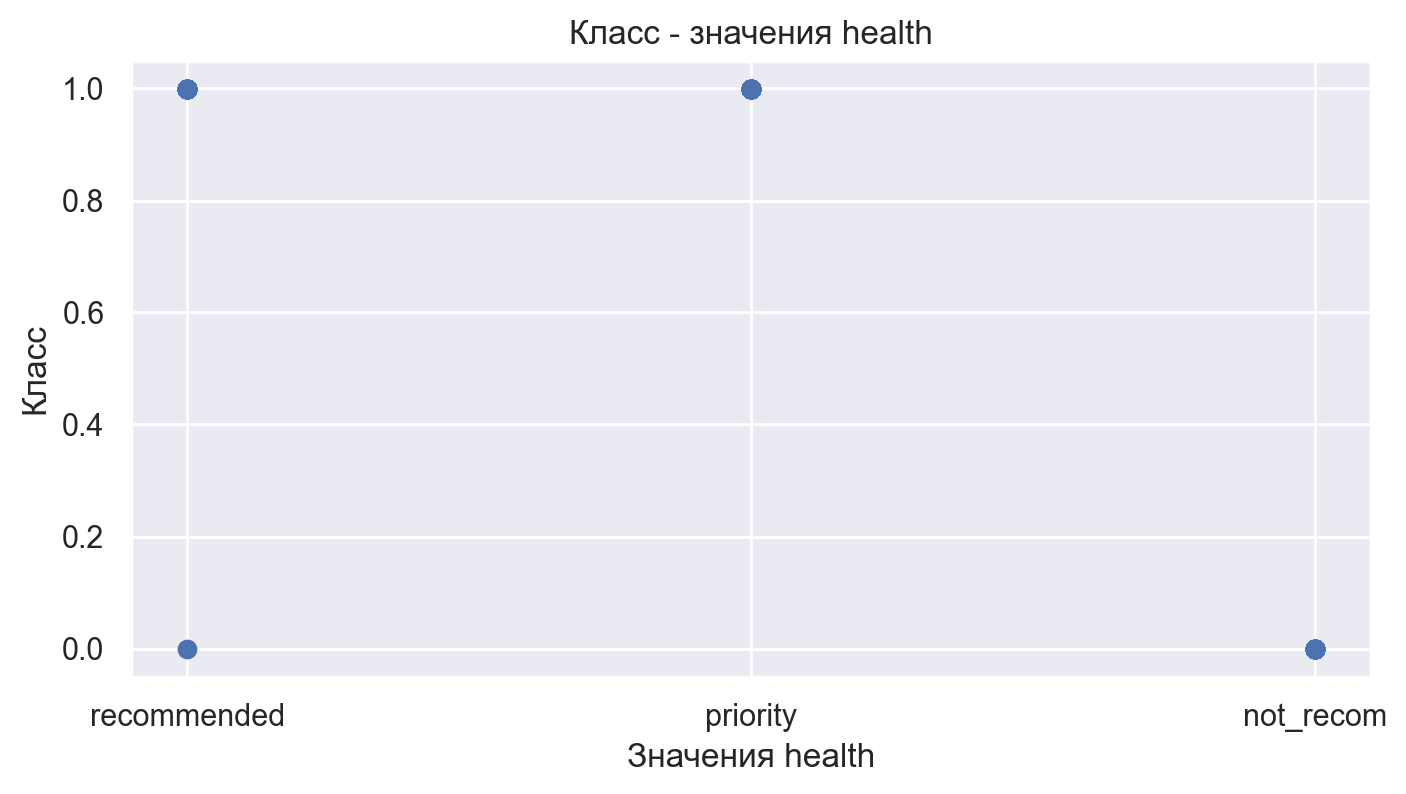

In [110]:
columns = list(df_nursery.columns)
columns.remove('class')
for column in columns:
    fig = plt.figure(figsize=(8,4))
    plt.scatter(df_nursery[column], df_nursery['class'])
    
    plt.title(f'Класс - значения {column}')
    plt.xlabel(f'Значения {column}')
    plt.ylabel('Класс')
    plt.show()

In [111]:
for name, df in dataframes.items():
    print(name.upper() + ' DATAFRAME')
    for column in df:
        print(column, df[column].unique())
    print('\n')

MUSHROOMS DATAFRAME
class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


TIC_TAC_TOE DATAFRAME
top-left-square ['x' 'o' 'b']
top-middle-square ['x' 'o' 'b']
top-right-square ['x' 'o' 'b']
middle-left-square ['x' 'o' 'b']
middle-m

In [112]:
np.any(df_mushrooms.isna().sum() > 0)

False

In [113]:
np.any(df_tic_tac_toe.isna().sum() > 0)

False

In [114]:
np.any(df_cars.isna().sum() > 0)

False

In [115]:
np.any(df_nursery.isna().sum() > 0)

False

**Ответ:** для разных наборов данных, результаты ранжируются по-разному. Для `mushrooms` самый высокий показатель, для `tic-tac-toe` самый низкий. Если мы явно указываем, что фичи категориальные, то метрика выше, чем если фичи вещественные  
В датасете `mushrooms` есть один признак с пропущенными значениями, а в других датасетах нет, но при этом качество на `mushrooms` самое высокое. Значит качество на некоторых датасетах ниже не из-за наличия пропусков.  
Чуть выше я построил графики значение признака - класс для каждого датасета. По ним я увидел интересную вещь - во всех датасетах, кроме `tic-tac-toe` есть признаки, по которым можно однозначно сказать, к какому классу относится объект. То есть дерево может подобрать такие признаки, по которым оно хорошо сможет поделить выборку. В `tic-tac-toe` такого нет и при этом качество на нем самое низкое.  
Также если посмотреть на признаки, которые у нас есть в датасетах, то во всех кроме `tic-tac-toe` признаки описывают какие-то характеристики объекта - цвет, форма, количество чего-то и т.д. То есть по ним с большей уверенностью можно определить, к какому классу относится объект. А вот в `tic-tac-toe` структура признаков совсем другая - это просто возможные размещения крестиков и ноликов, а еще значения категорий одинаковые для всех признаков - крестик, нолик, пустота. Игра может быть как выиграна, так и проиграна для одной и той же ячейки. То есть тут присутствует элемент случайности. Тут есть зависимость от предыдущих ходов игрока и его противника. Поэтому возможно стоит учитывать как-то все предыдущие ходы. Для этого надо бы добавить номер хода, на котором был поставлен символ.   
Подводя итог, качество на `tic-tac-toe` может быть ниже из-за отсутсвия признаков, по которым можно однозначно разделить выборку, а также потому что другая структура данных, в которой присутствует случайность

$\color{red}{\text{Комментарий от проверяющего:}}$

**Балл:** 1.0

Вставьте что угодно, описывающее ваши впечатления от этого задания:

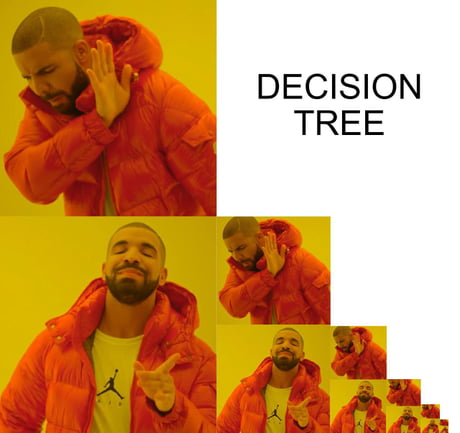